In [1]:
## circstats
def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(array([])):
			return -1
	return len(x)

def phase2(x):
	if not np.isnan(x):
		return phase(x)
	return nan
    
def circdist(angles1,angles2):
    ''' calculates circular distance of angles [rad]'''
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
        if len2(angles1) < 0:
            angles1 = [angles1]*len(angles2)
    return array(list(map(lambda a1,a2: phase2(np.exp(1j*a1)/np.exp(1j*a2)), angles1,angles2)))

### read in files

In [2]:
def read_baseline(filename, mono, sess, mode):
    ''' 
    reads in accuracies/std for 1000x mixed labels per timepoint for r² and MSE evaluation
    INPUT:
        filename:       name of file containing 1000x croxxvalidation on mixed labels
    OUTPUT:
        r2_baseline:    previous accuracy, std and current accuracy, std for the mixed labels R² evaluation
        mse_baseline:   previous accuracy, std and current accuracy, std for the mse evaluation turned into MSE accuracy[%]
    
    '''

    if mode == 'r2':
        file = io.open(filename, "r")
        contents = file.readlines()
        values = [eval(contents[i]) for i in range(len(contents))]
        
        r2_baseline = {'acc_prev':values[0], 'std_prev':values[1], 'acc_curr':values[2], 'std_curr':values[3]}
        return r2_baseline
        
    elif mode =='MSE':
        hf = h5py.File(filename, 'r')
    
        prev = hf.get(mono+str(sess)+'_acc'+'_prev'+'_delay')
        std_prev = hf.get(mono+str(sess)+'_std'+'_prev'+'_delay')
        curr = hf.get(mono+str(sess)+'_acc'+'_curr'+'_delay')
        std_curr = hf.get(mono+str(sess)+'_std'+'_curr'+'_delay')
        
        prev_r = hf.get(mono+str(sess)+'_acc'+'_prev'+'_response')
        std_prev_r = hf.get(mono+str(sess)+'_std'+'_prev'+'_response')
        curr_r = hf.get(mono+str(sess)+'_acc'+'_curr'+'_response')
        std_curr_r = hf.get(mono+str(sess)+'_std'+'_curr'+'_response')
        
        mse_baseline={'acc_prev': np.array(prev), 'std_prev':np.array(std_prev),\
                             'acc_curr':np.array(curr), 'std_curr':np.array(std_curr),\
                             'acc_prev_r': np.array(prev_r), 'std_prev_r':np.array(std_prev_r),\
                             'acc_curr_r':np.array(curr_r), 'std_curr_r':np.array(std_curr_r)}
        
        return mse_baseline
    
    elif mode =='MSE hemispheres':
        hf = h5py.File(filename, 'r')
        #print(hf.keys())
        code = 'Delay' 
        prev = hf.get(mono+str(sess)+'acc_prev_ipsi'+code)
        std_prev = hf.get(mono+str(sess)+'std_prev_ipsi'+code)
        curr = hf.get(mono+str(sess)+'acc_curr_ipsi'+code)
        std_curr = hf.get(mono+str(sess)+'std_curr_ipsi'+code)
        
        prev_dist = hf.get(mono+str(sess)+'acc_prev_ipsi'+code+'_dist')
        std_prev_dist = hf.get(mono+str(sess)+'std_prev_ipsi'+code+'_dist')
        curr_dist = hf.get(mono+str(sess)+'acc_curr_ipsi'+code+'_dist')
        std_curr_dist = hf.get(mono+str(sess)+'std_curr_ipsi'+code+'_dist')
        
        code = 'Response'
        prev_r = hf.get(mono+str(sess)+'acc_prev_ipsi'+code)
        std_prev_r = hf.get(mono+str(sess)+'std_prev_ipsi'+code)
        curr_r = hf.get(mono+str(sess)+'acc_curr_ipsi'+code)
        std_curr_r = hf.get(mono+str(sess)+'std_curr_ipsi'+code)
        
        prev_r_dist = hf.get(mono+str(sess)+'acc_prev_ipsi'+code+'_dist')
        std_prev_r_dist = hf.get(mono+str(sess)+'std_prev_ipsi'+code+'_dist')
        curr_r_dist = hf.get(mono+str(sess)+'acc_curr_ipsi'+code+'_dist')
        std_curr_r_dist = hf.get(mono+str(sess)+'std_curr_ipsi'+code+'_dist')
        
        code = 'Delay'
        prev_c = hf.get(mono+str(sess)+'acc_prev_contra'+code)
        std_prev_c = hf.get(mono+str(sess)+'std_prev_contra'+code)
        curr_c = hf.get(mono+str(sess)+'acc_curr_contra'+code)
        std_curr_c = hf.get(mono+str(sess)+'std_curr_contra'+code)
        
        prev_c_dist = hf.get(mono+str(sess)+'acc_prev_contra'+code+'_dist')
        std_prev_c_dist = hf.get(mono+str(sess)+'std_prev_contra'+code+'_dist')
        curr_c_dist = hf.get(mono+str(sess)+'acc_curr_contra'+code+'_dist')
        std_curr_c_dist = hf.get(mono+str(sess)+'std_curr_contra'+code+'_dist')
        
        code = 'Response'
        prev_cr = hf.get(mono+str(sess)+'acc_prev_contra'+code)
        std_prev_cr = hf.get(mono+str(sess)+'std_prev_contra'+code)
        curr_cr = hf.get(mono+str(sess)+'acc_curr_contra'+code)
        std_curr_cr = hf.get(mono+str(sess)+'std_curr_contra'+code)
        
        prev_cr_dist = hf.get(mono+str(sess)+'acc_prev_contra'+code+'_dist')
        std_prev_cr_dist = hf.get(mono+str(sess)+'std_prev_contra'+code+'_dist')
        curr_cr_dist = hf.get(mono+str(sess)+'acc_curr_contra'+code+'_dist')
        std_curr_cr_dist = hf.get(mono+str(sess)+'std_curr_contra'+code+'_dist')
        
        hemisphere_baseline={'acc_prev': np.array(prev), 'std_prev':np.array(std_prev),\
                             'acc_curr':np.array(curr), 'std_curr':np.array(std_curr),\
                             'acc_prev_r': np.array(prev_r), 'std_prev_r':np.array(std_prev_r),\
                             'acc_curr_r':np.array(curr_r), 'std_curr_r':np.array(std_curr_r),\
                             'acc_prev_c': np.array(prev_c), 'std_prev_c':np.array(std_prev_c),\
                             'acc_curr_c':np.array(curr_c), 'std_curr_c':np.array(std_curr_c),\
                             'acc_prev_cr': np.array(prev_cr), 'std_prev_cr':np.array(std_prev_cr),\
                             'acc_curr_cr':np.array(curr_cr), 'std_curr_cr':np.array(std_curr_cr)}
        
        hemisphere_baseline_dist={'acc_prev': np.array(prev_dist), 'std_prev':np.array(std_prev_dist),\
                             'acc_curr':np.array(curr_dist), 'std_curr':np.array(std_curr_dist),\
                             'acc_prev_r': np.array(prev_r_dist), 'std_prev_r':np.array(std_prev_r_dist),\
                             'acc_curr_r':np.array(curr_r_dist), 'std_curr_r':np.array(std_curr_r_dist),\
                             'acc_prev_c': np.array(prev_c_dist), 'std_prev_c':np.array(std_prev_c_dist),\
                             'acc_curr_c':np.array(curr_c_dist), 'std_curr_c':np.array(std_curr_c_dist),\
                             'acc_prev_cr': np.array(prev_cr_dist), 'std_prev_cr':np.array(std_prev_cr_dist),\
                             'acc_curr_cr':np.array(curr_cr_dist), 'std_curr_cr':np.array(std_curr_cr_dist)}
        #print(hf.keys())
        
        return hemisphere_baseline, hemisphere_baseline_dist
    
    else:
        return print('ERROR: mode must either be r2, MSE or MSE hemispheres.')


In [3]:
def read_reactivations_AllMonkeys(filename, df, mode):
    ''' 
    reads in prediction error of target, prediction from leave-1-out crossval from delay-decoder
    during the reactivation period (5 sessions)
    INPUT:
        filename:       name of file containing decoding accuracies .h5 file
                        (bins=50ms)  
        df:             dataframe containing minimum monkey, session information
    OUTPUT:
        acc:            prediction error [monkey,session x trials x reactivation time]
    
    '''
    hf = h5py.File(filename, 'r')
    
    if mode=='single':
        acc = {'Sa':[], 'Pe':[], 'Wa':[]}
        acc_dist = {'Sa':[], 'Pe':[], 'Wa':[]}
        borders = {'Sa':[], 'Pe':[], 'Wa':[]}
        print(hf.keys())
        for mono in ['Sa', 'Pe', 'Wa']:
            for sess in range(max(df.loc[df.monkey==mono].session)+1):
                n1 = hf.get(mono+str(sess))
                print(n1)
                acc[mono].append(np.array(n1))
                
                n1_dist = hf.get(mono+str(sess)+'_dist')
                print(n1_dist)
                acc_dist[mono].append(np.array(n1_dist))

                # get borders of time period endings
                n2 = hf.get(mono+str(sess)+'_borders')
                print(n2)
                borders[mono].append(np.array(n2))
                
    
    elif mode=='hemispheres':
        acc = {'Sa_leftIpsi':[], 'Pe_leftIpsi':[], 'Wa_leftIpsi':[],\
               'Sa_leftContra':[], 'Pe_leftContra':[], 'Wa_leftContra':[],\
              'Sa_rightIpsi':[], 'Pe_rightIpsi':[], 'Wa_rightIpsi':[],\
               'Sa_rightContra':[], 'Pe_rightContra':[], 'Wa_rightContra':[]}
        borders = {'Sa':[], 'Pe':[], 'Wa':[]}
        
        
        for mono in ['Sa', 'Pe', 'Wa']:
            for sess in range(max(df.loc[df.monkey==mono].session)+1):
                for hemi in ['_leftIpsi', '_leftContra', '_rightIpsi', '_rightContra']:
                    n1 = hf.get(mono+str(sess)+hemi)
                    print(n1)
                    acc[mono+hemi].append(np.array(n1))

                    # get borders of time period endings
                    n2 = hf.get(mono+str(sess)+'_borders')
                #print(n1)
                borders[mono].append(np.array(n2))
    
    else:
        print('mode needs to be either: single or hemispheres.')
    hf.close()

    return acc, acc_dist, borders

### firing rates

In [4]:
def plot_meanFiring_IpsiContra(mean_firing_ipsPrev, std_firing_ipsPrev, mean_firing_contrPrev, std_firing_contrPrev, borders_full):
    
    
    c_base = 'grey'
    
    x = np.linspace(0,borders_full[4]*bins, borders_full[4])
    x2 = np.linspace(-(borders_full[5]-borders_full[4])*bins,(borders_full[8]-borders_full[5])*bins, borders_full[8]-borders_full[4])
    x3 = np.linspace(-(borders_full[9]-borders_full[8])*bins,0, borders_full[9]-borders_full[8])

    labels = np.array(['0', '$S_{n-1}$', '$SE_{n-1}$', '$D_{n-1}$', '$D_{n-1}$','$S_{n-1}$','$R_{n-1}$', '$E_{n-1}$'])
    labels_curr = np.array(['$0_n$', '$S_n$', '$SE_n$'])

    y_low=-1.1
    y_high = 0.8
    f, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True, figsize=(18,8))
    plt.subplots_adjust(wspace=0.05)
    ax1.plot(x,mean_firing_ipsPrev[:borders_full[4]], color='darkgreen')
    ax1.plot(x,mean_firing_contrPrev[:borders_full[4]], color='darkorange')
    ax1.axhline(y=0, color='grey')
    # errorbar
    ax1.fill_between(x, mean_firing_ipsPrev[:borders_full[4]]-0.5*np.array(std_firing_ipsPrev[:borders_full[4]]), mean_firing_ipsPrev[:borders_full[4]]+0.5*np.array(std_firing_ipsPrev[:borders_full[4]]), color='darkgreen', alpha=0.2)
    ax1.fill_between(x, mean_firing_contrPrev[:borders_full[4]]-0.5*np.array(std_firing_contrPrev[:borders_full[4]]), mean_firing_contrPrev[:borders_full[4]]+0.5*np.array(std_firing_contrPrev[:borders_full[4]]), color='darkorange', alpha=0.2)
    ax1.set_xlabel('$start_{n-1}$ aligned [ms]', fontsize=14)
    ax1.set_ylabel('mean spike rate (z-score)', fontsize=14)#avg $r^2$ score
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    ax2.plot(x2,mean_firing_ipsPrev[borders_full[4]:borders_full[8]], color='darkgreen')
    ax2.plot(x2,mean_firing_contrPrev[borders_full[4]:borders_full[8]], color='darkorange')
    ax2.axhline(y=0, color='grey')
    # errorbar
    ax2.fill_between(x2, mean_firing_ipsPrev[borders_full[4]:borders_full[8]]-0.5*np.array(std_firing_ipsPrev[borders_full[4]:borders_full[8]]), mean_firing_ipsPrev[borders_full[4]:borders_full[8]]+0.5*np.array(std_firing_ipsPrev[borders_full[4]:borders_full[8]]), color='darkgreen', alpha=0.2)
    ax2.fill_between(x2, mean_firing_contrPrev[borders_full[4]:borders_full[8]]-0.5*np.array(std_firing_contrPrev[borders_full[4]:borders_full[8]]), mean_firing_contrPrev[borders_full[4]:borders_full[8]]+0.5*np.array(std_firing_contrPrev[borders_full[4]:borders_full[8]]), color='darkorange', alpha=0.2)
    ax2.set_xlabel('$report_{n-1}$ aligned [ms]', fontsize=14)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    
    ax3.plot(x3,mean_firing_ipsPrev[borders_full[8]:], color='darkgreen', label='ipsi')
    ax3.plot(x3,mean_firing_contrPrev[borders_full[8]:], color='darkorange', label='contra')
    ax3.axhline(y=0, color='grey')
    ax3.fill_between(x3, mean_firing_ipsPrev[borders_full[8]:]-0.5*np.array(std_firing_ipsPrev[borders_full[8]:]), mean_firing_ipsPrev[borders_full[8]:]+0.5*np.array(std_firing_ipsPrev[borders_full[8]:]), color='darkgreen', alpha=0.2)
    ax3.fill_between(x3, mean_firing_contrPrev[borders_full[8]:]-0.5*np.array(std_firing_contrPrev[borders_full[8]:]), mean_firing_contrPrev[borders_full[8]:]+0.5*np.array(std_firing_contrPrev[borders_full[8]:]), color='darkorange', alpha=0.2)
    ax3.set_xlabel('$end_{n-1}$ aligned [ms]', fontsize=14)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')

    y0=ax2.get_ylim()[0]
    y1=ax2.get_ylim()[1]
    ax1.fill_between([borders_full[3]*bins, borders_full[4]*bins], y0, y1, color='red', alpha=0.2)
    ax2.fill_between([0, (borders_full[7]-borders_full[8])*bins], y0,y1, color='grey', alpha=0.2)

    plt.legend(fontsize=16)
    #plt.savefig('../Figures/Neural/SerialBias/DelayResponseDecoder/DelayResponseDecoder_reward_sincos_MSE_Sa2.png', dpi=100)

    plt.show()
    
    return

### decoders

In [43]:
# y is fixed only X changes based on time in trial
def decoder_complex_delayVSresponse(dataframe,borders_full):

    y = np.array([complex(dataframe['target_prev_xy'][i][0],dataframe['target_prev_xy'][i][1]) for i in dataframe.index])
 
    ### create dataframes for conditions, scale to [0,1] for each neuron
    X_delay = pd.DataFrame([np.mean(dataframe['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(dataframe['bin_sp_prev']))])
    # scale neural responses for each neuron into [0,1]
    #scaler = preprocessing.MinMaxScaler()
    #d = scaler.fit_transform(X_delay)
    #X_delay = pd.DataFrame(d, columns=X_delay.columns)
    # mean adjust
    #X_delay = pd.DataFrame(np.array([X_delay.loc[:,n]/np.mean(X_delay.loc[:,n]) for n in X_delay.columns]).T)
    
    X_response = pd.DataFrame([np.mean(dataframe['bin_sp_prev'][n][borders_full[7]:borders_full[8]], axis=0) for n in range(len(dataframe['bin_sp_prev']))])
    # scale neural responses for each neuron into [0,1]
    #d = scaler.fit_transform(X_response)
    #X_response = pd.DataFrame(d, columns=X_response.columns)
    # mean adjust
    #X_response = pd.DataFrame(np.array([X_response.loc[:,n]/np.mean(X_response.loc[:,n]) for n in X_response.columns]).T)
    
    X_prev_shuffle = dataframe['bin_sp_prev']
    X_curr_shuffle = dataframe['bin_sp_curr']
    
        
    mse_prev_d=[]
    mse_curr_d=[]
    mse_prev_r=[]
    mse_curr_r=[]
    mse_prev_d_dist=[]
    mse_curr_d_dist=[]
    mse_prev_r_dist=[]
    mse_curr_r_dist=[]
    
    weights_delay_full=[]
    weights_response_full=[]
    for k in range(0,10):# k=10 as in Barbosa2020
        
        #train test split
        rand_state = randint(0,1000)# to get the same split for previous, current
        X_train_delay ,_ ,y_train, _ = train_test_split(X_delay, y, test_size = 0.20, random_state = rand_state)
        X_train_response ,_ ,y_train, _ = train_test_split(X_response, y, test_size = 0.20, random_state = rand_state)

        weights_delay = np.linalg.pinv(X_train_delay.T.dot(X_train_delay)).dot(X_train_delay.T).dot(y_train)
        weights_response = np.linalg.pinv(X_train_response.T.dot(X_train_response)).dot(X_train_response.T).dot(y_train)
         
        weights_delay_full.append(weights_delay)
        weights_response_full.append(weights_response)

        mse_crosscorr_prev_d=[]
        mse_crosscorr_curr_d=[]
        mse_crosscorr_prev_r=[]
        mse_crosscorr_curr_r=[]
        mse_crosscorr_prev_d_dist=[]
        mse_crosscorr_curr_d_dist=[]
        mse_crosscorr_prev_r_dist=[]
        mse_crosscorr_curr_r_dist=[]
        for delta_t_train in range(max(borders_full)):# for each time bin
            # create training dataset: columns=neurons, rows=trials for previous/current trials
            X_prev = pd.DataFrame([X_prev_shuffle[n][delta_t_train] for n in dataframe.index])
            #d = scaler.fit_transform(X_prev)
            #X_prev = pd.DataFrame(d, columns=X_prev.columns)
            # mean adjust
            #X_prev = pd.DataFrame(np.array([X_prev.loc[:,n]/np.mean(X_prev.loc[:,n]) for n in X_prev.columns]).T)


            X_curr = pd.DataFrame([X_curr_shuffle[n][delta_t_train] for n in dataframe.index])
            #d = scaler.fit_transform(X_curr)
            #X_curr = pd.DataFrame(d, columns=X_curr.columns)
            # mean adjust
            #X_curr = pd.DataFrame(np.array([X_curr.loc[:,n]/np.mean(X_curr.loc[:,n]) for n in X_curr.columns]).T)

            
            #train test split
            _, X_test_prev, _, y_test = train_test_split(X_prev, y, test_size = 0.20, random_state=rand_state)# test in fast loop
            _, X_test_curr, _, y_test = train_test_split(X_curr, y, test_size = 0.20, random_state=rand_state)# test in fast loop


            # make predictions of models
            # angle
            mse_crosscorr_prev_d.append(np.mean((circdist(np.angle(weights_delay.dot(X_test_prev.T)),np.angle(y_test)))**2))
            mse_crosscorr_curr_d.append(np.mean((circdist(np.angle(weights_delay.dot(X_test_curr.T)),np.angle(y_test)))**2))
            mse_crosscorr_prev_r.append(np.mean((circdist(np.angle(weights_response.dot(X_test_prev.T)),np.angle(y_test)))**2))
            mse_crosscorr_curr_r.append(np.mean((circdist(np.angle(weights_response.dot(X_test_curr.T)),np.angle(y_test)))**2))
            
            # distance
            mse_crosscorr_prev_d_dist.append(np.mean((abs(weights_delay.dot(X_test_prev.T)) - abs(y_test))**2))
            mse_crosscorr_curr_d_dist.append(np.mean((abs(weights_delay.dot(X_test_curr.T)) - abs(y_test))**2))
            mse_crosscorr_prev_r_dist.append(np.mean((abs(weights_response.dot(X_test_prev.T)) - abs(y_test))**2))
            mse_crosscorr_curr_r_dist.append(np.mean((abs(weights_response.dot(X_test_curr.T)) - abs(y_test))**2))
            
        
        mse_prev_d.append(mse_crosscorr_prev_d)
        mse_curr_d.append(mse_crosscorr_curr_d)
        mse_prev_r.append(mse_crosscorr_prev_r)
        mse_curr_r.append(mse_crosscorr_curr_r)
        
        mse_prev_d_dist.append(mse_crosscorr_prev_d_dist)
        mse_curr_d_dist.append(mse_crosscorr_curr_d_dist)
        mse_prev_r_dist.append(mse_crosscorr_prev_r_dist)
        mse_curr_r_dist.append(mse_crosscorr_curr_r_dist)
    
    #angle
    mse_acc_prev_d = np.mean(mse_prev_d, axis=0)
    mse_std_prev_d = np.std(mse_prev_d, axis=0)
    mse_acc_curr_d = np.mean(mse_curr_d, axis=0)
    mse_std_curr_d = np.std(mse_curr_d, axis=0)
    
    mse_acc_prev_r = np.mean(mse_prev_r, axis=0)
    mse_std_prev_r = np.std(mse_prev_r, axis=0)
    mse_acc_curr_r = np.mean(mse_curr_r, axis=0)
    mse_std_curr_r = np.std(mse_curr_r, axis=0)
    #dist
    mse_acc_prev_d_dist = np.mean(mse_prev_d_dist, axis=0)
    mse_std_prev_d_dist = np.std(mse_prev_d_dist, axis=0)
    mse_acc_curr_d_dist = np.mean(mse_curr_d_dist, axis=0)
    mse_std_curr_d_dist = np.std(mse_curr_d_dist, axis=0)
    
    mse_acc_prev_r_dist = np.mean(mse_prev_r_dist, axis=0)
    mse_std_prev_r_dist = np.std(mse_prev_r_dist, axis=0)
    mse_acc_curr_r_dist = np.mean(mse_curr_r_dist, axis=0)
    mse_std_curr_r_dist = np.std(mse_curr_r_dist, axis=0)
    return mse_acc_prev_d, mse_std_prev_d, mse_acc_curr_d, mse_std_curr_d,\
        mse_acc_prev_r, mse_std_prev_r, mse_acc_curr_r, mse_std_curr_r,\
mse_acc_prev_d_dist, mse_std_prev_d_dist, mse_acc_curr_d_dist, mse_std_curr_d_dist,\
        mse_acc_prev_r_dist, mse_std_prev_r_dist, mse_acc_curr_r_dist, mse_std_curr_r_dist,\
weights_delay_full, weights_response_full

In [6]:
def complex_decoder_IpsiContra(dataframe, borders_full, neuron_type):
        
    #y = np.array([exp(complex(0,df_serial_left['target_prev'].values[i]-np.pi)) for i in df_serial_left.index]) # response prev in polar coordinates
    #y = np.array([complex(df_serial_left['target_prev_xy'][i][0],df_serial_left['target_prev_xy'][i][1])/abs(complex(df_serial_left['target_prev_xy'][i][0],df_serial_left['target_prev_xy'][i][1])) for i in df_serial_left.index])
    y = np.array([complex(dataframe['target_prev_xy'][i][0],dataframe['target_prev_xy'][i][1]) for i in dataframe.index])
 
    ### create dataframes for conditions, scale to [0,1] for each neuron
    X_delay = pd.DataFrame([np.mean(dataframe['bin_sp_prev'][n][borders_full[2]:borders_full[3]], axis=0) for n in range(len(dataframe['bin_sp_prev']))])
    # scale neural responses for each neuron into [0,1]
    #scaler = preprocessing.MinMaxScaler()
    #d = scaler.fit_transform(X_delay)
    #X_delay = pd.DataFrame(d, columns=X_delay.columns)
    # mean adjust
    #X_delay = pd.DataFrame(np.array([X_delay.loc[:,n]/np.mean(X_delay.loc[:,n]) for n in X_delay.columns]).T)
    #for k in np.unique(y):
    #    RF.append(np.mean(X_delay.loc[]))
    
    X_response = pd.DataFrame([np.mean(dataframe['bin_sp_prev'][n][borders_full[7]:borders_full[8]], axis=0) for n in range(len(dataframe['bin_sp_prev']))])
    # scale neural responses for each neuron into [0,1]
    #d = scaler.fit_transform(X_response)
    #X_response = pd.DataFrame(d, columns=X_response.columns)
    # mean adjust
    #X_response = pd.DataFrame(np.array([X_response.loc[:,n]/np.mean(X_response.loc[:,n]) for n in X_response.columns]).T)

    X_prev_shuffle = dataframe['bin_sp_prev']
    X_curr_shuffle = dataframe['bin_sp_curr']
    
    acc_bias_prev_delay_ipsi = []
    acc_bias_curr_delay_ipsi = []
    acc_bias_prev_delay_contra = []
    acc_bias_curr_delay_contra = []
    acc_bias_prev_response_ipsi = []
    acc_bias_curr_response_ipsi = []
    acc_bias_prev_response_contra = []
    acc_bias_curr_response_contra = []
    acc_bias_prev_delay_ipsi_dist = []
    acc_bias_curr_delay_ipsi_dist = []
    acc_bias_prev_delay_contra_dist = []
    acc_bias_curr_delay_contra_dist = []
    acc_bias_prev_response_ipsi_dist = []
    acc_bias_curr_response_ipsi_dist = []
    acc_bias_prev_response_contra_dist = []
    acc_bias_curr_response_contra_dist = []
    delay_weights=[]
    response_weights=[]
    # crossvalidation
    for k in range(10):
        rand_state = randint(0,10000)# to get the same split for previous, current
        X_train_delay, _, y_train, _ = train_test_split(X_delay, y, test_size = 0.20, random_state=rand_state)# train in slow loop
        X_train_response, _, y_train, _ = train_test_split(X_response, y, test_size = 0.20, random_state=rand_state)# train in slow loop

        #print(timeit.timeit(stmt='', setup='import scipy'))
        #print(timeit.timeit(stmt='np.linalg.pinv(X_train_delay.T.dot(X_train_delay))', setup='import numpy'))
        weights_delay = scipy.linalg.pinv(X_train_delay.T.dot(X_train_delay)).dot(X_train_delay.T).dot(y_train)
        weights_response = scipy.linalg.pinv(X_train_response.T.dot(X_train_response)).dot(X_train_response.T).dot(y_train)
        #import time

        delay_weights.append(weights_delay)
        response_weights.append(weights_response)
        #plt.figure()
        #plt.hist(np.angle(weights_delay)*180/np.pi, bins=36)
        #plt.show()

        preds_delay_prev_ipsi = []
        preds_delay_prev_contra = []
        preds_delay_curr_ipsi = []
        preds_delay_curr_contra = []
        preds_response_prev_ipsi = []
        preds_response_prev_contra = []
        preds_response_curr_ipsi = []
        preds_response_curr_contra = []
        preds_delay_prev_ipsi_dist = []
        preds_delay_prev_contra_dist = []
        preds_delay_curr_ipsi_dist = []
        preds_delay_curr_contra_dist = []
        preds_response_prev_ipsi_dist = []
        preds_response_prev_contra_dist = []
        preds_response_curr_ipsi_dist = []
        preds_response_curr_contra_dist = []
        for delta_t_train in range(max(borders_full)):# for each period ['targ_on', 'targ_off', 'go_cue', 'saccade', 'reward']
            # create training dataset: columns=neurons, rows=trials within specified time bin(in period)
            X_prev = pd.DataFrame([X_prev_shuffle[n][delta_t_train] for n in dataframe.index])
            # scale neural responses for each neuron into [0,1]
            #d = scaler.fit_transform(X_prev)
            #X_prev = pd.DataFrame(d, columns=X_prev.columns)
            # mean adjust
            #X_prev = pd.DataFrame(np.array([X_prev.loc[:,n]/np.mean(X_prev.loc[:,n]) for n in X_prev.columns]).T)

            X_curr = pd.DataFrame([X_curr_shuffle[n][delta_t_train] for n in dataframe.index])
            # scale neural responses for each neuron into [0,1]
            #d = scaler.fit_transform(X_curr)
            #X_curr = pd.DataFrame(d, columns=X_curr.columns)
            # mean adjust
            #X_curr = pd.DataFrame(np.array([X_curr.loc[:,n]/np.mean(X_curr.loc[:,n]) for n in X_curr.columns]).T)
            
            #train test split
            _, X_test_prev, _, y_test = train_test_split(X_prev, y, test_size = 0.20, random_state=rand_state)# test in fast loop
            _, X_test_curr, _, y_test = train_test_split(X_curr, y, test_size = 0.20, random_state=rand_state)# test in fast loop

            bool_targleft = ((np.angle(y_test)>np.pi/2) | (np.angle(y_test)<-np.pi/2-0.1))
            bool_targright = ((np.angle(y_test)>-np.pi/2) & (np.angle(y_test)<np.pi/2))
            
            if neuron_type == 'left':
                X_test_prev_ipsi = X_test_prev[bool_targleft]
                X_test_prev_contra = X_test_prev[bool_targright]
                X_test_curr_ipsi = X_test_curr[bool_targleft]
                X_test_curr_contra = X_test_curr[bool_targright]
                y_test_ipsi = y_test[bool_targleft]
                y_test_contra = y_test[bool_targright]
            elif neuron_type == 'right':
                X_test_prev_ipsi = X_test_prev[bool_targright]
                X_test_prev_contra = X_test_prev[bool_targleft]  
                X_test_curr_ipsi = X_test_curr[bool_targright]
                X_test_curr_contra = X_test_curr[bool_targleft]  
                y_test_ipsi = y_test[bool_targright]
                y_test_contra = y_test[bool_targleft]
            else:
                "Neuron type must either be left or right"
                return
            #print((np.angle(y_test_contra))*180/np.pi)

            # y_pred = weights*X, gives prediction in complex coordinates
            #print(angle(weights_delay.dot(X_test_prev_contra.T)))
            #print(abs(weights_delay.dot(X_test_prev_contra.T)))
            preds_delay_prev_ipsi.append(np.mean((circdist(np.angle(weights_delay.dot(X_test_prev_ipsi.T)),np.angle(y_test_ipsi)))**2))
            preds_delay_prev_contra.append(np.mean((circdist(np.angle(weights_delay.dot(X_test_prev_contra.T)),np.angle(y_test_contra)))**2))
            preds_delay_curr_ipsi.append(np.mean((circdist(np.angle(weights_delay.dot(X_test_curr_ipsi.T)),np.angle(y_test_ipsi)))**2))
            preds_delay_curr_contra.append(np.mean((circdist(np.angle(weights_delay.dot(X_test_curr_contra.T)),np.angle(y_test_contra)))**2))
            preds_response_prev_ipsi.append(np.mean((circdist(np.angle(weights_response.dot(X_test_prev_ipsi.T)),np.angle(y_test_ipsi)))**2))
            preds_response_prev_contra.append(np.mean((circdist(np.angle(weights_response.dot(X_test_prev_contra.T)),np.angle(y_test_contra)))**2))
            preds_response_curr_ipsi.append(np.mean((circdist(np.angle(weights_response.dot(X_test_curr_ipsi.T)),np.angle(y_test_ipsi)))**2))
            preds_response_curr_contra.append(np.mean((circdist(np.angle(weights_response.dot(X_test_curr_contra.T)),np.angle(y_test_contra)))**2))

            preds_delay_prev_ipsi_dist.append(np.mean((abs(weights_delay.dot(X_test_prev_ipsi.T))-abs(y_test_ipsi))**2))
            preds_delay_prev_contra_dist.append(np.mean((abs(weights_delay.dot(X_test_prev_contra.T))-abs(y_test_contra))**2))
            preds_delay_curr_ipsi_dist.append(np.mean((abs(weights_delay.dot(X_test_curr_ipsi.T))-abs(y_test_ipsi))**2))
            preds_delay_curr_contra_dist.append(np.mean((abs(weights_delay.dot(X_test_curr_contra.T))-abs(y_test_contra))**2))
            preds_response_prev_ipsi_dist.append(np.mean((abs(weights_response.dot(X_test_prev_ipsi.T))-abs(y_test_ipsi))**2))
            preds_response_prev_contra_dist.append(np.mean((abs(weights_response.dot(X_test_prev_contra.T))-abs(y_test_contra))**2))
            preds_response_curr_ipsi_dist.append(np.mean((abs(weights_response.dot(X_test_curr_ipsi.T))-abs(y_test_ipsi))**2))
            preds_response_curr_contra_dist.append(np.mean((abs(weights_response.dot(X_test_curr_contra.T))-abs(y_test_contra))**2))

        acc_bias_prev_delay_ipsi.append(preds_delay_prev_ipsi)
        acc_bias_curr_delay_ipsi.append(preds_delay_curr_ipsi)
        acc_bias_prev_response_ipsi.append(preds_response_prev_ipsi)
        acc_bias_curr_response_ipsi.append(preds_response_curr_ipsi)
        acc_bias_prev_delay_contra.append(preds_delay_prev_contra)
        acc_bias_curr_delay_contra.append(preds_delay_curr_contra)
        acc_bias_prev_response_contra.append(preds_response_prev_contra)
        acc_bias_curr_response_contra.append(preds_response_curr_contra)
        
        acc_bias_prev_delay_ipsi_dist.append(preds_delay_prev_ipsi_dist)
        acc_bias_curr_delay_ipsi_dist.append(preds_delay_curr_ipsi_dist)
        acc_bias_prev_response_ipsi_dist.append(preds_response_prev_ipsi_dist)
        acc_bias_curr_response_ipsi_dist.append(preds_response_curr_ipsi_dist)
        acc_bias_prev_delay_contra_dist.append(preds_delay_prev_contra_dist)
        acc_bias_curr_delay_contra_dist.append(preds_delay_curr_contra_dist)
        acc_bias_prev_response_contra_dist.append(preds_response_prev_contra_dist)
        acc_bias_curr_response_contra_dist.append(preds_response_curr_contra_dist)
    
    mse_acc_prev_d_ipsi = np.mean(acc_bias_prev_delay_ipsi, axis=0)
    mse_std_prev_d_ipsi = np.std(acc_bias_prev_delay_ipsi, axis=0)
    mse_acc_curr_d_ipsi = np.mean(acc_bias_curr_delay_ipsi, axis=0)
    mse_std_curr_d_ipsi = np.std(acc_bias_curr_delay_ipsi, axis=0)
    
    mse_acc_prev_r_ipsi = np.mean(acc_bias_prev_response_ipsi, axis=0)
    mse_std_prev_r_ipsi = np.std(acc_bias_prev_response_ipsi, axis=0)
    mse_acc_curr_r_ipsi = np.mean(acc_bias_curr_response_ipsi, axis=0)
    mse_std_curr_r_ipsi = np.std(acc_bias_curr_response_ipsi, axis=0)
    
    mse_acc_prev_d_contra = np.mean(acc_bias_prev_delay_contra, axis=0)
    mse_std_prev_d_contra = np.std(acc_bias_prev_delay_contra, axis=0)
    mse_acc_curr_d_contra = np.mean(acc_bias_curr_delay_contra, axis=0)
    mse_std_curr_d_contra = np.std(acc_bias_curr_delay_contra, axis=0)
    
    mse_acc_prev_r_contra = np.mean(acc_bias_prev_response_contra, axis=0)
    mse_std_prev_r_contra = np.std(acc_bias_prev_response_contra, axis=0)
    mse_acc_curr_r_contra = np.mean(acc_bias_curr_response_contra, axis=0)
    mse_std_curr_r_contra = np.std(acc_bias_curr_response_contra, axis=0)
    
    ### distance
    mse_acc_prev_d_ipsi_dist = np.mean(acc_bias_prev_delay_ipsi_dist, axis=0)
    mse_std_prev_d_ipsi_dist = np.std(acc_bias_prev_delay_ipsi_dist, axis=0)
    mse_acc_curr_d_ipsi_dist = np.mean(acc_bias_curr_delay_ipsi_dist, axis=0)
    mse_std_curr_d_ipsi_dist = np.std(acc_bias_curr_delay_ipsi_dist, axis=0)
    
    mse_acc_prev_r_ipsi_dist = np.mean(acc_bias_prev_response_ipsi_dist, axis=0)
    mse_std_prev_r_ipsi_dist = np.std(acc_bias_prev_response_ipsi_dist, axis=0)
    mse_acc_curr_r_ipsi_dist = np.mean(acc_bias_curr_response_ipsi_dist, axis=0)
    mse_std_curr_r_ipsi_dist = np.std(acc_bias_curr_response_ipsi_dist, axis=0)
    
    mse_acc_prev_d_contra_dist = np.mean(acc_bias_prev_delay_contra_dist, axis=0)
    mse_std_prev_d_contra_dist = np.std(acc_bias_prev_delay_contra_dist, axis=0)
    mse_acc_curr_d_contra_dist = np.mean(acc_bias_curr_delay_contra_dist, axis=0)
    mse_std_curr_d_contra_dist = np.std(acc_bias_curr_delay_contra_dist, axis=0)
    
    mse_acc_prev_r_contra_dist = np.mean(acc_bias_prev_response_contra_dist, axis=0)
    mse_std_prev_r_contra_dist = np.std(acc_bias_prev_response_contra_dist, axis=0)
    mse_acc_curr_r_contra_dist = np.mean(acc_bias_curr_response_contra_dist, axis=0)
    mse_std_curr_r_contra_dist = np.std(acc_bias_curr_response_contra_dist, axis=0)
        
    return mse_acc_prev_d_ipsi,mse_std_prev_d_ipsi,mse_acc_curr_d_ipsi,mse_std_curr_d_ipsi,\
        mse_acc_prev_r_ipsi,mse_std_prev_r_ipsi,mse_acc_curr_r_ipsi,mse_std_curr_r_ipsi,\
            mse_acc_prev_d_contra,mse_std_prev_d_contra,mse_acc_curr_d_contra,mse_std_curr_d_contra,\
        mse_acc_prev_r_contra,mse_std_prev_r_contra,mse_acc_curr_r_contra,mse_std_curr_r_contra,\
mse_acc_prev_d_ipsi_dist,mse_std_prev_d_ipsi_dist,mse_acc_curr_d_ipsi_dist,mse_std_curr_d_ipsi_dist,\
        mse_acc_prev_r_ipsi_dist,mse_std_prev_r_ipsi_dist,mse_acc_curr_r_ipsi_dist,mse_std_curr_r_ipsi_dist,\
            mse_acc_prev_d_contra_dist,mse_std_prev_d_contra_dist,mse_acc_curr_d_contra_dist,mse_std_curr_d_contra_dist,\
        mse_acc_prev_r_contra_dist,mse_std_prev_r_contra_dist,mse_acc_curr_r_contra_dist,mse_std_curr_r_contra_dist,\
delay_weights,response_weights

In [7]:
def decode_complex_reactivations(dataframe,borders_full,mode):
    '''Only decode during reactivation to check strength of serial dependence for trials
    INPUT:      dataframe = serial dependence dataframe
                y = target/response position per trial in rad [-np.pi,np.pi]
                borders_full = borders of time periods 
                mode = MSE, r² method of evaluation
    OUTPUT:     acc_curr = array of circular distance between prediction, target for time x trial
    '''
    # y is fixed only X changes based on time in trial
    y = np.array([complex(dataframe['target_prev_xy'][i][0],dataframe['target_prev_xy'][i][1]) for i in dataframe.index])

    acc = []
    acc_dist=[]
    std = []
    
    # use delay decoder
    X_delay = pd.DataFrame([np.mean(dataframe['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(dataframe['bin_sp_prev']))])
    # mean adjust
    #X_delay = pd.DataFrame(np.array([X_delay.loc[:,n]/np.mean(X_delay.loc[:,n]) for n in X_delay.columns]).T)



    # timing in 250ms before current stimulus start until current target start
    timing = np.append(np.arange(borders_full[8], borders_full[9]), np.arange(0,borders_full[3]))
    for delta_t_train in timing:# for trial start to target on, current trial
        # create training dataset: columns=neurons, rows=trials for previous/current trials
        if delta_t_train >= borders_full[8]:
            X_prev = pd.DataFrame([dataframe['bin_sp_prev'][n][delta_t_train] for n in dataframe['bin_sp_prev'].index])
            # mean adjust
            #X_prev = pd.DataFrame(np.array([X_prev.loc[:,n]/np.mean(X_prev.loc[:,n]) for n in X_prev.columns]).T)
            
            # Crossvalidation
            acc_crosscorr=[]
            acc_crosscorr_dist=[]
            
            loo = LeaveOneOut()
            for train_idx, test_idx in loo.split(X_prev):
                X_train_delay, X_test_prev = X_delay.loc[train_idx], X_prev.loc[test_idx]
                y_train, y_test = y[train_idx], y[test_idx]
                
                # train model
                weights_prev = np.linalg.pinv(X_train_delay.T.dot(X_train_delay)).dot(X_train_delay.T).dot(y_train)     
                #print(weights_prev[0])
                # test correctness of predictions
                if mode == 'r2':
                    acc_crosscorr.append(metrics.r2_score(preds_curr, y_test))
                elif mode == 'MSE':
                    acc_crosscorr.append(circdist(np.angle(weights_prev.dot(X_test_prev.T)),np.angle(y_test)))
                    acc_crosscorr_dist.append(abs(weights_prev.dot(X_test_prev.T))-abs(y_test))                    
                else:
                    print('Mode needs to be either:\n'+'r2 for evaluation with R² metric \n'+\
                                  'or\nMSE for evaluation with mean-squared error.')
                    return
                
        else:
            X_curr = pd.DataFrame([dataframe['bin_sp_curr'][n][delta_t_train] for n in dataframe['bin_sp_curr'].index])
            # mean adjust
            #X_curr = pd.DataFrame(np.array([X_curr.loc[:,n]/np.mean(X_curr.loc[:,n]) for n in X_curr.columns]).T)

            
            # Crossvalidation
            acc_crosscorr=[]
            acc_crosscorr_dist=[]
        
            loo = LeaveOneOut()
            for train_idx, test_idx in loo.split(X_prev): # for start of trial only decode during current trial for reactivations
                X_train_curr, X_test_curr = X_delay.loc[train_idx], X_curr.loc[test_idx]
                y_train, y_test = y[train_idx], y[test_idx]

                weights_curr = np.linalg.pinv(X_train_curr.T.dot(X_train_curr)).dot(X_train_curr.T).dot(y_train)     
                #print(weights_curr)
                
                # test correctness of predictions
                if mode == 'r2':
                    acc_crosscorr.append(metrics.r2_score(preds_curr, y_test))
                elif mode == 'MSE':
                    acc_crosscorr.append(circdist(np.angle(weights_curr.dot(X_test_curr.T)),np.angle(y_test)))
                    acc_crosscorr_dist.append(abs(weights_curr.dot(X_test_curr.T))-abs(y_test))                    
                else:
                    print('Mode needs to be either:\n'+'r2 for evaluation with R² metric \n'+\
                                  'or\nMSE for evaluation with mean-squared error.')
                    return
                
        acc.append(acc_crosscorr)
        acc_dist.append(acc_crosscorr_dist)
        #std_curr.append(np.std(acc_crosscorr_curr))
    return acc, acc_dist


### plot decoders

In [8]:
def plot_reactivations_hemispheres(acc_bias_prev_ipsi, std_bias_prev_ipsi, acc_bias_curr_ipsi, std_bias_curr_ipsi,label1,\
                                 acc_bias_prev_contra, std_bias_prev_contra, acc_bias_curr_contra, std_bias_curr_contra,label2,\
                                 borders_full, mode, baseline):
    # plot only trained/tested in same time bin
    if mode =='MSE':
        acc_bias_prev_ipsi = np.array(acc_bias_prev_ipsi)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_prev_ipsi)
        #std_bias_prev_ipsi = np.array(std_bias_prev_ipsi)*100
        acc_bias_curr_ipsi = np.array(acc_bias_curr_ipsi)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_curr_ipsi)
        #std_bias_curr_ipsi = np.array(std_bias_curr_ipsi)*100
        
        acc_bias_prev_contra = np.array(acc_bias_prev_contra)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_prev_contra)
        #std_bias_prev_contra = np.array(std_bias_prev_contra)*100
        acc_bias_curr_contra = np.array(acc_bias_curr_contra)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_curr_contra)
        #std_bias_curr_contra = np.array(std_bias_curr_contra)*100
        
        baseline['acc_prev'] = np.array(baseline['acc_prev'])*-1
        baseline['acc_curr'] = np.array(baseline['acc_curr'])*-1
    elif mode=='r2':
        acc_bias_prev = acc_bias_prev
    else:
        print('Mode needs to be either:\n'+'r2 for evaluation with r² metric\n'+\
                      'or\nMSE for evaluation with mean-squared error.')
    
    c_base = 'grey'
    
    #x = np.linspace(0,len(acc_bias_prev_ipsi[:borders_full[-2]])*bins, len(acc_bias_prev_ipsi[:borders[-2]]))
    x = np.linspace(0,borders_full[4]*bins, borders_full[4])
    x2 = np.linspace(-(borders_full[5]-borders_full[4])*bins,(borders_full[8]-borders_full[5])*bins, borders_full[8]-borders_full[4])
    #x2 = np.linspace((borders_full[3]-borders_full[4])*bins,(borders_full[7]-borders_full[4])*bins, borders_full[7]-borders_full[3])
    x3 = np.linspace(-(borders_full[9]-borders_full[8])*bins,0, borders_full[9]-borders_full[8])
    #x4 = np.linspace(0,len(acc_bias_prev_ipsi[:borders[-2]])*bins, len(acc_bias_curr_ipsi[:borders[-2]]))
    x4 = np.linspace(0,len(acc_bias_prev_ipsi)*bins, len(acc_bias_curr_ipsi))

    labels = np.array(['0', '$S_{n-1}$', '$SE_{n-1}$', '$D_{n-1}$', '$D_{n-1}$','$S_{n-1}$','$R_{n-1}$', '$E_{n-1}$'])
    labels_curr = np.array(['$0_n$', '$S_n$', '$SE_n$'])

    y_low=-1.1
    y_high = 0.8
    font = 18
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,sharey=True, figsize=(18,8))
    plt.subplots_adjust(wspace=0.05)
    ax1.plot(x,acc_bias_prev_ipsi[:borders_full[4]], color='darkgreen')
    ax1.plot(x,acc_bias_prev_contra[:borders_full[4]], color='darkorange')
    # errorbar
    ax1.fill_between(x, acc_bias_prev_ipsi[:borders_full[4]]-0.5*np.array(std_bias_prev_ipsi[:borders_full[4]]), acc_bias_prev_ipsi[:borders_full[4]]+0.5*np.array(std_bias_prev_ipsi[:borders_full[4]]), color='darkgreen', alpha=0.2)
    ax1.fill_between(x, acc_bias_prev_contra[:borders_full[4]]-0.5*np.array(std_bias_prev_contra[:borders_full[4]]), acc_bias_prev_contra[:borders_full[4]]+0.5*np.array(std_bias_prev_contra[:borders_full[4]]), color='darkorange', alpha=0.2)
    # plot baseline
    #ax1.axhline(np.mean(baseline['acc_prev']), *ax1.get_xlim(), color='k')
    ax1.plot(x,baseline['acc_prev'][:borders_full[4]], color=c_base)
    ax1.fill_between(x, baseline['acc_prev'][:borders_full[4]]-0.5*np.array(baseline['std_prev'][:borders_full[4]]), baseline['acc_prev'][:borders_full[4]]+0.5*np.array(baseline['std_prev'][:borders_full[4]]), color=c_base, alpha=0.2)

    # mark training time of delay decoder
    ax1.plot([borders_full[3]*bins,borders_full[4]*bins], [-0.1, -0.1], color='darkgreen', linewidth=6)
    ax1.set_xlabel('$start_{n-1}$ aligned [ms]', fontsize=font)
    if mode =='MSE':
        ax1.set_ylabel('inverted '+str(mode)+' (k=10)', fontsize=font)#avg $r^2$ score
    else:
        ax1.set_ylabel(str(mode)+' (k=10)', fontsize=14)#avg $r^2$ score
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    ax2.plot(x2,acc_bias_prev_ipsi[borders_full[4]:borders_full[8]], color='darkgreen')
    ax2.plot(x2,acc_bias_prev_contra[borders_full[4]:borders_full[8]], color='darkorange')
    # errorbar
    ax2.fill_between(x2, acc_bias_prev_ipsi[borders_full[4]:borders_full[8]]-0.5*np.array(std_bias_prev_ipsi[borders_full[4]:borders_full[8]]), acc_bias_prev_ipsi[borders_full[4]:borders_full[8]]+0.5*np.array(std_bias_prev_ipsi[borders_full[4]:borders_full[8]]), color='darkgreen', alpha=0.2)
    ax2.fill_between(x2, acc_bias_prev_contra[borders_full[4]:borders_full[8]]-0.5*np.array(std_bias_prev_contra[borders_full[4]:borders_full[8]]), acc_bias_prev_contra[borders_full[4]:borders_full[8]]+0.5*np.array(std_bias_prev_contra[borders_full[4]:borders_full[8]]), color='darkorange', alpha=0.2)
    # plot baseline
    #ax2.axhline(np.mean(baseline['acc_prev']), *ax2.get_xlim(), color='k')
    #ax2.plot(x2,baseline['acc_prev'][borders_full[3]:borders_full[7]], color=c_base)
    #ax2.fill_between(x2, baseline['acc_prev'][borders_full[3]:borders_full[7]]-0.5*np.array(baseline['std_prev'][borders_full[3]:borders_full[7]]), baseline['acc_prev'][borders_full[3]:borders_full[7]]+0.5*np.array(baseline['std_prev'][borders_full[3]:borders_full[7]]), color=c_base, alpha=0.2)

    # mark training period of response decoder
    ax2.plot([(borders_full[7]-borders_full[6])*bins,(borders_full[8]-borders_full[6])*bins], [-0.1, -0.1], color='darkorange', linewidth=4)
    ax2.set_xlabel('$report_{n-1}$ aligned [ms]', fontsize=font)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    
    ax3.plot(x3,acc_bias_prev_ipsi[borders_full[8]:], color='darkgreen')
    ax3.plot(x3,acc_bias_prev_contra[borders_full[8]:], color='darkorange')
    ax3.fill_between(x3, acc_bias_prev_ipsi[borders_full[8]:]-0.5*np.array(std_bias_prev_ipsi[borders_full[8]:]), acc_bias_prev_ipsi[borders_full[8]:]+0.5*np.array(std_bias_prev_ipsi[borders_full[8]:]), color='darkgreen', alpha=0.2)
    ax3.fill_between(x3, acc_bias_prev_contra[borders_full[8]:]-0.5*np.array(std_bias_prev_contra[borders_full[8]:]), acc_bias_prev_contra[borders_full[8]:]+0.5*np.array(std_bias_prev_contra[borders_full[8]:]), color='darkorange', alpha=0.2)
    # plot baseline
    #ax3.axhline(np.mean(baseline['acc_prev']), *ax3.get_xlim(), color='k')
    #ax3.plot(x3,baseline['acc_prev'][borders_full[7]:], color=c_base)
    #ax3.fill_between(x3, baseline['acc_prev'][borders_full[7]:]-0.5*np.array(baseline['std_prev'][borders_full[7]:]), baseline['acc_prev'][borders_full[7]:]+0.5*np.array(baseline['std_prev'][borders_full[7]:]), color=c_base, alpha=0.2)
    #for period in range(len(borders_pastdelay)):
    #    ax2.axvline((borders_pastdelay[period]-borders[-1])*bins, *ax.get_xlim(), color='grey',dashes=[4,2])
    #ax2.set_xticks(bins*np.array(borders_pastdelay-borders[-1]))
    #ax2.set_xticklabels(labels[len(borders):], fontsize=12)
    #ax2.set_yticklabels(fontsize=12)
    ax3.set_xlabel('$end_{n-1}$ aligned [ms]', fontsize=font)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')

    #ax4.plot(x4,acc_bias_curr_ipsi[:borders[-2]], color='darkgreen', label=label1)
    #ax4.plot(x4,acc_bias_curr_contra[:borders[-2]], color='darkorange', label=label2)
    #ax4.fill_between(x4, acc_bias_curr_ipsi[:borders[-2]]-0.5*np.array(std_bias_curr_ipsi[:borders[-2]]), acc_bias_curr_ipsi[:borders[-2]]+0.5*np.array(std_bias_curr_ipsi[:borders[-2]]), color='darkgreen', alpha=0.2)
    #ax4.fill_between(x4, acc_bias_curr_contra[:borders[-2]]-0.5*np.array(std_bias_curr_contra[:borders[-2]]), acc_bias_curr_contra[:borders[-2]]+0.5*np.array(std_bias_curr_contra[:borders[-2]]), color='darkorange', alpha=0.2)
    ax4.plot(x4,acc_bias_curr_ipsi, color='darkgreen', label=label1)
    ax4.plot(x4,acc_bias_curr_contra, color='darkorange', label=label2)
    ax4.fill_between(x4, acc_bias_curr_ipsi-0.5*np.array(std_bias_curr_ipsi), acc_bias_curr_ipsi+0.5*np.array(std_bias_curr_ipsi), color='darkgreen', alpha=0.2)
    ax4.fill_between(x4, acc_bias_curr_contra-0.5*np.array(std_bias_curr_contra), acc_bias_curr_contra+0.5*np.array(std_bias_curr_contra), color='darkorange', alpha=0.2)
    # plot baseline
    #ax4.axhline(np.mean(baseline['acc_prev']), *ax4.get_xlim(), color='k')
    #ax4.plot(x4,baseline['acc_curr'], color=c_base, label='baseline')
    #ax4.fill_between(x4, baseline['acc_curr']-0.5*np.array(baseline['std_curr']), baseline['acc_curr']+0.5*np.array(baseline['std_curr']), color=c_base, alpha=0.2)
    #for period in range(len(borders[:3])):
    #    ax3.axvline(borders[period]*bins, *ax.get_ylim(), color='grey',dashes=[4,2])
    #ax3.set_xticks(bins*np.array(borders[:3]))
    #ax3.set_xticklabels(labels_curr, fontsize=12)
    ax4.set_xlabel('$start_n$ aligned [ms]', fontsize=font)
    ax4.spines['right'].set_visible(False)
    ax4.spines['left'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.xaxis.set_ticks_position('bottom')

    y0=ax2.get_ylim()[0]
    y1=ax2.get_ylim()[1]
    ax1.fill_between([borders_full[2]*bins, borders_full[3]*bins], y0, y1, color='red', alpha=0.2)
    ax2.fill_between([0, (borders_full[6]-borders_full[7])*bins], y0,y1, color='grey', alpha=0.2)
    ax4.fill_between([borders_full[2]*bins, borders_full[3]*bins], y0,y1, color='red', alpha=0.2)
    ax4.fill_between([borders_full[6]*bins, (borders_full[7])*bins], y0,y1, color='grey', alpha=0.2)

    plt.legend(fontsize=16)
    #plt.savefig('../Figures/Neural/SerialBias/DelayResponseDecoder/DelayResponseDecoderCompleteCurrTrial_reward_sincos_MSE_Sa1.png', dpi=100)

    plt.show()
    
    if mode =='MSE':
        baseline['acc_prev'] = np.array(baseline['acc_prev'])*-1
        baseline['acc_curr'] = np.array(baseline['acc_curr'])*-1
    return

In [9]:
def plot_hemispheres_delayVSresponse(acc_bias_prev_delay_ipsi, std_bias_prev_delay_ipsi,\
                               acc_bias_curr_delay_ipsi, std_bias_curr_delay_ipsi, label_delay_ipsi,\
                                 acc_bias_prev_response_ipsi, std_bias_prev_response_ipsi,\
                               acc_bias_curr_response_ipsi, std_bias_curr_response_ipsi,label_response_ipsi,\
                                 acc_bias_prev_delay_contra, std_bias_prev_delay_contra,\
                               acc_bias_curr_delay_contra, std_bias_curr_delay_contra, label_delay_contra,\
                                 acc_bias_prev_response_contra, std_bias_prev_response_contra,\
                               acc_bias_curr_response_contra, std_bias_curr_response_contra,label_response_contra,\
                                 borders, borders_pastdelay, mode, baseline):
    
    if mode =='MSE':
        acc_bias_prev_delay_ipsi = np.array(acc_bias_prev_delay_ipsi)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_prev_ipsi)
        acc_bias_curr_delay_ipsi = np.array(acc_bias_curr_delay_ipsi)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_curr_ipsi)
        acc_bias_prev_response_ipsi = np.array(acc_bias_prev_response_ipsi)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_prev_ipsi)
        acc_bias_curr_response_ipsi = np.array(acc_bias_curr_response_ipsi)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_curr_ipsi)
        acc_bias_prev_delay_contra = np.array(acc_bias_prev_delay_contra)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_prev_contra)
        acc_bias_curr_delay_contra = np.array(acc_bias_curr_delay_contra)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_curr_contra)
        acc_bias_prev_response_contra = np.array(acc_bias_prev_response_contra)*-1#100-100/(0.5*np.pi)*np.array(acc_bias_prev_contra)
        acc_bias_curr_response_contra = np.array(acc_bias_curr_response_contra)*-1
        
        baseline['acc_prev'] = np.array(baseline['acc_prev'])*-1
        baseline['acc_curr'] = np.array(baseline['acc_curr'])*-1
        baseline['acc_prev_r'] = np.array(baseline['acc_prev_r'])*-1
        baseline['acc_curr_r'] = np.array(baseline['acc_curr_r'])*-1
        baseline['acc_prev_c'] = np.array(baseline['acc_prev_c'])*-1
        baseline['acc_curr_c'] = np.array(baseline['acc_curr_c'])*-1
        baseline['acc_prev_cr'] = np.array(baseline['acc_prev_cr'])*-1
        baseline['acc_curr_cr'] = np.array(baseline['acc_curr_cr'])*-1
    elif mode=='r2':
        acc_bias_prev = acc_bias_prev
    else:
        print('Mode needs to be either:\n'+'r2 for evaluation with r² metric\n'+\
                      'or\nMSE for evaluation with mean-squared error.')
    
    c_base = 'grey'
    
    #x = np.linspace(0,len(acc_bias_prev_ipsi[:borders_full[-2]])*bins, len(acc_bias_prev_ipsi[:borders[-2]]))
    x = np.linspace(0,borders_full[4]*bins, borders_full[4])
    #x2 = np.linspace(-(borders_pastdelay[2]-borders[-2])*bins,(borders_pastdelay[3]-borders_pastdelay[2])*bins, len(acc_bias_prev_ipsi[borders[-2]:borders[-1]]))
    x2 = np.linspace((borders_full[4]-borders_full[5])*bins,(borders_full[8]-borders_full[5])*bins, borders_full[8]-borders_full[4])
    #x3 = np.linspace(-(len(acc_bias_prev_ipsi[borders[-1]:]))*bins,0, len(acc_bias_prev_ipsi[borders[-1]:]))
    x3 = np.linspace((borders_full[8]-borders_full[9])*bins,0, borders_full[9]-borders_full[8])
#    x4 = np.linspace(0,borders_full[3]*bins, borders_full[3])
    x4 = np.linspace(0,len(acc_bias_prev_delay_ipsi)*bins, len(acc_bias_prev_delay_ipsi))
    labels = np.array(['0', '$S_{n-1}$', '$SE_{n-1}$', '$D_{n-1}$', '$D_{n-1}$','$S_{n-1}$','$R_{n-1}$', '$E_{n-1}$'])
    labels_curr = np.array(['$0_n$', '$S_n$', '$SE_n$'])

    y_low=-1.1
    y_high = 0.8
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,sharey=True, figsize=(18,8))
    plt.subplots_adjust(wspace=0.05)
    ax1.plot(x,acc_bias_prev_delay_contra[:borders_full[4]], color='darkred')
    ax1.plot(x,acc_bias_prev_delay_ipsi[:borders_full[4]], color='lightcoral')
    ax1.plot(x,acc_bias_prev_response_contra[:borders_full[4]], color='darkgreen')
    ax1.plot(x,acc_bias_prev_response_ipsi[:borders_full[4]], color='limegreen')
    #ax1.plot(x,acc_bias_curr_delay_contra[:borders_full[3]], color='darkred')
    #ax1.plot(x,acc_bias_curr_delay_ipsi[:borders_full[3]], color='lightcoral')
    #ax1.plot(x,acc_bias_curr_response_contra[:borders_full[3]], color='darkgreen')
    #ax1.plot(x,acc_bias_curr_response_ipsi[:borders_full[3]], color='limegreen')
    # errorbar
    ax1.fill_between(x, acc_bias_prev_delay_contra[:borders_full[4]]-0.5*np.array(std_bias_prev_delay_contra[:borders_full[4]]), acc_bias_prev_delay_contra[:borders_full[4]]+0.5*np.array(std_bias_prev_delay_contra[:borders_full[4]]), color='darkred', alpha=0.2)
    ax1.fill_between(x, acc_bias_prev_delay_ipsi[:borders_full[4]]-0.5*np.array(std_bias_prev_delay_ipsi[:borders_full[4]]), acc_bias_prev_delay_ipsi[:borders_full[4]]+0.5*np.array(std_bias_prev_delay_ipsi[:borders_full[4]]), color='lightcoral', alpha=0.2)
    ax1.fill_between(x, acc_bias_prev_response_contra[:borders_full[4]]-0.5*np.array(std_bias_prev_response_contra[:borders_full[4]]), acc_bias_prev_response_contra[:borders_full[4]]+0.5*np.array(std_bias_prev_response_contra[:borders_full[4]]), color='darkgreen', alpha=0.2)
    ax1.fill_between(x, acc_bias_prev_response_ipsi[:borders_full[4]]-0.5*np.array(std_bias_prev_response_ipsi[:borders_full[4]]), acc_bias_prev_response_ipsi[:borders_full[4]]+0.5*np.array(std_bias_prev_response_ipsi[:borders_full[4]]), color='limegreen', alpha=0.2)
    # plot baseline
    ##ax1.axhline(np.mean(baseline['acc_prev']), *ax1.get_xlim(), color='k')
    #ax1.plot(x,baseline['acc_prev_c'][:borders_full[4]], color='darkred', alpha=0.5)
    #ax1.fill_between(x, baseline['acc_prev_c'][:borders_full[4]]-0.5*np.array(baseline['std_prev_c'][:borders_full[4]]), baseline['acc_prev_c'][:borders_full[4]]+0.5*np.array(baseline['std_prev_c'][:borders_full[4]]), color='darkred', alpha=0.2)
    #ax1.plot(x,baseline['acc_prev'][:borders_full[4]], color='lightcoral', alpha=0.5)
    #ax1.fill_between(x, baseline['acc_prev'][:borders_full[4]]-0.5*np.array(baseline['std_prev'][:borders_full[4]]), baseline['acc_prev'][:borders_full[4]]+0.5*np.array(baseline['std_prev'][:borders_full[4]]), color='lightcoral', alpha=0.2)
    #ax1.plot(x,baseline['acc_prev_cr'][:borders_full[4]], color='darkgreen', alpha=0.)
    #ax1.fill_between(x, baseline['acc_prev_cr'][:borders_full[4]]-0.5*np.array(baseline['std_prev_cr'][:borders_full[4]]), baseline['acc_prev_cr'][:borders_full[4]]+0.5*np.array(baseline['std_prev_cr'][:borders_full[4]]), color='darkgreen', alpha=0.2)
    #ax1.plot(x,baseline['acc_prev_r'][:borders_full[4]], color='limegreen', alpha=0.)
    #ax1.fill_between(x, baseline['acc_prev_r'][:borders_full[4]]-0.5*np.array(baseline['std_prev_r'][:borders_full[4]]), baseline['acc_prev_r'][:borders_full[4]]+0.5*np.array(baseline['std_prev_r'][:borders_full[4]]), color='limegreen', alpha=0.2)
    
    # mark training time of delay decoder
    #ax1.plot([borders_full[2]*bins,borders_full[3]*bins], [-0.1, -0.1], color='darkgreen', linewidth=6)
    ax1.set_xlabel('$start_{n-1}$ aligned [ms]', fontsize=14)
    if mode =='MSE':
        ax1.set_ylabel('baseline adjusted inverted '+str(mode)+' (k=10)', fontsize=14)#avg $r^2$ score
    else:
        ax1.set_ylabel(str(mode)+', distance to baseline (k=10)', fontsize=14)#avg $r^2$ score
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.axhline(0, color='k')


    ax2.plot(x2,acc_bias_prev_delay_contra[borders_full[4]:borders_full[8]], color='darkred')
    ax2.plot(x2,acc_bias_prev_delay_ipsi[borders_full[4]:borders_full[8]], color='lightcoral')
    ax2.plot(x2,acc_bias_prev_response_contra[borders_full[4]:borders_full[8]], color='darkgreen')
    ax2.plot(x2,acc_bias_prev_response_ipsi[borders_full[4]:borders_full[8]], color='limegreen')
    # errorbar
    ax2.fill_between(x2, acc_bias_prev_delay_contra[borders_full[4]:borders_full[8]]-0.5*np.array(std_bias_prev_delay_contra[borders_full[4]:borders_full[8]]), acc_bias_prev_delay_contra[borders_full[4]:borders_full[8]]+0.5*np.array(std_bias_prev_delay_contra[borders_full[4]:borders_full[8]]), color='darkred', alpha=0.2)
    ax2.fill_between(x2, acc_bias_prev_delay_ipsi[borders_full[4]:borders_full[8]]-0.5*np.array(std_bias_prev_delay_ipsi[borders_full[4]:borders_full[8]]), acc_bias_prev_delay_ipsi[borders_full[4]:borders_full[8]]+0.5*np.array(std_bias_prev_delay_ipsi[borders_full[4]:borders_full[8]]), color='lightcoral', alpha=0.2)
    ax2.fill_between(x2, acc_bias_prev_response_contra[borders_full[4]:borders_full[8]]-0.5*np.array(std_bias_prev_response_contra[borders_full[4]:borders_full[8]]), acc_bias_prev_response_contra[borders_full[4]:borders_full[8]]+0.5*np.array(std_bias_prev_response_contra[borders_full[4]:borders_full[8]]), color='darkgreen', alpha=0.2)
    ax2.fill_between(x2, acc_bias_prev_response_ipsi[borders_full[4]:borders_full[8]]-0.5*np.array(std_bias_prev_response_ipsi[borders_full[4]:borders_full[8]]), acc_bias_prev_response_ipsi[borders_full[4]:borders_full[8]]+0.5*np.array(std_bias_prev_response_ipsi[borders_full[4]:borders_full[8]]), color='limegreen', alpha=0.2)
    # plot baseline
    #ax2.axhline(np.mean(baseline['acc_prev']), *ax2.get_xlim(), color='k')
    #ax2.plot(x2,baseline['acc_prev'][borders_full[4]:borders_full[8]], color='grey')
    #ax2.fill_between(x2, baseline['acc_prev'][borders_full[4]:borders_full[8]]-0.5*np.array(baseline['std_prev'][borders_full[4]:borders_full[8]]), baseline['acc_prev'][borders_full[4]:borders_full[8]]+0.5*np.array(baseline['std_prev'][borders_full[4]:borders_full[8]]), color='grey', alpha=0.2)
    #ax2.plot(x2,baseline['acc_prev_r'][borders_full[3]:borders_full[7]], color='limegreen')
    #ax2.fill_between(x2, baseline['acc_prev_r'][borders_full[3]:borders_full[7]]-0.5*np.array(baseline['std_prev'][borders_full[3]:borders_full[7]]), baseline['acc_prev'][borders_full[3]:borders_full[7]]+0.5*np.array(baseline['std_prev'][borders_full[3]:borders_full[7]]), color='limegreen', alpha=0.2)
    
    # mark training period of response decoder
    #ax2.plot([(borders_full[6]-borders_full[5])*bins,(borders_full[7]-borders_full[5])*bins], [-0.1, -0.1], color='darkorange', linewidth=4)
    ax2.set_xlabel('$report_{n-1}$ aligned [ms]', fontsize=14)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.axhline(0, color='k')
    
    ax3.plot(x3,acc_bias_prev_delay_contra[borders_full[8]:], color='darkred')
    ax3.plot(x3,acc_bias_prev_delay_ipsi[borders_full[8]:], color='lightcoral')
    ax3.plot(x3,acc_bias_prev_response_contra[borders_full[8]:], color='darkgreen')
    ax3.plot(x3,acc_bias_prev_response_ipsi[borders_full[8]:], color='limegreen')
    ax3.fill_between(x3, acc_bias_prev_delay_contra[borders_full[8]:]-0.5*np.array(std_bias_prev_delay_contra[borders_full[8]:]), acc_bias_prev_delay_contra[borders_full[8]:]+0.5*np.array(std_bias_prev_delay_contra[borders_full[8]:]), color='darkred', alpha=0.2)
    ax3.fill_between(x3, acc_bias_prev_delay_ipsi[borders_full[8]:]-0.5*np.array(std_bias_prev_delay_ipsi[borders_full[8]:]), acc_bias_prev_delay_ipsi[borders_full[8]:]+0.5*np.array(std_bias_prev_delay_ipsi[borders_full[8]:]), color='lightcoral', alpha=0.2)
    ax3.fill_between(x3, acc_bias_prev_response_contra[borders_full[8]:]-0.5*np.array(std_bias_prev_response_contra[borders_full[8]:]), acc_bias_prev_response_contra[borders_full[8]:]+0.5*np.array(std_bias_prev_response_contra[borders_full[8]:]), color='darkgreen', alpha=0.2)
    ax3.fill_between(x3, acc_bias_prev_response_ipsi[borders_full[8]:]-0.5*np.array(std_bias_prev_response_ipsi[borders_full[8]:]), acc_bias_prev_response_ipsi[borders_full[8]:]+0.5*np.array(std_bias_prev_response_ipsi[borders_full[8]:]), color='limegreen', alpha=0.2)
    # plot baseline
    #ax3.axhline(np.mean(baseline['acc_prev']), *ax3.get_xlim(), color='k')
    #ax3.plot(x3,baseline['acc_prev'][borders_full[8]:], color=c_base)
    #ax3.fill_between(x3, baseline['acc_prev'][borders_full[8]:]-0.5*np.array(baseline['std_prev'][borders_full[8]:]), baseline['acc_prev'][borders_full[8]:]+0.5*np.array(baseline['std_prev'][borders_full[8]:]), color=c_base, alpha=0.2)
    #for period in range(len(borders_pastdelay)):
    #    ax2.axvline((borders_pastdelay[period]-borders[-1])*bins, *ax.get_xlim(), color='grey',dashes=[4,2])
    #ax2.set_xticks(bins*np.array(borders_pastdelay-borders[-1]))
    #ax2.set_xticklabels(labels[len(borders):], fontsize=12)
    #ax2.set_yticklabels(fontsize=12)
    ax3.set_xlabel('$end_{n-1}$ aligned [ms]', fontsize=14)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(0, color='k')

    #ax4.plot(x4,acc_bias_curr_delay_contra[:borders_full[3]], color='darkred', label = label_delay_contra)
    #ax4.plot(x4,acc_bias_curr_delay_ipsi[:borders_full[3]], color='lightcoral', label = label_delay_ipsi)
    #ax4.plot(x4,acc_bias_curr_response_contra[:borders_full[3]], color='darkgreen', label = label_response_contra)
    #ax4.plot(x4,acc_bias_curr_response_ipsi[:borders_full[3]], color='limegreen', label = label_response_ipsi)
    ## errorbar
    #ax4.fill_between(x4, acc_bias_curr_delay_contra[:borders_full[3]]-0.5*np.array(std_bias_curr_delay_contra[:borders_full[3]]), acc_bias_curr_delay_contra[:borders_full[3]]+0.5*np.array(std_bias_curr_delay_contra[:borders_full[3]]), color='darkred', alpha=0.2)
    #ax4.fill_between(x4, acc_bias_curr_delay_ipsi[:borders_full[3]]-0.5*np.array(std_bias_curr_delay_ipsi[:borders_full[3]]), acc_bias_curr_delay_ipsi[:borders_full[3]]+0.5*np.array(std_bias_curr_delay_ipsi[:borders_full[3]]), color='lightcoral', alpha=0.2)
    #ax4.fill_between(x4, acc_bias_curr_response_contra[:borders_full[3]]-0.5*np.array(std_bias_curr_response_contra[:borders_full[3]]), acc_bias_curr_response_contra[:borders_full[3]]+0.5*np.array(std_bias_curr_response_contra[:borders_full[3]]), color='darkgreen', alpha=0.2)
    #ax4.fill_between(x4, acc_bias_curr_response_ipsi[:borders_full[3]]-0.5*np.array(std_bias_curr_response_ipsi[:borders_full[3]]), acc_bias_curr_response_ipsi[:borders_full[3]]+0.5*np.array(std_bias_curr_response_ipsi[:borders_full[3]]), color='limegreen', alpha=0.2)

    ax4.plot(x4,acc_bias_curr_delay_contra, color='darkred', label = label_delay_contra)
    ax4.plot(x4,acc_bias_curr_delay_ipsi, color='lightcoral', label = label_delay_ipsi)
    ax4.plot(x4,acc_bias_curr_response_contra, color='darkgreen', label = label_response_contra)
    ax4.plot(x4,acc_bias_curr_response_ipsi, color='limegreen', label = label_response_ipsi)
    # errorbar
    ax4.fill_between(x4, acc_bias_curr_delay_contra-0.5*np.array(std_bias_curr_delay_contra), acc_bias_curr_delay_contra+0.5*np.array(std_bias_curr_delay_contra), color='darkred', alpha=0.2)
    ax4.fill_between(x4, acc_bias_curr_delay_ipsi-0.5*np.array(std_bias_curr_delay_ipsi), acc_bias_curr_delay_ipsi+0.5*np.array(std_bias_curr_delay_ipsi), color='lightcoral', alpha=0.2)
    ax4.fill_between(x4, acc_bias_curr_response_contra-0.5*np.array(std_bias_curr_response_contra), acc_bias_curr_response_contra+0.5*np.array(std_bias_curr_response_contra), color='darkgreen', alpha=0.2)
    ax4.fill_between(x4, acc_bias_curr_response_ipsi-0.5*np.array(std_bias_curr_response_ipsi), acc_bias_curr_response_ipsi+0.5*np.array(std_bias_curr_response_ipsi), color='limegreen', alpha=0.2)
    # plot baseline
    ##ax4.axhline(np.mean(baseline['acc_prev']), *ax4.get_xlim(), color='k')
    ##ax4.plot(x4,baseline['acc_curr'], color=c_base, label='baseline')
    ##ax4.fill_between(x4, baseline['acc_curr']-0.5*np.array(baseline['std_curr']), baseline['acc_curr']+0.5*np.array(baseline['std_curr']), color=c_base, alpha=0.2)
    ##for period in range(len(borders[:3])):
    ##    ax3.axvline(borders[period]*bins, *ax.get_ylim(), color='grey',dashes=[4,2])
    ##ax3.set_xticks(bins*np.array(borders[:3]))
    ##ax3.set_xticklabels(labels_curr, fontsize=12)
    ax4.set_xlabel('$start_n$ aligned [ms]', fontsize=14)
    ax4.spines['right'].set_visible(False)
    ax4.spines['left'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.xaxis.set_ticks_position('bottom')
    #ax4.plot(x4,baseline['acc_curr_c'], color='darkred', alpha=0.5)
    #ax4.fill_between(x4, baseline['acc_curr_c']-0.5*np.array(baseline['std_curr_c']), baseline['acc_curr_c']+0.5*np.array(baseline['std_curr_c']), color='darkred', alpha=0.2)
    #ax4.plot(x4,baseline['acc_curr'], color='lightcoral', alpha=0.5)
    #ax4.fill_between(x4, baseline['acc_curr']-0.5*np.array(baseline['std_curr']), baseline['acc_curr']+0.5*np.array(baseline['std_curr']), color='lightcoral', alpha=0.2)
    #ax4.plot(x4,baseline['acc_curr_cr'], color='darkgreen', alpha=0.)
    #ax4.fill_between(x4, baseline['acc_curr_cr']-0.5*np.array(baseline['std_curr_cr']), baseline['acc_curr_cr']+0.5*np.array(baseline['std_curr_cr']), color='darkgreen', alpha=0.2)
    #ax4.plot(x4,baseline['acc_curr_r'], color='limegreen', alpha=0.)
    #ax4.fill_between(x4, baseline['acc_curr_r']-0.5*np.array(baseline['std_curr_r']), baseline['acc_curr_r']+0.5*np.array(baseline['std_curr_r']), color='limegreen', alpha=0.2)
    ax4.axhline(0, color='k')

    y0=ax2.get_ylim()[0]
    y1=ax2.get_ylim()[1]
    ax1.fill_between([borders_full[2]*bins, borders_full[3]*bins], y0, y1, color='red', alpha=0.2)
    ax2.fill_between([0, (borders_full[6]-borders_full[7])*bins], y0,y1, color='grey', alpha=0.2)
    ax4.fill_between([borders_full[2]*bins, borders_full[3]*bins], y0,y1, color='red', alpha=0.2)
    
    plt.legend(fontsize=16)
    #plt.savefig('../Figures/Neural/SerialBias/hemispheres/baselineCorrected/complexDecoder/ComplexRadiusDecoder_IpsiContraCombined_NormalizedAdjusted_baselineAlphaTestCorrectedPermutePrevSplit_Sa0.png', dpi=100)

    plt.show()
    
    if mode =='MSE':
        baseline['acc_prev'] = np.array(baseline['acc_prev'])*-1
        baseline['acc_curr'] = np.array(baseline['acc_curr'])*-1
        baseline['acc_prev_r'] = np.array(baseline['acc_prev_r'])*-1
        baseline['acc_curr_r'] = np.array(baseline['acc_curr_r'])*-1
        baseline['acc_prev_c'] = np.array(baseline['acc_prev_c'])*-1
        baseline['acc_curr_c'] = np.array(baseline['acc_curr_c'])*-1
        baseline['acc_prev_cr'] = np.array(baseline['acc_prev_cr'])*-1
        baseline['acc_curr_cr'] = np.array(baseline['acc_curr_cr'])*-1
    return

In [10]:
def plot_reactivations(acc_reactivations_singletrial, high_decoding_idx, low_decoding_idx, borders_full, baseline):
    x_acc = np.linspace(-len(acc_reactivations_singletrial[0])*bins, 0, len(acc_reactivations_singletrial[0]))
    x_acc1 = np.linspace(-(borders_full[9]-borders_full[8])*bins, 0, borders_full[9]-borders_full[8])
    x_acc2 = np.linspace(-(borders_full[1]-borders_full[0])*bins,(borders_full[3]-borders_full[1])*bins,borders_full[3]-borders_full[0])
    #x_acc2 = np.linspace(-(borders_full[1]-borders_full[0])*bins,0,borders_full[1]-borders_full[0])

    mean_high1 = np.mean(((acc_reactivations_singletrial[high_decoding_idx,:borders_full[9]-borders_full[8]])**2)*(-1), axis=0)
    sem_high1 = sem(((acc_reactivations_singletrial[high_decoding_idx,:borders_full[9]-borders_full[8]])**2)*(-1), axis=0)
    mean_low1 = np.mean(((acc_reactivations_singletrial[low_decoding_idx,:borders_full[9]-borders_full[8]])**2)*(-1), axis=0)
    sem_low1 = sem(((acc_reactivations_singletrial[low_decoding_idx,:borders_full[9]-borders_full[8]])**2)*(-1), axis=0)
    mean_high2 = np.mean(((acc_reactivations_singletrial[high_decoding_idx,(borders_full[9]-borders_full[8]):])**2)*(-1), axis=0)
    sem_high2 = sem(((acc_reactivations_singletrial[high_decoding_idx,(borders_full[9]-borders_full[8]):])**2)*(-1), axis=0)
    mean_low2 = np.mean(((acc_reactivations_singletrial[low_decoding_idx,(borders_full[9]-borders_full[8]):])**2)*(-1), axis=0)
    sem_low2 = sem(((acc_reactivations_singletrial[low_decoding_idx,(borders_full[9]-borders_full[8]):])**2)*(-1), axis=0)


    f, (ax1, ax2) = plt.subplots(1, 2,sharey=True, figsize=(8,5))
    plt.subplots_adjust(wspace=0.1)
    ax1.axhline(np.mean(baseline['acc_prev'])*(-1), *ax1.get_xlim(), color='grey')
    ax1.plot(x_acc1,mean_high1, label='high decoding', color='lightcoral')
    ax1.fill_between(x_acc1,mean_high1-sem_high1, mean_high1+sem_high1, color='lightcoral', alpha=0.2)
    ax1.plot(x_acc1,mean_low1, label='low decoding', color='lightblue')
    ax1.fill_between(x_acc1,mean_low1-sem_low1, mean_low1+sem_low1, color='lightblue', alpha=0.2)
    ax1.set_xlabel('time aligned to end$_{n-1}$ [ms]')
    ax1.set_ylabel('inverted mean absolute error')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    
    ax2.axhline(np.mean(baseline['acc_prev'])*(-1), *ax2.get_xlim(), color='grey')
    ax2.plot(x_acc2,mean_high2, label='high decoding', color='lightcoral')
    ax2.fill_between(x_acc2,mean_high2-sem_high2, mean_high2+sem_high2, color='lightcoral', alpha=0.2)
    ax2.plot(x_acc2,mean_low2, label='low decoding', color='lightblue')
    ax2.fill_between(x_acc2,mean_low2-sem_low2, mean_low2+sem_low2, color='lightblue', alpha=0.2)
    ax2.set_xlabel('time aligned to target$_n$ start [ms]')
    ax2.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')

    ax2.legend()
    #plt.savefig('../Figures/Neural/SerialBias/HighLowDecoding/reactivations_highVSlowDecoding_Sa2.png', dpi=100)
    plt.tight_layout()
    plt.show()
    
    return

### Serial bias

In [11]:
def calc_errorcurve(results):
    '''
    Calculates single-sided serial dependence curve

    Parameters
    ----------
    results :   monkey data for [subject][params], with params:
                            target1:   target shown in previous trial
                            target2:   target shown in current trial
                            response1: response given in previous trial
                            response2: response given in current trial
                results : {"a": {"target1": [],"target2": [],"response1": [],"response2": []}, 
                           "l": {"target1": [],"target2": [],"response1": [],"response2": []}}
                w1      : smoothing window width
                w2      : smoothing window shift

    Returns
    -------
    err_avg : average smoothed error per monkey 
    rel_loc_avg : relative location equally spaced in [0,pi]
    err_std : sem of smoothed error
    err : original (unsmoothed) flipped error to (0,pi)

    '''
    rel_loc=[]
    err = []
    rel_loc.append(circdist(results['target_curr'].values,results['target_prev'].values))# relative location current prvious stimulus
    err.append(circdist(results['target_curr'].values,results['response_curr'].values))# error current trial
    # create half curve
    err = np.squeeze(err)#np.squeeze(np.sign(rel_loc)*err)# flip error along x-axis
    rel_loc = np.squeeze(np.round(rel_loc,3))#np.squeeze(np.sign(rel_loc)*rel_loc)# flip location along y-axis
    return rel_loc, err


In [12]:
def determine_HighLowTrials(df_dat, acc_react_all, react_start, react_end):
    '''Calculate which trials have high decoding, which have low decoding, 
    return indices of acc_react_all for high vs low decoding, accuracies for high, low decoding'''
    high_decoding_idx_single=[]
    low_decoding_idx_single=[]
    high_decoding_idx_full=[]#{'Sa':[],'Pe':[],'Wa':[]}
    low_decoding_idx_full=[]#{'Sa':[],'Pe':[],'Wa':[]}
    high_trials ={'Sa':[],'Pe':[],'Wa':[]}
    low_trials={'Sa':[],'Pe':[],'Wa':[]}
    high_trials_conc =[]
    low_trials_conc=[]
    len_sess=[]

    #fact=0.15# how much percent of trial_end time of the previous trial is used in determination of minimum
    for mono in ['Sa', 'Pe', 'Wa']:
        for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
            #back_until = int(fact*(borders_all[mono][sess][8]-borders_all[mono][sess][7]))# go back half the trial_end time
            #back_until=1 # 0 = include only last bin ms, 19 include all from all (only 19 for Sa0,Sa1) # 1,2,3 are good values
            acc_react_one_avg = np.min(abs(acc_react_all[mono][sess][:,react_start:(react_end+1)]), axis=1)#
            # split into high VS low decoding
            cut = np.median(abs(acc_react_one_avg))
            high_decoding_idx = np.where(acc_react_one_avg<cut)[0]
            low_decoding_idx = np.where(acc_react_one_avg>=cut)[0]
            #print(high_decoding_idx+sum(len_sess))
            #print(low_decoding_idx+sum(len_sess))
            #high_decoding_idx_full[mono].append(high_decoding_idx)
            #low_decoding_idx_full[mono].append(low_decoding_idx)
            high_decoding_idx_single.append(high_decoding_idx)
            low_decoding_idx_single.append(low_decoding_idx)
            high_decoding_idx_full.append(high_decoding_idx+sum(len_sess))
            low_decoding_idx_full.append(low_decoding_idx+sum(len_sess))
            len_sess.append(len(acc_react_all[mono][sess]))

            high_trials[mono].append(acc_react_all[mono][sess][high_decoding_idx,:])
            low_trials[mono].append(acc_react_all[mono][sess][low_decoding_idx,:])
            high_trials_conc.append(acc_react_all[mono][sess][high_decoding_idx,:])
            low_trials_conc.append(acc_react_all[mono][sess][low_decoding_idx,:])
            
    return high_decoding_idx_single, low_decoding_idx_single, high_decoding_idx_full,\
low_decoding_idx_full, high_trials, low_trials


In [13]:
def serialbias_highVSlow(df_high, df_low, label1, label2):
    
    #high decoding
    rel_loc_high, err_high = calc_errorcurve(df_high)

    sb_high = {'rel_loc': rel_loc_high*180/np.pi, 'err': err_high*180/np.pi, 'delay_prev': df_high['delay_prev'],\
          'delay_curr': df_high['delay_curr'], 'monkey':df_high['monkey']}
    df_sb_high = pd.DataFrame(sb_high)

    sb_onesided_high = {'rel_loc': rel_loc_high*180/np.pi*np.sign(rel_loc_high),\
                   'err': np.array([err_high[i]*180/np.pi*np.sign(rel_loc_high[i]) if rel_loc_high[i] !=0 else err_high[i]*180/np.pi for i in range(len(rel_loc_high))]),\
                   'delay_prev': df_high['delay_prev'], 'delay_curr': df_high['delay_curr'],\
                   'monkey': df_high['monkey']}
    df_sb_onesided_high = pd.DataFrame(sb_onesided_high)

    # low decoding
    rel_loc_low, err_low = calc_errorcurve(df_low)

    sb_low = {'rel_loc': rel_loc_low*180/np.pi, 'err': err_low*180/np.pi, 'delay_prev': df_low['delay_prev'],\
          'delay_curr': df_low['delay_curr'], 'monkey':df_low['monkey']}
    df_sb_low = pd.DataFrame(sb_low)

    sb_onesided_low = {'rel_loc': rel_loc_low*180/np.pi*np.sign(rel_loc_low),\
                   'err': np.array([err_low[i]*180/np.pi*np.sign(rel_loc_low[i]) if rel_loc_low[i] !=0 else err_low[i]*180/np.pi for i in range(len(rel_loc_low))]),\
                   'delay_prev': df_low['delay_prev'], 'delay_curr': df_low['delay_curr'],\
                   'monkey': df_low['monkey']}
    df_sb_onesided_low = pd.DataFrame(sb_onesided_low)

    ### Define curves to fit
    # use DoG
    def test_func(x,a,w):
        return a * w * x * (np.sqrt(2)/np.exp(-0.5)) * np.exp(-(w*x)**2)


    # fit curve
    params_high, param_cov_high = curve_fit(test_func, sb_high['rel_loc'], sb_high['err'], p0=[3, 0.015])#p0 = [amplitude, width] 
    params_onesided_high, param_onesided_cov_high = curve_fit(test_func, sb_onesided_high['rel_loc'], sb_onesided_high['err'], p0=[3, 0.015])

    params_low, param_cov_low = curve_fit(test_func, sb_low['rel_loc'], sb_low['err'], p0=[3, 0.015])#p0 = [amplitude, width] 
    params_onesided_low, param_onesided_cov_low = curve_fit(test_func, sb_onesided_low['rel_loc'], sb_onesided_low['err'], p0=[3, 0.015])

    

    ######################################################
    #                         PLOT                       #
    ######################################################
    
    # plot serial bias curve, both sides
    x_new = np.linspace(-180, 180, 1000)
    x_new_onesided = np.linspace(0, 180, 500)
    num_pos = len(df_sb_high.groupby('rel_loc')) # number of x-positions in SB curve
    x_full = np.linspace(-180,180,num_pos)
    x_full_onesided = np.linspace(0,180,int(num_pos/2+1))

    plt.figure(figsize=(15,5))
    # plot serial bias curve, single sided
    plt.axhline(color='grey', linewidth=1)
    plt.axvline(color='grey', linewidth=1)
    #plt.scatter(sb_onesided_high['rel_loc'], sb_onesided_high['err'], color='lightcoral', alpha=0.2)
    #plt.fill_between(x_full_onesided,df_sb_onesided_high.groupby('rel_loc').median()['err']+df_sb_onesided_high.groupby('rel_loc').sem()['err'], df_sb_onesided_high.groupby('rel_loc').median()['err']-df_sb_onesided_high.groupby('rel_loc').sem()['err'], color='lightcoral', alpha=0.3)
    #plt.plot(x_full_onesided,df_sb_onesided_high.groupby('rel_loc').median()['err'], color='lightcoral', label=label1)
    plt.plot(df_sb_onesided_high.groupby('rel_loc').median()['err'], color='lightcoral', label=label1)
    # DoG fit of data
    plt.plot(x_new_onesided, test_func(x_new_onesided, params_onesided_high[0], params_onesided_high[1]), label='DoG,'+label1,color='darkred', linewidth=3)

    #plt.scatter(sb_onesided_low['rel_loc'], sb_onesided_low['err'], color='lightblue', alpha=0.2)
    #plt.fill_between(x_full_onesided,df_sb_onesided_low.groupby('rel_loc').median()['err']+df_sb_onesided_low.groupby('rel_loc').sem()['err'], df_sb_onesided_low.groupby('rel_loc').median()['err']-df_sb_onesided_low.groupby('rel_loc').sem()['err'], color='lightblue', alpha=0.3)
    #plt.plot(x_full_onesided,df_sb_onesided_low.groupby('rel_loc').median()['err'], color='lightblue', label=label2)
    plt.plot(df_sb_onesided_low.groupby('rel_loc').median()['err'], color='lightblue', label=label2)
    # DoG fit of data
    plt.plot(x_new_onesided, test_func(x_new_onesided, params_onesided_low[0], params_onesided_low[1]), label='DoG,'+label2,color='darkblue', linewidth=3)
    plt.xlabel('relative angle difference [°]')
    plt.ylabel('serial bias [°]')
    plt.legend()
    #plt.savefig('../Figures/Neural/SerialBias/HighLowDecoding/SerialBias_highVSlowDecoding_Sa.png', dpi=100)
    plt.show()

    ## in case of not enough trials!!!!!!
    #plt.figure()
    #plt.plot(df_sb_onesided_high_all.groupby('rel_loc').median()['err'], color='lightcoral', label='median,high')
    #plt.plot(df_sb_onesided_low_all.groupby('rel_loc').median()['err'], color='lightblue', label='median,low')
    #plt.show()

    ttest_single = ttest_ind(df_sb_onesided_high['err'], df_sb_onesided_low['err'])
    print(ttest_single)
    ttest = ttest_ind(df_sb_high['err'], df_sb_low['err'])
    
    return ttest_single, ttest

# Load data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.io import loadmat
from scipy.stats import *
from scipy.optimize import curve_fit
from cmath import phase
from numpy import array
from scipy.sparse import csr_matrix
import urllib
import pickle
import glob
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.formula.api as sf
from sklearn import metrics
from random import randint
from numpy.linalg import inv
import math
import io
import h5py
from circ_stats import *

##!wget https://github.com/MelanieTschiersch/SmithData/blob/main/Sa191226.mat?raw=true # , Pe180728.mat, Wa180222.mat
##!mv Sa191226.mat?raw=true Sa191226.mat #, Pe180728.mat, Sa191226.mat

##!wget https://github.com/comptelab/distributedWM/blob/main/smith/PFC_PFC/Sa191202.mat # , Pe180728.mat, Wa180222.mat
##!mv Sa191226.mat?raw=true Sa191226.mat #, Pe180728.mat, Sa191226.mat
#data={'Sa': [], 'Pe':[], 'Wa':[]}
#for m in ["Sa", "Pe", "Wa"]:
#    files = np.sort(glob.glob('../Data/%s*.mat' %m))
#    for f in files:
#        data[m].append(loadmat(f))
#        print(f)
#    #files_web = np.sort(glob.glob('%s*.mat' %m))
#    #for f in files_web:
#    #    data[m].append(loadmat(f))#, Pe180728.mat, Wa180222.mat, Sa191226.mat

with open('../Data/new/df.pickle', 'rb') as handle:
    df_dat = pickle.load(handle)
    
with open('../Data/new/leftRightIdx.pickle', 'rb') as handle:
    leftRightIdx = pickle.load(handle)
#import sys

#np.set_printoptions(threshold=sys.maxsize)
#pd.set_option('display.max_colwidth', None)

#df_dat = pd.read_csv('../Data/df_monkeys.csv')

In [15]:
for m in ["Sa", "Pe", "Wa"]:
    for n in range(max(df_dat['session'].loc[df_dat['monkey']==m])+1):
        print(m+str(n)+' trials: '+str(len(df_dat.loc[(df_dat['monkey']==m) & (df_dat['session']==n) & (df_dat['outcome']=='CORRECT')])))

    

Sa0 trials: 575
Sa1 trials: 748
Sa2 trials: 780
Sa3 trials: 825
Sa4 trials: 1258
Sa5 trials: 974
Sa6 trials: 1093
Sa7 trials: 502
Sa8 trials: 479
Sa9 trials: 1143
Sa10 trials: 774
Sa11 trials: 956
Sa12 trials: 1384
Sa13 trials: 1025
Sa14 trials: 623
Sa15 trials: 462
Pe0 trials: 647
Wa0 trials: 400
Wa1 trials: 615
Wa2 trials: 400
Wa3 trials: 900
Wa4 trials: 400
Wa5 trials: 400
Wa6 trials: 400
Wa7 trials: 400
Wa8 trials: 400
Wa9 trials: 320


In [16]:
left_idx = {'Sa': [[] for i in range(len(leftRightIdx['left']['Sa']))], 'Pe':[[] for i in range(len(leftRightIdx['left']['Pe']))], 'Wa':[[] for i in range(len(leftRightIdx['left']['Wa']))]}
right_idx = {'Sa': [[] for i in range(len(leftRightIdx['left']['Sa']))], 'Pe':[[] for i in range(len(leftRightIdx['left']['Pe']))], 'Wa':[[] for i in range(len(leftRightIdx['left']['Wa']))]}
for m in ["Sa", "Pe", "Wa"]:
    for n in range(len(leftRightIdx['left'][m])):
        left_idx[m][n] = leftRightIdx['left'][m][n]
        right_idx[m][n] = leftRightIdx['right'][m][n]

df_dat['broke'] = [True if df_dat['outcome'][n]!='CORRECT' else False for n in df_dat.index]


In [17]:
df_dat_correct = df_dat.loc[df_dat['outcome']=='CORRECT'].copy()

x_start=[]
x_label=[]
clockw=[]

for i,n in enumerate(df_dat_correct.index):
    x_start.append([])
    x_label.append([])
    x = csr_matrix(df_dat['sp_train'][n])
    x_start[i] = np.sum(x[:,int(df_dat_correct['targ_on'][n]):int(df_dat_correct['targ_off'][n])].toarray(), axis=1)
    x_label[i] = df_dat['targ_angle'][n]
    if df_dat_correct['saccade_angle'][n] == np.nan:
        clockw.append('skip')
    elif circdist(df_dat_correct['targ_angle'][n]*np.pi/180, df_dat_correct['saccade_angle'][n]*np.pi/180)<=0:
        clockw.append('CW') 
    else:
        clockw.append('CCW') 

df_dat_correct['n_cue'] = x_start # all neurons during time of cue
df_dat_correct['clockw'] = clockw
df_dat_correct.head()

trial_id                                           sp_train  outcome  \
0          1    (84, 0)\t1.0\n  (151, 0)\t1.0\n  (131, 1)\t1...  CORRECT   
2          3    (96, 0)\t1.0\n  (2, 1)\t1.0\n  (27, 1)\t1.0\...  CORRECT   
3          4    (86, 0)\t1.0\n  (10, 1)\t1.0\n  (61, 1)\t1.0...  CORRECT   
4          5    (0, 0)\t1.0\n  (91, 0)\t1.0\n  (136, 1)\t1.0...  CORRECT   
14        15    (50, 0)\t1.0\n  (54, 0)\t1.0\n  (56, 0)\t1.0...  CORRECT   

                                      targ_xy  targ_angle  \
0   [-144.24978336205572, -144.2497833620557]       135.0   
2            [-204.0, 2.4982794702606005e-14]        90.0   
3   [144.24978336205567, -144.24978336205572]       225.0   
4     [-144.2497833620557, 144.2497833620557]        45.0   
14                                   [204, 0]       270.0   

                                   saccade_xy  saccade_angle monkey  session  \
0    [-202.51168991556725, -156.600050070819]     127.714385     Sa        0   
2    [-240.39767772191422, 9.213561861581889]      87.805137     Sa        0   
3   [102.73301126865537, -178.07357726031987]     209.981218     Sa        0   
4    [-123.19725250092596, 120.2654764951257]      45.689922     Sa        0   
14    [185.09623816183066, -41.9587772532497]     257.227689     Sa        0   

    start    fix  targ_on  targ_off  go_cue  saccade  reward  trial_end  \
0     1.0  399.0    617.0    1037.0  3557.0   3792.0  3902.0       4708   
2     1.0  164.0    383.0     803.0  3223.0   3404.0  3514.0       4289   
3     1.0  170.0    383.0     803.0  2823.0   3014.0  3126.0       3901   
4     1.0   64.0    282.0     702.0  2822.0   3002.0  3117.0       3889   
14    1.0  220.0    433.0     853.0  3273.0   3478.0  3592.0       4369   

    broke                                              n_cue clockw  
0   False  [4.0, 4.0, 16.0, 0.0, 3.0, 1.0, 6.0, 2.0, 19.0...    CCW  
2   False  [0.0, 3.0, 9.0, 0.0, 0.0, 4.0, 2.0, 0.0, 10.0,...    CCW  
3   False  [0.0, 4.0, 2.0, 0.0, 8.0, 0.0, 3.0, 1.0, 15.0,...    CCW  
4   False  [1.0, 6.0, 5.0, 2.0, 2.0, 0.0, 8.0, 0.0, 23.0,...     CW  
14  False  [0.0, 0.0, 5.0, 0.0, 9.0, 2.0, 6.0, 8.0, 14.0,...    CCW

# Create sorted spiking array

In [18]:
#only use Sa, sess0 
df_Sa0_monkey = 'Sa'
df_Sa0_sess = 1
df_Sa0 = df_dat.loc[(df_dat['monkey']==df_Sa0_monkey) & (df_dat['session']==df_Sa0_sess)]
df_Sa0_corr = df_dat_correct.loc[(df_dat_correct['monkey']==df_Sa0_monkey) & (df_dat_correct['session']==df_Sa0_sess)]

# make spike trains into csr matrix for each trial
mat = [csr_matrix(df_Sa0.loc[n,'sp_train']) for n in df_Sa0['sp_train'].index]
df_Sa0.loc[:,'n_mat'] = mat


# determine border points between different time periods, until beginning of delay
bins = 50 # TODO! 
timings = ['start','fix','targ_on','targ_off', 'go_cue']#,'saccade', 'reward', 'trial_end']# discrete timings
help = 0
borders=[]
# borders 
for period in range(len(timings)):
    #help += int(min([(df_Sa0.loc[n, timings[period+1]]-df_Sa0.loc[n, timings[period]]) for n in range(len(df_Sa0))])/bins)
    #borders.append(help)
    borders.append(int(min(df_Sa0_corr[timings[period]]/bins)))

# determine border points INDIVID trials between different time periods, for end of delay
timings2 = ['go_cue','saccade', 'reward', 'trial_end']
t_borders2 = ['delay_start','delay_end','saccade', 'reward', 'trial_end', 'end_start', 'end']#
borders2={'delay_start': [], 'delay_end': [], 'saccade': [], 'reward':[], 'trial_end':[], 'end_start':[], 'end':[]}##np.zeros((len(timings2)+1, len(df_Sa0)))
for i,m in enumerate(borders2.keys()):
    if i==0:
        #create shifted "start" of delay
        borders2[m] = ((df_Sa0_corr['go_cue'].values)/bins - min(((df_Sa0_corr['go_cue'].values-df_Sa0_corr['targ_off'].values)/bins))).astype(int)#
    elif i ==1:
        # delay end
        borders2[m] = ((df_Sa0_corr['go_cue'].values)/bins).astype(int)
        #np.array([int(df_Sa0.loc[n,timings2[0]]/bins)-(borders[-1]) for n in range(len(df_Sa0))])
    elif m =='end_start':
        # shifted "start" of trial end : complete end of trial - minimum(trial_end-reward)
        borders2[m] = [int(df_Sa0_corr.loc[n,'trial_end']/bins)-int(min((df_Sa0_corr.loc[:,'trial_end']-df_Sa0_corr.loc[:,'reward'])/bins)) for n in df_Sa0_corr.index]#
    elif m == 'end':
        borders2[m] = [int(df_Sa0_corr.loc[n,'trial_end']/bins) for n in df_Sa0_corr.index]
    else:
        # create end delay, saccade start, reward start, trial_end through using minimum distance between periods, adding to delay_end, saccade_end,..
        borders2[m] = np.array(borders2[t_borders2[i-1]]) + min([int((df_Sa0_corr.loc[n,timings2[i-1]]-df_Sa0_corr.loc[n,timings2[i-2]])/bins) for n in df_Sa0_corr.index])

## add shift between trial short end and trial long start
borders.append(borders[-1]+min(np.array(borders2['trial_end'])- np.array(borders2['delay_start'])))
print(borders)

# add saccade for response period
#borders.append(borders[-1]+min(np.array(borders2['saccade'])- np.array(borders2['delay_end'])))

/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[0, 2, 7, 15, 46, 95]


In [19]:
bin_sp_trials=[]
period_spikes=[]
for trial in df_Sa0_corr.index:# for all trials
    binned_spikes = []
    for period in range(len(timings[:-1])):# for all discrete timings
        for t in range(borders[period+1]-borders[period]): # for all time bins in discrete timings:           
            # sum the matrix of neurons at timings in bin
            binned_spikes.append(np.sum(df_Sa0.loc[trial, 'n_mat'][:,int(df_Sa0.loc[trial,timings[period]]+t*bins):int(df_Sa0.loc[trial,timings[period]]+t*bins+bins)].toarray(), axis=1))
        #print(t)
    #print(len(binned_spikes[0]))
    bin_sp_trials.append(binned_spikes)
    
# for first cut (different delay lengths)
bin_sp_trials_pastdelay=[]
period_spikes=[]
for idx, trial in enumerate(df_Sa0_corr.index):# for all trials
    binned_spikes = []
    number_bins=[]
    for period in range(len(borders2)-1):# for all time periods until trial_end
        if period<4:
            number_bins.append(borders2[t_borders2[period+1]][0]-borders2[t_borders2[period]][0])
            for t in range(borders2[t_borders2[period+1]][0]-borders2[t_borders2[period]][0]): # for number of time bins in discrete timings:           
                # sum the matrix of neurons at timings in bin
                binned_spikes.append(np.sum(df_Sa0.loc[trial, 'n_mat'][:,borders2[t_borders2[period]][idx]*bins+t*bins:borders2[t_borders2[period]][idx]*bins+t*bins+bins].toarray(), axis=1))
        elif period>4:
            number_bins.append(borders2[t_borders2[period+1]][0]-borders2[t_borders2[period]][0])
            for t in range(borders2[t_borders2[period+1]][0]-borders2[t_borders2[period]][0]): # for number of time bins in discrete timings:           
                # sum the matrix of neurons at timings in bin
                binned_spikes.append(np.sum(df_Sa0.loc[trial, 'n_mat'][:,borders2[t_borders2[period]][idx]*bins+t*bins:borders2[t_borders2[period]][idx]*bins+t*bins+bins].toarray(), axis=1))

    #print(len(binned_spikes[0]))
    bin_sp_trials_pastdelay.append(binned_spikes)

bin_sp_complete = np.append(bin_sp_trials,bin_sp_trials_pastdelay, axis=1)

# add to dataframe
bin_s=[]
for trial,idx in enumerate(df_Sa0_corr.index):
    bin_s.append(bin_sp_complete[trial])
df_Sa0_corr['bin_sp']=bin_s


/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
borders_full=[]
borders_full = np.append(borders[:-1],borders[-2]+number_bins[0])
for i in range(1,len(number_bins)):
    borders_full = np.append(borders_full,borders_full[-1]+number_bins[i])
#borders_full = np.append(borders_full,borders_full[-1]+borders2['reward'][0]-borders2['saccade'][0])
#borders_full = np.append(borders_full,borders_full[-1]+borders2['trial_end'][0]-borders2['reward'][0])
#borders_full = np.append(borders_full,borders_full[-1]+borders2['end'][0]-borders2['trial_end'][0])

borders_pastdelay = borders_full[len(borders):]

In [21]:
print(borders_full)

[  0   2   7  15  46  77  79  81  96 111]


# Serial dependence

In [22]:
serial = {'trial_id':[], 'outcome':[], 'target_prev': [],'target_prev_xy': [],  'targ_off_prev':[], 'go_cue_prev':[], 'response_prev': [],\
          'delay_prev': [],'bin_sp_prev':[], 'target_curr': [], 'target_curr_xy': [], 'targ_on_curr':[], 'response_curr': [],\
          'delay_curr': [], 'bin_sp_curr':[], 'ITI': [], 'broke': [], 'monkey': [], 'cw':[]}

#for trial,idx in enumerate(df_Sa0.index[:-1]):
#    if ((df_Sa0['trial_id'][idx]+1) == (df_Sa0['trial_id'][idx+1])):
df_Sa0_corr_reset = df_Sa0_corr.copy().reset_index()

cut_off_time=5
for idx in df_Sa0_corr_reset.index[:-1]:# run through all correct trials (0,len)
    if df_Sa0_corr_reset.loc[idx,'trial_id'] < df_Sa0_corr_reset.loc[idx+1,'trial_id']: # only compare within one sesssion
        if np.sum(df_dat[df_Sa0_corr_reset.loc[idx,'index']+1:df_Sa0_corr_reset.loc[idx+1,'index']]['trial_end'])<cut_off_time: # only use trials with less than cut_off ms between 2 correct trials
            serial['trial_id'].append(idx)
            serial['outcome'].append(df_Sa0_corr_reset['outcome'][idx])
            serial['target_prev'].append(df_Sa0_corr_reset['targ_angle'][idx]*np.pi/180)
            serial['target_prev_xy'].append(df_Sa0_corr_reset['targ_xy'][idx])
            serial['targ_off_prev'].append(df_Sa0_corr_reset['targ_off'][idx])
            serial['go_cue_prev'].append(df_Sa0_corr_reset['go_cue'][idx])
            serial['response_prev'].append(df_Sa0_corr_reset['saccade_angle'][idx]*np.pi/180)
            serial['delay_prev'].append(df_Sa0_corr_reset['go_cue'][idx]-df_dat['targ_off'][idx])
            serial['bin_sp_prev'].append(bin_sp_complete[idx])
            serial['target_curr'].append(df_Sa0_corr_reset['targ_angle'][idx+1]*np.pi/180)
            serial['target_curr_xy'].append(df_Sa0_corr_reset['targ_xy'][idx+1])
            serial['targ_on_curr'].append(df_Sa0_corr_reset['targ_on'][idx+1])
            serial['response_curr'].append(df_Sa0_corr_reset['saccade_angle'][idx+1]*np.pi/180)
            serial['delay_curr'].append(df_Sa0_corr_reset['go_cue'][idx+1]-df_Sa0_corr_reset['targ_off'][idx+1]) 
            serial['bin_sp_curr'].append(bin_sp_complete[idx+1])
            serial['ITI'].append((df_Sa0_corr_reset['trial_end'][idx]-df_Sa0_corr_reset['go_cue'][idx])+np.sum(df_Sa0[df_Sa0_corr_reset.loc[idx,'index']+1:df_Sa0_corr_reset.loc[idx+1,'index']]['reward']) + (df_Sa0_corr_reset['targ_on'][idx+1]-df_Sa0_corr_reset['start'][idx+1]))# ITI time is time after reward + broken off fixations
            serial['broke'].append(df_Sa0_corr_reset.loc[idx+1,'index']- (df_Sa0_corr_reset.loc[idx,'index']+1))# how many broken trials btwn 2 correct trials
            serial['monkey'].append(df_Sa0_corr_reset['monkey'][idx])
            serial['cw'].append((df_Sa0_corr_reset['clockw'][idx]=='CW'))
        
df_serial = pd.DataFrame(serial)



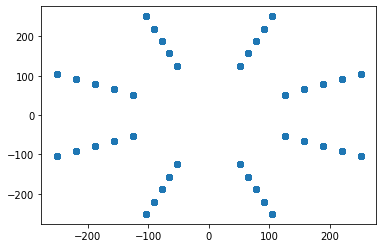

In [46]:
sess=2
x_dat = [df_dat.loc[(df_dat['monkey']=='Sa') & (df_dat['session']==sess)]['targ_xy'][n][0] for n in df_dat.loc[(df_dat['monkey']=='Sa') & (df_dat['session']==sess)].index]
y_dat = [df_dat.loc[(df_dat['monkey']=='Sa') & (df_dat['session']==sess)]['targ_xy'][n][1] for n in df_dat.loc[(df_dat['monkey']=='Sa') & (df_dat['session']==sess)].index]

plt.scatter(x_dat, y_dat)

## Autocorrelation of target positions

### all trials 

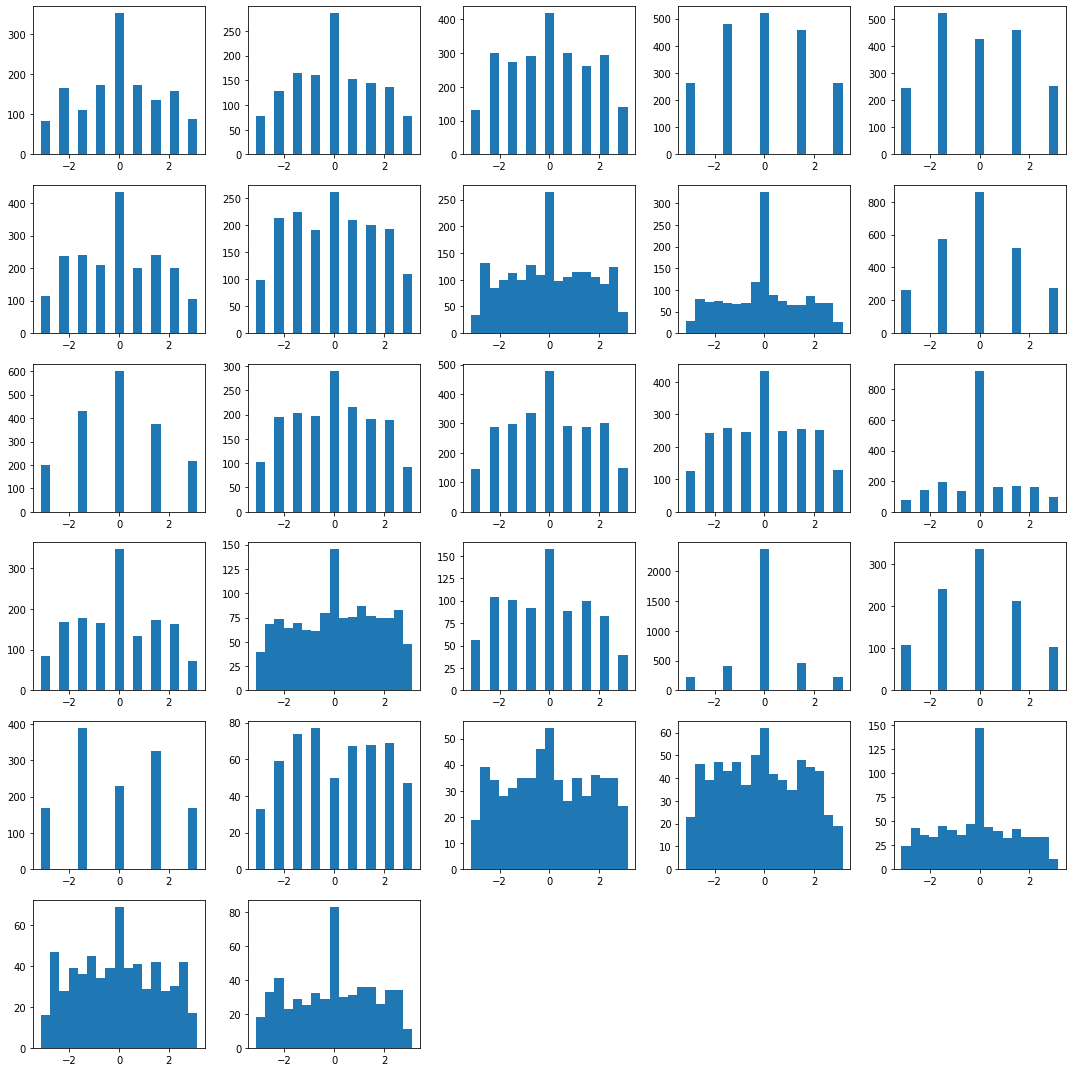

In [25]:
plt.figure(figsize=(15,15))
helper=1
for m in ['Sa','Pe','Wa']:
    for n in range(max(df_dat['session'].loc[df_dat['monkey']==m])+1):
        abc = circdist(df_dat.loc[(df_dat['monkey']==m) & (df_dat['session']==n)]['targ_angle'].values*np.pi/180,\
                       roll(df_dat.loc[(df_dat['monkey']==m) & (df_dat['session']==n)]['targ_angle'].values*np.pi/180,1))

        plt.subplot(6,5,helper)
        plt.hist(abc, bins=17)
        helper+=1
        
plt.tight_layout()
#plt.savefig('../Figures/Neural/SerialBias/Autocorrelation/histograms_correlationPrevCurr_Angle_allMonkeys_allTrials.png', dpi=150)
plt.show()

## only correct trials

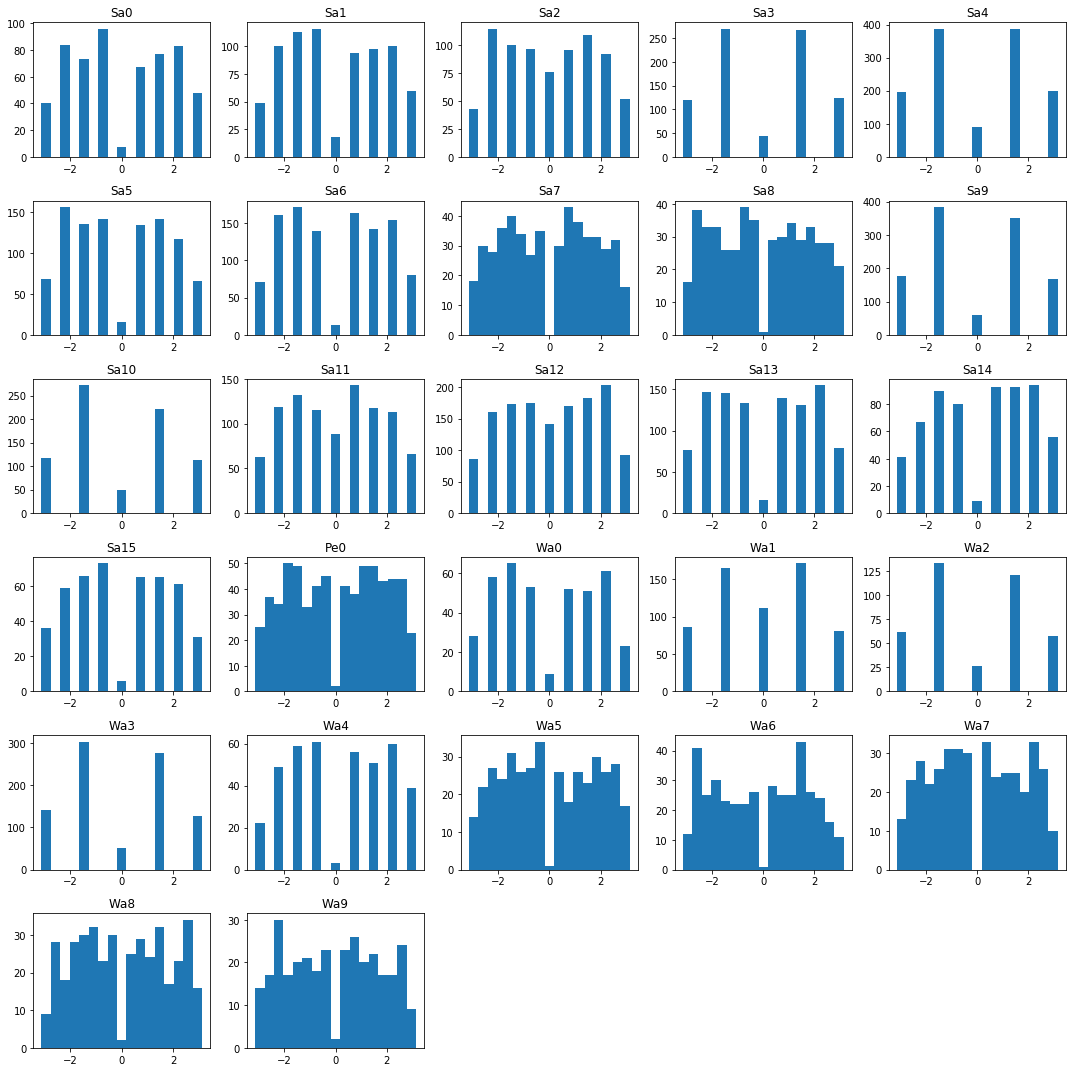

In [26]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
helper=1
for m in ['Sa','Pe','Wa']:
    for n in range(max(df_dat['session'].loc[df_dat['monkey']==m])+1):        
        plt.subplot(6,5,helper)
        plt.hist(circdist(df_dat_correct.loc[(df_dat_correct['monkey']==m) & (df_dat_correct['session']==n)]['targ_angle'].values*np.pi/180,\
                          roll(df_dat_correct.loc[(df_dat_correct['monkey']==m) & (df_dat_correct['session']==n)]['targ_angle'].values*np.pi/180,1)), bins=17)
        plt.title(m+str(n))
        helper+=1
plt.tight_layout()
#plt.savefig('../Figures/Neural/SerialBias/Autocorrelation/histograms_correlationPrevCurr_Angle_allMonkeys_CorrectTrials.png', dpi=150)
plt.show()

### distribution correct trial after broken trial

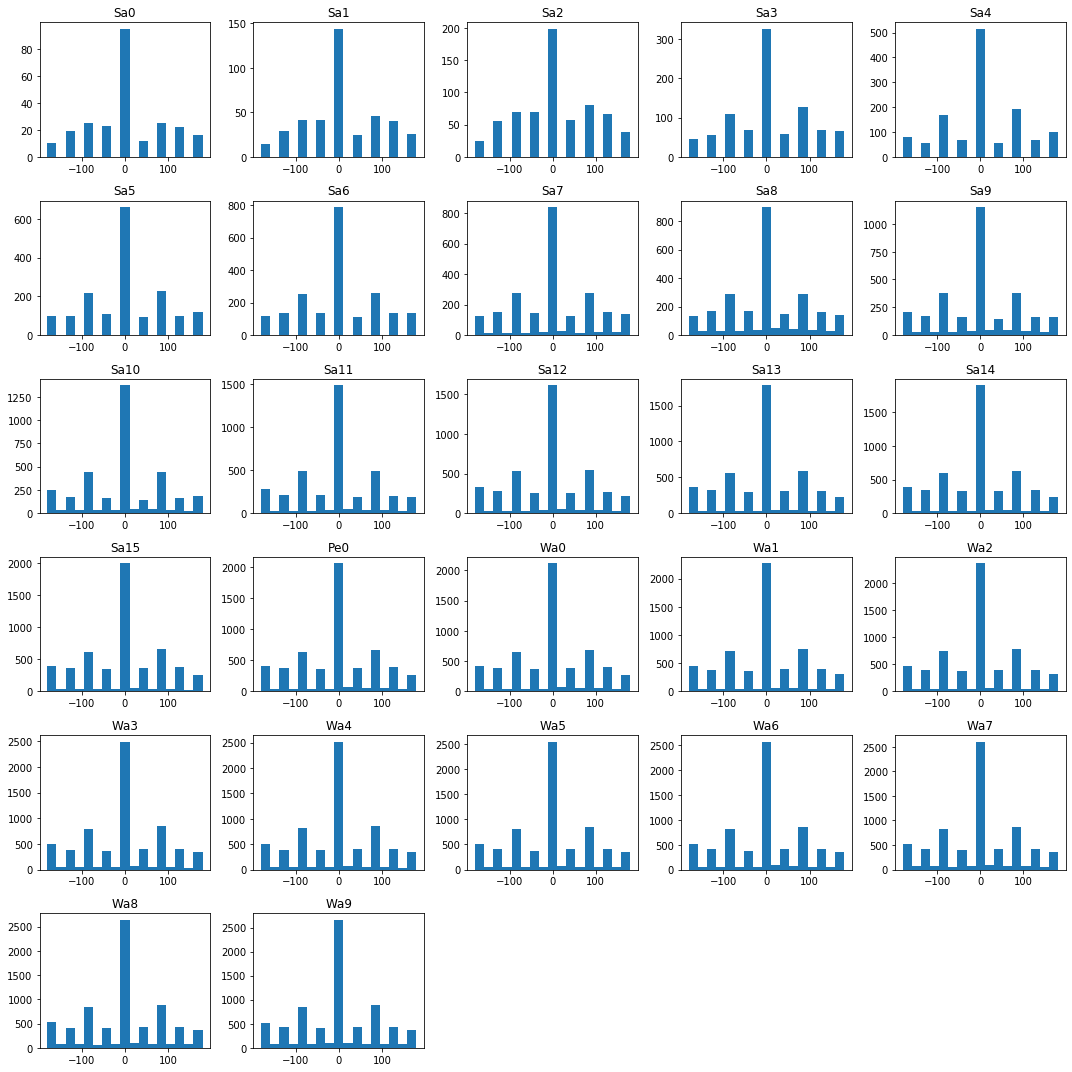

In [27]:
dist_err=[]
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
helper=1supermercat
for m in ['Sa', 'Pe', 'Wa']:
    for n in range(max(df_dat['session'].loc[df_dat['monkey']==m])+1):
        for i in df_dat.loc[(df_dat['monkey']==m) & (df_dat['session']==n)].index[:-1]:
            if (df_dat['broke'][i]==True) & (df_dat['broke'][i+1]==False):
                dist_err.append(circdist(df_dat['targ_angle'][i]*np.pi/180, df_dat['targ_angle'][i+1]*np.pi/180))
        plt.subplot(6,5,helper)
        plt.hist(np.concatenate(dist_err)*180/np.pi, bins=17)
        helper+=1
        plt.title(m+str(n))
plt.tight_layout()
#plt.savefig('../Figures/Behavioral/TargOrder/Histogram_brokeTrialCorrTrial.png', dpi=100)
plt.show()

### only correct trials used in SD

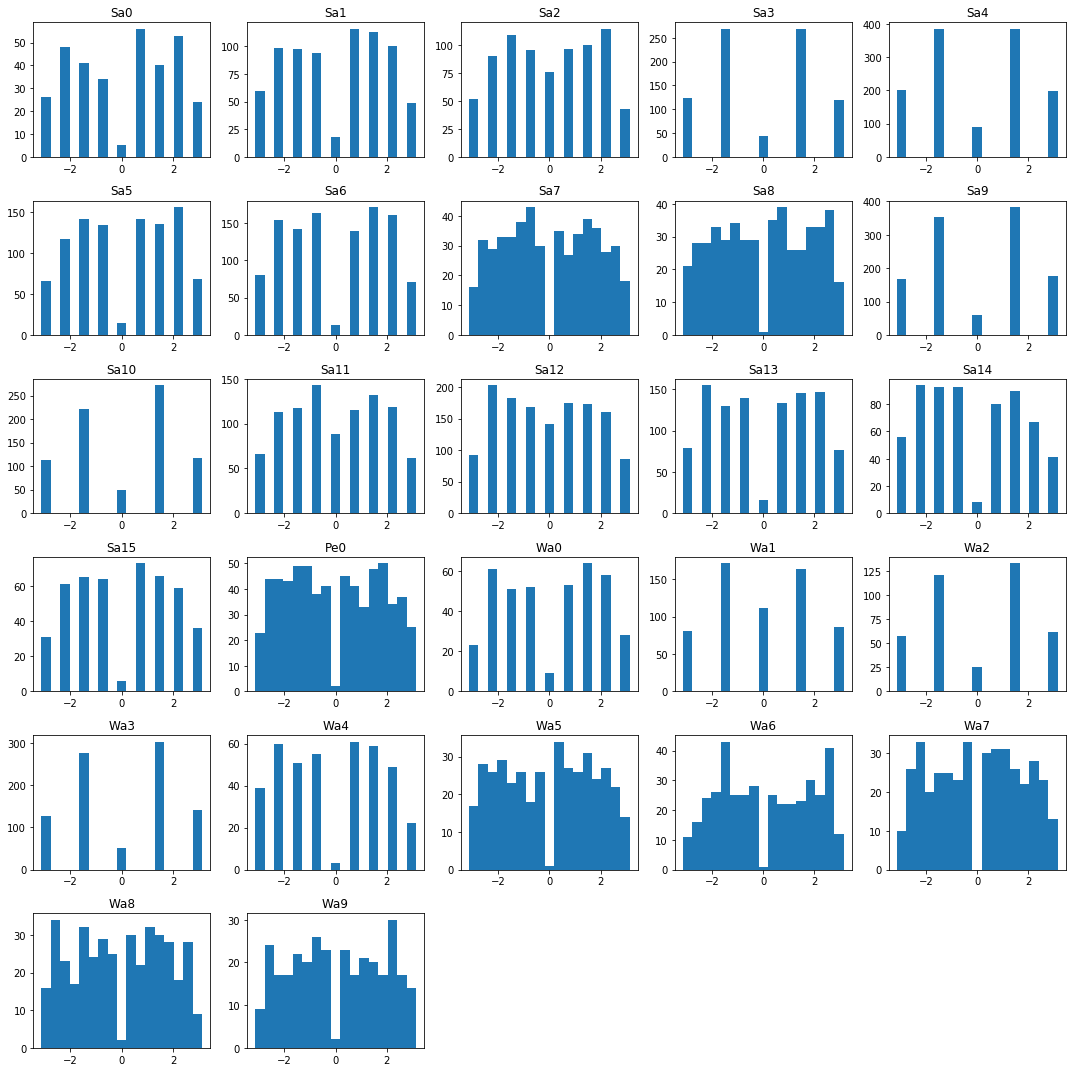

In [28]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
helper=1
for m in ['Sa','Pe','Wa']:
    for n in range(max(df_dat['session'].loc[df_dat['monkey']==m])+1):
        df_Sa0 = df_dat.loc[(df_dat['monkey']==m) & (df_dat['session']==n)]
        df_Sa0_corr = df_Sa0.loc[df_Sa0['outcome']=='CORRECT']#df_dat_correct.loc[(df_dat_correct['monkey']==m) & (df_dat_correct['session']==n)]

        serial = {'trial_id':[], 'outcome':[], 'target_prev': [],'target_prev_xy': [],  'targ_off_prev':[], 'go_cue_prev':[], 'response_prev': [],\
                  'delay_prev': [],'bin_sp_prev':[], 'target_curr': [], 'target_curr_xy': [], 'targ_on_curr':[], 'response_curr': [],\
                  'delay_curr': [], 'bin_sp_curr':[], 'ITI': [], 'broke': [], 'monkey': [], 'cw':[]}

        #for trial,idx in enumerate(df_Sa0.index[:-1]):
        #    if ((df_Sa0['trial_id'][idx]+1) == (df_Sa0['trial_id'][idx+1])):
        df_Sa0_corr_reset = df_Sa0_corr.copy().reset_index()

        cut_off_time=1
        for idx in df_Sa0_corr_reset.index[:-1]:# run through all correct trials (0,len)
            if df_Sa0_corr_reset.loc[idx,'trial_id'] < df_Sa0_corr_reset.loc[idx+1,'trial_id']: # only compare within one sesssion
                if np.sum(df_Sa0[df_Sa0_corr_reset.loc[idx,'index']+1:df_Sa0_corr_reset.loc[idx+1,'index']]['trial_end'])<cut_off_time: # only use trials with less than cut_off ms between 2 correct trials
                    serial['trial_id'].append(idx)
                    serial['outcome'].append(df_Sa0_corr_reset['outcome'][idx])
                    serial['target_prev'].append(df_Sa0_corr_reset['targ_angle'][idx]*np.pi/180)
                    serial['target_prev_xy'].append(df_Sa0_corr_reset['targ_xy'][idx])
                    serial['targ_off_prev'].append(df_Sa0_corr_reset['targ_off'][idx])
                    serial['go_cue_prev'].append(df_Sa0_corr_reset['go_cue'][idx])
                    serial['response_prev'].append(df_Sa0_corr_reset['saccade_angle'][idx]*np.pi/180)
                    serial['delay_prev'].append(df_Sa0_corr_reset['go_cue'][idx]-df_dat['targ_off'][idx])
                    #serial['bin_sp_prev'].append(bin_sp_complete[idx])
                    serial['target_curr'].append(df_Sa0_corr_reset['targ_angle'][idx+1]*np.pi/180)
                    serial['target_curr_xy'].append(df_Sa0_corr_reset['targ_xy'][idx+1])
                    serial['targ_on_curr'].append(df_Sa0_corr_reset['targ_on'][idx+1])
                    serial['response_curr'].append(df_Sa0_corr_reset['saccade_angle'][idx+1]*np.pi/180)
                    serial['delay_curr'].append(df_Sa0_corr_reset['go_cue'][idx+1]-df_Sa0_corr_reset['targ_off'][idx+1]) 
                    #serial['bin_sp_curr'].append(bin_sp_complete[idx+1])
                    serial['ITI'].append((df_Sa0_corr_reset['trial_end'][idx]-df_Sa0_corr_reset['go_cue'][idx])+np.sum(df_Sa0[df_Sa0_corr_reset.loc[idx,'index']+1:df_Sa0_corr_reset.loc[idx+1,'index']]['reward']) + (df_Sa0_corr_reset['targ_on'][idx+1]-df_Sa0_corr_reset['start'][idx+1]))# ITI time is time after reward + broken off fixations
                    serial['broke'].append(df_Sa0_corr_reset.loc[idx+1,'index']- (df_Sa0_corr_reset.loc[idx,'index']+1))# how many broken trials btwn 2 correct trials
                    serial['monkey'].append(df_Sa0_corr_reset['monkey'][idx])
                    #serial['cw'].append((df_Sa0_corr_reset['clockw'][idx]=='CW'))
                    
        plt.subplot(6,5,helper)
        plt.hist(circdist(serial['target_prev'],serial['target_curr']), bins=17)
        plt.title(m+str(n))
        helper+=1
plt.tight_layout()
#plt.savefig('../Figures/Neural/SerialBias/Autocorrelation/histograms_correlationPrevCurr_Angle_allMonkeys.png', dpi=150)
plt.show()


# Check complex decoder

In [146]:
# y is fixed only X changes based on time in trial
def decoder_complex_check(X,y):

    #y = np.array([complex(dataframe['target_prev_xy'][i][0],dataframe['target_prev_xy'][i][1]) for i in dataframe.index])
 
    mse=[]
    for k in range(0,10):# k=10 as in Barbosa2020
        
        #train test split
        rand_state = randint(0,1000)# to get the same split for previous, current
        X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rand_state)
        weights = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        #print(weights)    
        # make predictions of models
        # angle
        print(np.angle((weights.dot(X_test.T)))*180/np.pi)
        y_pred = np.angle((weights.dot(X_test.T)))#np.angle(weights.dot(X_test.T))
        mse.append(np.mean((circdist(y_pred,np.angle(y_test)))**2))
        print(np.angle(y_test)*180/np.pi)
        print(y_pred*180/np.pi)
 
    
    #angle
    mse_acc = np.mean(mse, axis=0)
    mse_std = np.std(mse, axis=0)

    return mse_acc, mse_std

In [147]:
# create random data of target positions
num_data=100
x = [tuple(df_serial.target_prev_xy.values[i]) for i in df_serial.index]
pos = list(set(x))
rand_data = [pos[randint(0,len(pos))] for i in range(num_data)]
help_X = pd.DataFrame(rand_data)
help_y = np.array([complex(rand_data[i][0], rand_data[i][1]) for i in range(num_data)])

mse_acc, mse_std = decoder_complex_check(help_X,help_y)


[-1.35000000e+02  1.35000000e+02 -1.35000000e+02  9.00000000e+01
  1.35000000e+02 -9.00000000e+01  1.35000000e+02 -4.50000000e+01
 -4.50000000e+01  1.80000000e+02 -1.35000000e+02 -2.33571984e-15
 -9.00000000e+01 -9.00000000e+01  1.80000000e+02  4.50000000e+01
 -4.50000000e+01 -2.33571984e-15  1.35000000e+02 -4.50000000e+01]
[-135.  135. -135.   90.  135.  -90.  135.  -45.  -45.  180. -135.    0.
  -90.  -90.  180.   45.  -45.    0.  135.  -45.]
[-1.35000000e+02  1.35000000e+02 -1.35000000e+02  9.00000000e+01
  1.35000000e+02 -9.00000000e+01  1.35000000e+02 -4.50000000e+01
 -4.50000000e+01  1.80000000e+02 -1.35000000e+02 -2.33571984e-15
 -9.00000000e+01 -9.00000000e+01  1.80000000e+02  4.50000000e+01
 -4.50000000e+01 -2.33571984e-15  1.35000000e+02 -4.50000000e+01]
[ 3.37933935e-15 -4.50000000e+01  1.35000000e+02 -9.00000000e+01
 -4.50000000e+01  9.00000000e+01  3.37933935e-15  1.35000000e+02
 -4.50000000e+01 -9.00000000e+01  1.80000000e+02  1.80000000e+02
  1.80000000e+02 -1.35000000e+

# Delay vs Response decoder

In [63]:
label_delay = 'delay'
label_response = 'ITI'
mode = 'MSE'#'r2'#'MSE'#
baseline_file = "../Results/baselineAcc_ResponseDelay_AllMonkeys.h5"

baseline = read_baseline(baseline_file, df_Sa0_monkey, df_Sa0_sess, mode)

In [158]:
acc_bias_prev_delay,std_bias_prev_delay,acc_bias_curr_delay,std_bias_curr_delay,\
acc_bias_prev_response,std_bias_prev_response,acc_bias_curr_response,std_bias_curr_response,\
acc_bias_prev_delay_dist,std_bias_prev_delay_dist,acc_bias_curr_delay_dist,std_bias_curr_delay_dist,\
acc_bias_prev_response_dist,std_bias_prev_response_dist,acc_bias_curr_response_dist,std_bias_curr_response_dist,\
weights_delay, weights_response= decoder_complex_delayVSresponse(df_serial,borders_full)

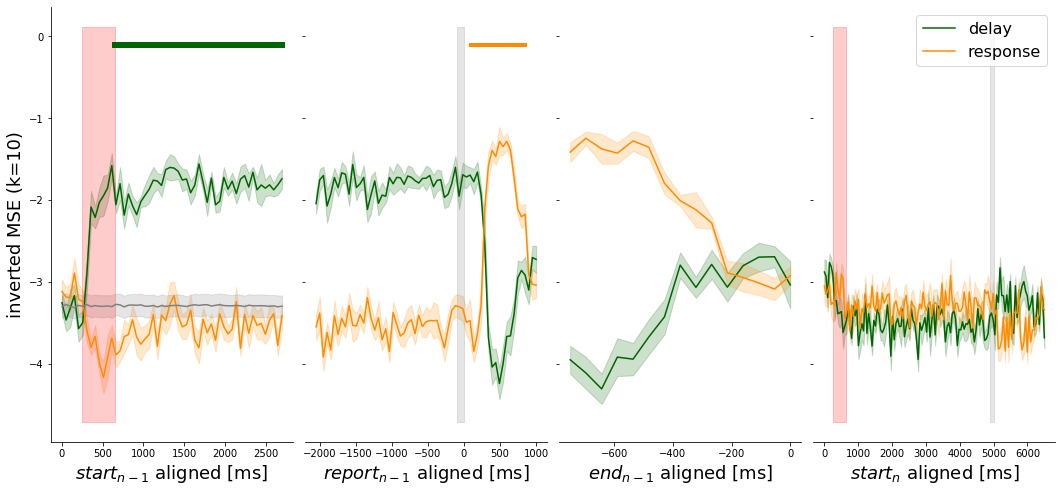

In [159]:
label_delay = 'delay'
label_response = 'response'
mode = 'MSE'#'r2'#'MSE'#
baseline_file = "../Results/baselineAcc_ResponseDelay_AllMonkeys.h5"
baseline = read_baseline(baseline_file, df_Sa0_monkey, df_Sa0_sess, mode)
plot_reactivations_hemispheres(acc_bias_prev_delay, std_bias_prev_delay, acc_bias_curr_delay, std_bias_curr_delay, label_delay,\
                                 acc_bias_prev_response, std_bias_prev_response, acc_bias_curr_response, std_bias_curr_response,label_response,\
                                 borders_full, mode, baseline)

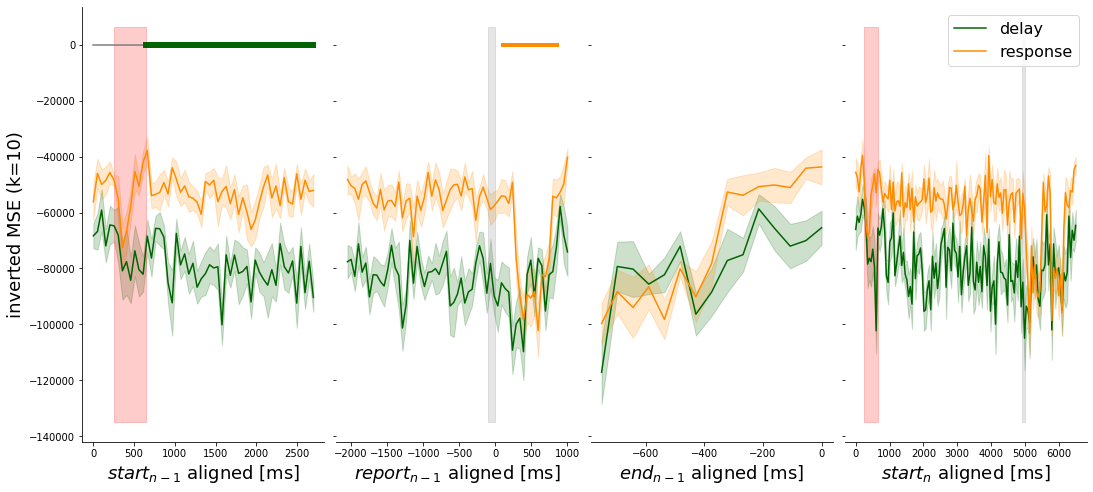

In [160]:
label_delay = 'delay'
label_response = 'response'
mode = 'MSE'#'r2'#'MSE'#
baseline_file = "../Results/baselineAcc_ResponseDelay_AllMonkeys.h5"
baseline = read_baseline(baseline_file, df_Sa0_monkey, df_Sa0_sess, mode)
plot_reactivations_hemispheres(acc_bias_prev_delay_dist, std_bias_prev_delay_dist, acc_bias_curr_delay_dist, std_bias_curr_delay_dist, label_delay,\
                                 acc_bias_prev_response_dist, std_bias_prev_response_dist, acc_bias_curr_response_dist, std_bias_curr_response_dist,label_response,\
                                 borders_full, mode, baseline)

# Compare hemifields

In [23]:
label_delay = 'delay'
label_response = 'ITI'
mode = 'MSE'#'r2'#'MSE'#
#baseline_file = "../Results/baselineAcc_ResponseDelay_AllMonkeys.h5
baseline_file = "../Results/baselineComplex_shuffleAlphaTest1000PermuteFirst_Sa0.h5"#baseline_shuffleAlphaTest1000PermuteFirst_allMonkeys.h5"#baseline_Sa0_shuffleTest.h5"#
#baseline_file = "../Results/baselineComplex_shuffleAlphaTest1000PermuteFirst_XMeanAdjust_Sa0.h5"#baseline_shuffleAlphaTest1000PermuteFirst_allMonkeys.h5"#baseline_Sa0_shuffleTest.h5"#
mode='MSE hemispheres'
baseline, baseline_dist = read_baseline(baseline_file,df_Sa0_monkey, df_Sa0_sess, mode)# 'Sa',0,mode)#

#for i in ['acc_prev','acc_curr','acc_prev_r','acc_curr_r','acc_prev_c','acc_curr_c','acc_prev_cr','acc_curr_cr']:
#    baseline[i] = baseline[i][0]

In [26]:
# idx neurons each hemispheres
left = np.where(left_idx[df_Sa0_monkey][df_Sa0_sess]==1)[1]#
right = np.where(right_idx[df_Sa0_monkey][df_Sa0_sess]==1)[1]

# target position left/right
#targ_left = np.where((df_serial['target_prev']>0) & (df_serial['target_prev']<np.pi))[0]
compl_targ = np.array([complex(df_serial['target_prev_xy'][i][0],df_serial['target_prev_xy'][i][1]) for i in df_serial.index])
targ_left = np.where((np.angle(compl_targ)>np.pi/2) | (np.angle(compl_targ)<-np.pi/2-0.1))[0]
targ_right = np.where((np.angle(compl_targ)>-np.pi/2) & (np.angle(compl_targ)<np.pi/2))[0]

#targ_left = np.where((df_serial['target_prev']>0) & (df_serial['target_prev']<np.pi))[0]
#targ_right = np.where((df_serial['target_prev']>np.pi) & (df_serial['target_prev']<2*np.pi))[0]

bool_targLeft = ((df_serial['target_prev']>0) & (df_serial['target_prev']<np.pi)).values

In [27]:
# create dataframe with only left neurons
df_serial_left = df_serial.copy()# ['bin_sp_prev'][0][0][left]
df_serial_left.drop(['bin_sp_prev'], axis=1)
df_serial_left['bin_sp_prev'] = [[df_serial['bin_sp_prev'][n][t][left] for t in range(len(df_serial['bin_sp_prev'][n]))] for n in range(len(df_serial['bin_sp_prev']))]
df_serial_left.drop(['bin_sp_curr'], axis=1)
df_serial_left['bin_sp_curr'] = [[df_serial['bin_sp_curr'][n][t][left] for t in range(len(df_serial['bin_sp_curr'][n]))] for n in range(len(df_serial['bin_sp_curr']))]

# only right neurons
df_serial_right = df_serial.copy()# ['bin_sp_prev'][0][0][left]
df_serial_right.drop(['bin_sp_prev'], axis=1)
df_serial_right['bin_sp_prev'] = [[df_serial['bin_sp_prev'][n][t][right] for t in range(len(df_serial['bin_sp_prev'][n]))] for n in range(len(df_serial['bin_sp_prev']))]
df_serial_right.drop(['bin_sp_curr'], axis=1)
df_serial_right['bin_sp_curr'] = [[df_serial['bin_sp_curr'][n][t][right] for t in range(len(df_serial['bin_sp_curr'][n]))] for n in range(len(df_serial['bin_sp_curr']))]


## Firing rates

In [143]:
mean_firing_il=[]
mean_firing_cl=[]
std_firing_il=[]
std_firing_cl=[]
mean_firing_ir=[]
mean_firing_cr=[]
std_firing_ir=[]
std_firing_cr=[]
base_ipsi_left=[]
base_contra_left=[]
base_ipsi_right=[]
base_contra_right=[]

# determine baseline
for delta_t in range(borders_full[2]):# compute baseline before stimulus onset
    base_ipsi_left.append([df_serial_left.loc[targ_left]['bin_sp_prev'][n][delta_t] for n in df_serial_left.loc[targ_left].index])
    base_contra_left.append([df_serial_left.loc[targ_right]['bin_sp_prev'][n][delta_t] for n in df_serial_left.loc[targ_right].index])
    base_ipsi_right.append([df_serial_right.loc[targ_right]['bin_sp_prev'][n][delta_t] for n in df_serial_right.loc[targ_right].index])
    base_contra_right.append([df_serial_right.loc[targ_left]['bin_sp_prev'][n][delta_t] for n in df_serial_right.loc[targ_left].index])
    
base_mean_ipsi_left = np.mean(np.concatenate(base_ipsi_left), axis=0)# calculate mean spikes per neuron before stimulus onset
base_std_ipsi_left = np.std(np.concatenate(base_ipsi_left), axis=0)# calculate mean spikes per neuron before stimulus onset
base_mean_contra_left = np.mean(np.concatenate(base_contra_left), axis=0)# calc std per neuron before stim onset
base_std_contra_left = np.std(np.concatenate(base_contra_left), axis=0)# calc std per neuron before stim onset
base_mean_ipsi_right = np.mean(np.concatenate(base_ipsi_right), axis=0)# calculate mean spikes per neuron before stimulus onset
base_std_ipsi_right = np.std(np.concatenate(base_ipsi_right), axis=0)# calculate mean spikes per neuron before stimulus onset
base_mean_contra_right = np.mean(np.concatenate(base_contra_right), axis=0)# calc std per neuron before stim onset
base_std_contra_right = np.std(np.concatenate(base_contra_right), axis=0)# calc std per neuron before stim onset

for delta_t in range(len(bin_sp_complete[0])):# for each time step
    # subtract baseline/sem (z-score) for each individual neuron, compute mean firing rate, take mean across z-scored neurons
    mean_firing_il.append(np.mean(np.mean(([df_serial_left.loc[targ_left]['bin_sp_prev'][n][delta_t] for n in df_serial_left.loc[targ_left].index]-base_mean_ipsi_left)/base_std_ipsi_left, axis=0)))
    mean_firing_cl.append(np.mean(np.mean(([df_serial_left.loc[targ_right]['bin_sp_prev'][n][delta_t] for n in df_serial_left.loc[targ_right].index]-base_mean_contra_left)/base_std_contra_left, axis=0)))
    mean_firing_ir.append(np.mean(np.mean(([df_serial_right.loc[targ_right]['bin_sp_prev'][n][delta_t] for n in df_serial_right.loc[targ_right].index]-base_mean_ipsi_right)/base_std_ipsi_right, axis=0)))
    mean_firing_cr.append(np.mean(np.mean(([df_serial_right.loc[targ_left]['bin_sp_prev'][n][delta_t] for n in df_serial_right.loc[targ_left].index]-base_mean_contra_right)/base_std_contra_right, axis=0)))
    # compute std of z-scored spiking data
    std_firing_il.append(sem(np.mean(([df_serial_left.loc[targ_left]['bin_sp_prev'][n][delta_t] for n in df_serial_left.loc[targ_left].index]-base_mean_ipsi_left)/base_std_ipsi_left, axis=0)))
    std_firing_cl.append(sem(np.mean(([df_serial_left.loc[targ_right]['bin_sp_prev'][n][delta_t] for n in df_serial_left.loc[targ_right].index]-base_mean_contra_left)/base_std_contra_left, axis=0)))  
    std_firing_ir.append(sem(np.mean(([df_serial_right.loc[targ_right]['bin_sp_prev'][n][delta_t] for n in df_serial_right.loc[targ_right].index]-base_mean_ipsi_right)/base_std_ipsi_right, axis=0)))
    std_firing_cr.append(sem(np.mean(([df_serial_right.loc[targ_left]['bin_sp_prev'][n][delta_t] for n in df_serial_right.loc[targ_left].index]-base_mean_contra_right)/base_std_contra_right, axis=0)))  


### left neurons

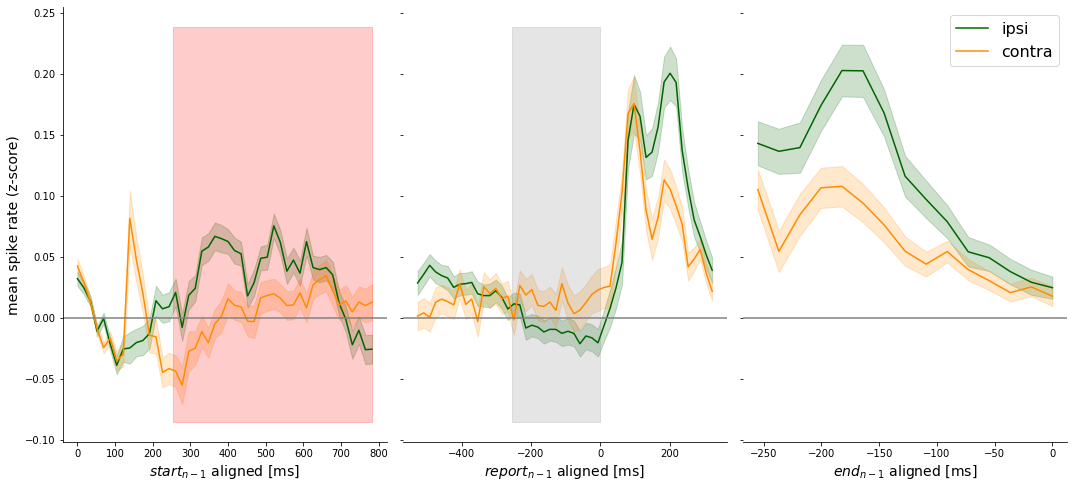

Ttest_indResult(statistic=-2.505715897336433, pvalue=0.012944587228703255)

In [144]:
plot_meanFiring_IpsiContra(mean_firing_il, std_firing_il, mean_firing_cl, std_firing_cl,borders_full) # ipsi, contra
ttest_ind(mean_firing_cl,mean_firing_il)

### right neurons

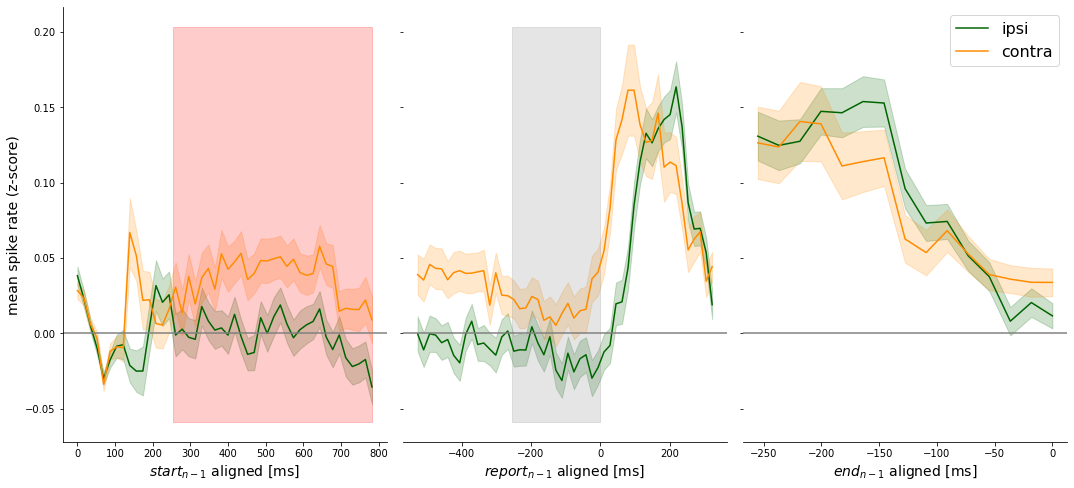

Ttest_indResult(statistic=4.048439361715729, pvalue=7.143722950174903e-05)

In [145]:
plot_meanFiring_IpsiContra(mean_firing_ir, std_firing_ir, mean_firing_cr, std_firing_cr,borders_full) # ipsi, contra
ttest_ind(mean_firing_cr,mean_firing_ir)

# left neurons

### complex decoder

In [70]:
label_delay = 'delay'
label_response = 'ITI'

baseline_file = "../Results/baselineComplex_shuffleAlphaTest1000PermuteFirst_Sa0.h5"#baseline_shuffleAlphaTest1000PermuteFirst_allMonkeys.h5"#baseline_Sa0_shuffleTest.h5"#
mode='MSE hemispheres'
baseline, baseline_dist = read_baseline(baseline_file,df_Sa0_monkey,df_Sa0_sess, mode)#'Sa',0,mode)#


In [72]:
acc_bias_prev_delay_left,std_bias_prev_delay_left,acc_bias_curr_delay_left,std_bias_curr_delay_left,\
acc_bias_prev_response_left,std_bias_prev_response_left,acc_bias_curr_response_left,std_bias_curr_response_left,\
acc_bias_prev_delay_right,std_bias_prev_delay_right,acc_bias_curr_delay_right,std_bias_curr_delay_right,\
acc_bias_prev_response_right,std_bias_prev_response_right,acc_bias_curr_response_right,\
std_bias_curr_response_right,\
acc_bias_prev_delay_left_dist,std_bias_prev_delay_left_dist,acc_bias_curr_delay_left_dist,std_bias_curr_delay_left_dist,\
acc_bias_prev_response_left_dist,std_bias_prev_response_left_dist,acc_bias_curr_response_left_dist,std_bias_curr_response_left_dist,\
acc_bias_prev_delay_right_dist,std_bias_prev_delay_right_dist,acc_bias_curr_delay_right_dist,std_bias_curr_delay_right_dist,\
acc_bias_prev_response_right_dist,std_bias_prev_response_right_dist,acc_bias_curr_response_right_dist,\
std_bias_curr_response_right_dist,\
weight_d,weight_r= complex_decoder_IpsiContra(df_serial_left, borders_full, 'left')

In [113]:
# subtract baseline
acc_bias_prev_delay_left = acc_bias_prev_delay_left-baseline['acc_prev'] 
acc_bias_prev_response_left = acc_bias_prev_response_left-baseline['acc_prev_r']
acc_bias_prev_delay_right = acc_bias_prev_delay_right-baseline['acc_prev_c'] 
acc_bias_prev_response_right = acc_bias_prev_response_right-baseline['acc_prev_cr']
acc_bias_curr_delay_left = acc_bias_curr_delay_left-baseline['acc_curr'] 
acc_bias_curr_response_left = acc_bias_curr_response_left-baseline['acc_curr_r']
acc_bias_curr_delay_right = acc_bias_curr_delay_right-baseline['acc_curr_c'] 
acc_bias_curr_response_right = acc_bias_curr_response_right-baseline['acc_curr_cr']

# subtract baseline for radius
acc_bias_prev_delay_left_dist = acc_bias_prev_delay_left_dist-baseline_dist['acc_prev'] 
acc_bias_prev_response_left_dist = acc_bias_prev_response_left_dist-baseline_dist['acc_prev_r']
acc_bias_prev_delay_right_dist = acc_bias_prev_delay_right_dist-baseline_dist['acc_prev_c'] 
acc_bias_prev_response_right_dist = acc_bias_prev_response_right_dist-baseline_dist['acc_prev_cr']
acc_bias_curr_delay_left_dist = acc_bias_curr_delay_left_dist-baseline_dist['acc_curr'] 
acc_bias_curr_response_left_dist = acc_bias_curr_response_left_dist-baseline_dist['acc_curr_r']
acc_bias_curr_delay_right_dist = acc_bias_curr_delay_right_dist-baseline_dist['acc_curr_c'] 
acc_bias_curr_response_right_dist = acc_bias_curr_response_right_dist-baseline_dist['acc_curr_cr']

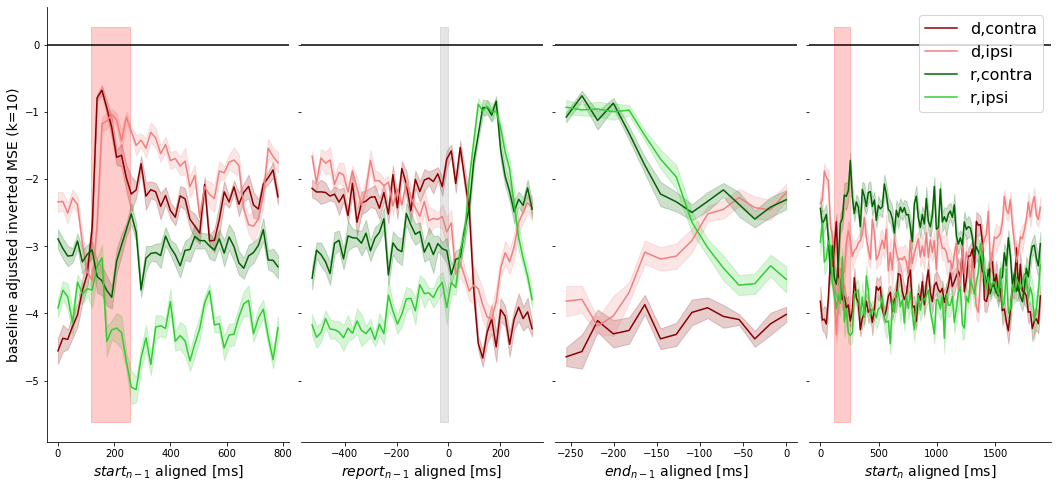

In [73]:
mode='MSE'
plot_hemispheres_delayVSresponse(acc_bias_prev_delay_left,std_bias_prev_delay_left,acc_bias_curr_delay_left,std_bias_curr_delay_left,'d,ipsi',\
acc_bias_prev_response_left,std_bias_prev_response_left,acc_bias_curr_response_left,std_bias_curr_response_left,'r,ipsi',\
acc_bias_prev_delay_right,std_bias_prev_delay_right,acc_bias_curr_delay_right,std_bias_curr_delay_right,'d,contra',\
acc_bias_prev_response_right,std_bias_prev_response_right,acc_bias_curr_response_right, std_bias_curr_response_right,'r,contra',\
                                 borders, borders_pastdelay, mode, baseline)

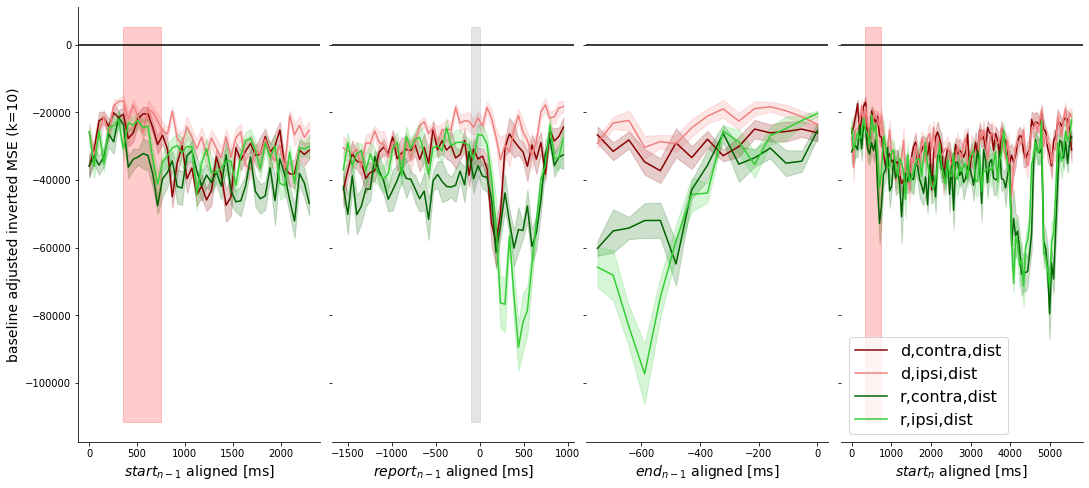

In [185]:
mode='MSE'
plot_hemispheres_delayVSresponse(acc_bias_prev_delay_left_dist,std_bias_prev_delay_left_dist,acc_bias_curr_delay_left_dist,std_bias_curr_delay_left_dist,'d,ipsi,dist',\
acc_bias_prev_response_left_dist,std_bias_prev_response_left_dist,acc_bias_curr_response_left_dist,std_bias_curr_response_left_dist,'r,ipsi,dist',\
acc_bias_prev_delay_right_dist,std_bias_prev_delay_right_dist,acc_bias_curr_delay_right_dist,std_bias_curr_delay_right_dist,'d,contra,dist',\
acc_bias_prev_response_right_dist,std_bias_prev_response_right_dist,acc_bias_curr_response_right_dist, std_bias_curr_response_right_dist,'r,contra,dist',\
                                 borders, borders_pastdelay, mode, baseline)

## right neurons


In [74]:
acc_bias_prev_delay_left,std_bias_prev_delay_left,acc_bias_curr_delay_left,std_bias_curr_delay_left,\
acc_bias_prev_response_left,std_bias_prev_response_left,acc_bias_curr_response_left,std_bias_curr_response_left,\
acc_bias_prev_delay_right,std_bias_prev_delay_right,acc_bias_curr_delay_right,std_bias_curr_delay_right,\
acc_bias_prev_response_right,std_bias_prev_response_right,acc_bias_curr_response_right,\
std_bias_curr_response_right,\
acc_bias_prev_delay_left_dist,std_bias_prev_delay_left_dist,acc_bias_curr_delay_left_dist,std_bias_curr_delay_left_dist,\
acc_bias_prev_response_left_dist,std_bias_prev_response_left_dist,acc_bias_curr_response_left_dist,std_bias_curr_response_left_dist,\
acc_bias_prev_delay_right_dist,std_bias_prev_delay_right_dist,acc_bias_curr_delay_right_dist,std_bias_curr_delay_right_dist,\
acc_bias_prev_response_right_dist,std_bias_prev_response_right_dist,acc_bias_curr_response_right_dist,\
std_bias_curr_response_right_dist,weight_d_right,weight_r_right = complex_decoder_IpsiContra(df_serial_right, borders_full, 'right')

In [ ]:
# subtract baseline
acc_bias_prev_delay_left = acc_bias_prev_delay_left-baseline['acc_prev_c'] 
acc_bias_prev_response_left = acc_bias_prev_response_left-baseline['acc_prev_cr']
acc_bias_prev_delay_right = acc_bias_prev_delay_right-baseline['acc_prev'] 
acc_bias_prev_response_right = acc_bias_prev_response_right-baseline['acc_prev_r']
acc_bias_curr_delay_left = acc_bias_curr_delay_left-baseline['acc_curr_c'] 
acc_bias_curr_response_left = acc_bias_curr_response_left-baseline['acc_curr_cr']
acc_bias_curr_delay_right = acc_bias_curr_delay_right-baseline['acc_curr'] 
acc_bias_curr_response_right = acc_bias_curr_response_right-baseline['acc_curr_r']

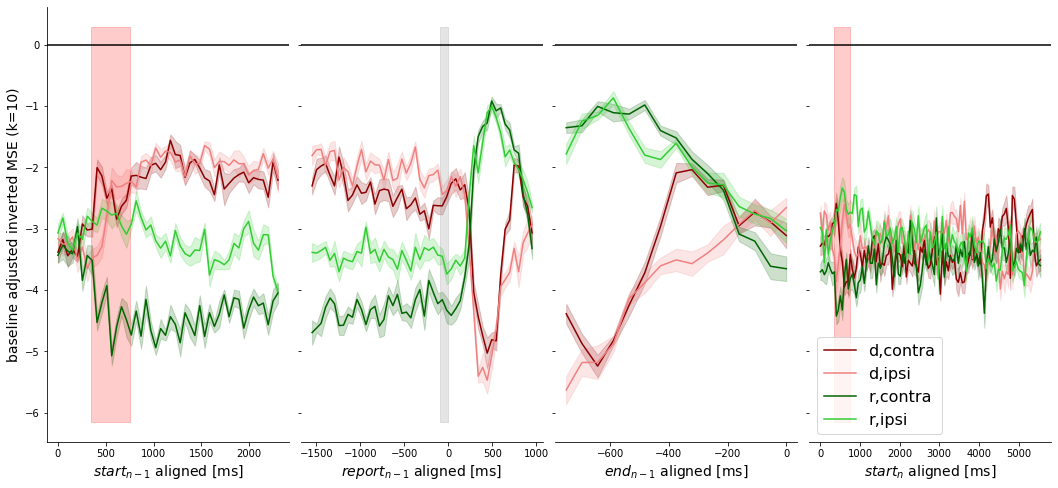

In [188]:
mode='MSE'
plot_hemispheres_delayVSresponse(acc_bias_prev_delay_left,std_bias_prev_delay_left,acc_bias_curr_delay_left,std_bias_curr_delay_left,'d,ipsi',\
acc_bias_prev_response_left,std_bias_prev_response_left,acc_bias_curr_response_left,std_bias_curr_response_left,'r,ipsi',\
acc_bias_prev_delay_right,std_bias_prev_delay_right,acc_bias_curr_delay_right,std_bias_curr_delay_right,'d,contra',\
acc_bias_prev_response_right,std_bias_prev_response_right,acc_bias_curr_response_right, std_bias_curr_response_right,'r,contra',\
                                 borders, borders_pastdelay, mode, baseline)

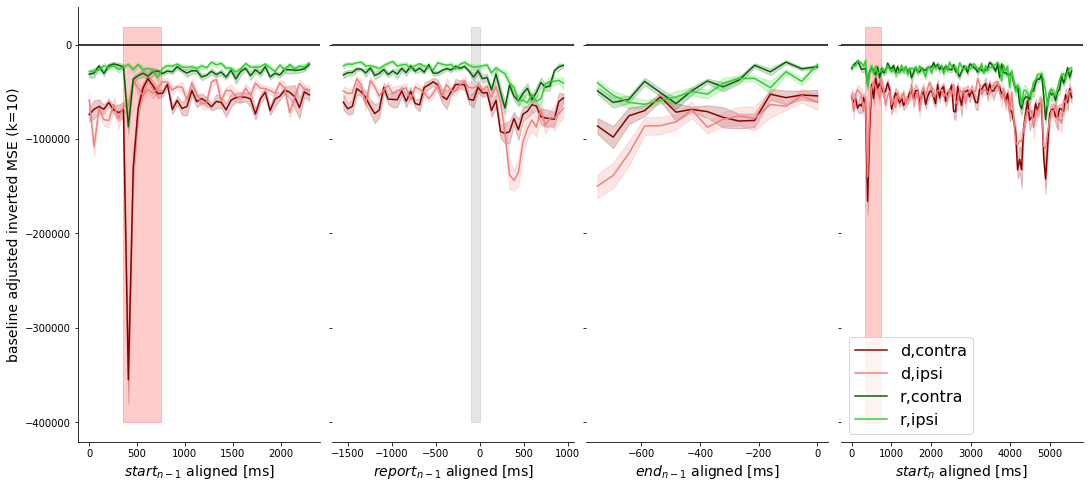

In [197]:
mode='MSE'
plot_hemispheres_delayVSresponse(acc_bias_prev_delay_left_dist,std_bias_prev_delay_left_dist,acc_bias_curr_delay_left_dist,std_bias_curr_delay_left_dist,'d,ipsi',\
acc_bias_prev_response_left_dist,std_bias_prev_response_left_dist,acc_bias_curr_response_left_dist,std_bias_curr_response_left_dist,'r,ipsi',\
acc_bias_prev_delay_right_dist,std_bias_prev_delay_right_dist,acc_bias_curr_delay_right_dist,std_bias_curr_delay_right_dist,'d,contra',\
acc_bias_prev_response_right_dist,std_bias_prev_response_right_dist,acc_bias_curr_response_right_dist, std_bias_curr_response_right_dist,'r,contra',\
                                 borders, borders_pastdelay, mode, baseline)

# Compare left and right decoding/preferred directions

In [75]:
bins=17
x_histo = np.linspace(-180,180,bins) 

dist_d = np.mean(np.abs(weight_d),axis=0)
histo_d = np.zeros(bins)

for idx, m in enumerate(np.mean(np.angle(weight_d)*180/np.pi,axis=0)):
    for i in range(len(x_histo)-1):
        if x_histo[i]<m<x_histo[i+1]:
            histo_d[i]+=dist_d[idx]
            
dist_d_right = np.mean(np.abs(weight_d_right),axis=0)
histo_d_right = np.zeros(bins)
for idx, m in enumerate(np.mean(np.angle(weight_d_right)*180/np.pi,axis=0)):
    for i in range(len(x_histo)-1):
        if x_histo[i]<m<x_histo[i+1]:
            histo_d_right[i]+=dist_d_right[idx]

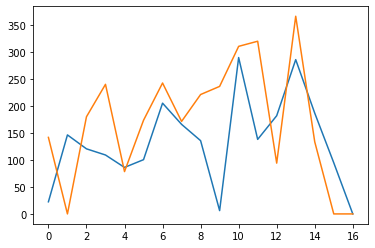

In [76]:
plt.plot(histo_d)
plt.plot(histo_d_right)

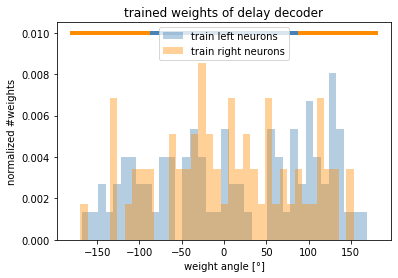

In [127]:
plt.figure()
plt.hist(np.mean(np.angle(weight_d)*180/np.pi,axis=0), bins=37, alpha=0.4, density=True,color='steelblue', label='train left neurons')
plt.hist(np.mean(np.angle(weight_d_right)*180/np.pi,axis=0), bins=37, alpha=0.4, density=True,color='darkorange', label='train right neurons')
plt.plot([-90,90],[0.01,0.01], color='steelblue', linewidth=4)
plt.plot([-180,-90],[0.01,0.01], color='darkorange', linewidth=4)
plt.plot([90,180],[0.01,0.01], color='darkorange', linewidth=4)
plt.xlabel('weight angle [°]')
plt.ylabel('normalized #weights')
plt.title('trained weights of delay decoder')
#plt.savefig('../Figures/Neural/ComplexWeights/PreferredAngle_TrainedWeight_Delay.png', dpi=100, bbox_inches='tight')
plt.legend()
plt.show()



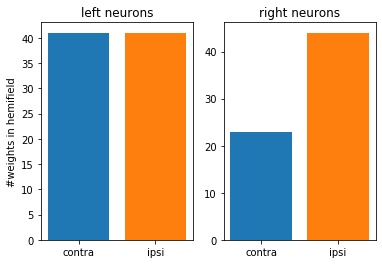

In [126]:
left_inleft = len(np.mean(np.angle(weight_d)*180/np.pi, axis=0)[(np.mean(np.angle(weight_d)*180/np.pi, axis=0)<-90) | (np.mean(np.angle(weight_d)*180/np.pi, axis=0)>90)])
left_inright = len(np.mean(np.angle(weight_d)*180/np.pi, axis=0)[(np.mean(np.angle(weight_d)*180/np.pi, axis=0)>-90) & (np.mean(np.angle(weight_d)*180/np.pi, axis=0)<90)])

right_inleft = len(np.mean(np.angle(weight_d_right)*180/np.pi, axis=0)[(np.mean(np.angle(weight_d_right)*180/np.pi, axis=0)<-90) | (np.mean(np.angle(weight_d_right)*180/np.pi, axis=0)>90)])
right_inright = len(np.mean(np.angle(weight_d_right)*180/np.pi, axis=0)[(np.mean(np.angle(weight_d_right)*180/np.pi, axis=0)>-90) & (np.mean(np.angle(weight_d_right)*180/np.pi, axis=0)<90)])


plt.figure()
plt.subplot(121)
plt.bar(0,left_inright)
plt.bar(1,left_inleft)
plt.xticks([0,1], ['contra', 'ipsi'])
plt.title('left neurons')
plt.ylabel('#weights in hemifield')
plt.subplot(122)
plt.bar(0,right_inleft)
plt.bar(1,right_inright)
plt.xticks([0,1], ['contra', 'ipsi'])
plt.title('right neurons')
plt.show()



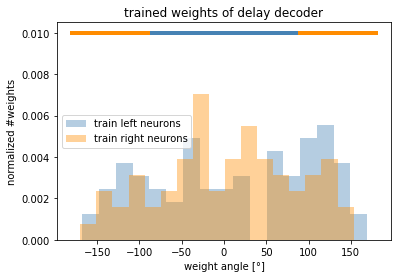

In [129]:
plt.figure()
plt.hist(np.mean(np.angle(weight_d)*180/np.pi,axis=0), bins=17, alpha=0.4, density=True,color='steelblue', label='train left neurons')
plt.hist(np.mean(np.angle(weight_d_right)*180/np.pi,axis=0), bins=17, alpha=0.4, density=True,color='darkorange', label='train right neurons')
plt.plot([-90,90],[0.01,0.01], color='steelblue', linewidth=4)
plt.plot([-180,-90],[0.01,0.01], color='darkorange', linewidth=4)
plt.plot([90,180],[0.01,0.01], color='darkorange', linewidth=4)
plt.xlabel('weight angle [°]')
plt.ylabel('normalized #weights')
plt.title('trained weights of delay decoder')
#plt.savefig('../Figures/Neural/ComplexWeights/PreferredAngle_TrainedWeight_Delay.png', dpi=100, bbox_inches='tight')
plt.legend()
plt.show()

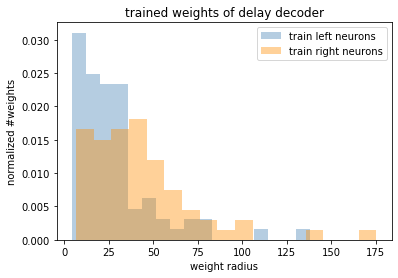

In [130]:
plt.figure()
plt.hist(np.mean(np.abs(weight_d),axis=0), bins=17, alpha=0.4, density=True,color='steelblue', label='train left neurons')
plt.hist(np.mean(np.abs(weight_d_right),axis=0), bins=17, alpha=0.4, density=True,color='darkorange', label='train right neurons')
#plt.plot([-90,90],[0.01,0.01], color='darkorange', linewidth=4)
#plt.plot([-180,-90],[0.01,0.01], color='steelblue', linewidth=4)
#plt.plot([90,180],[0.01,0.01], color='steelblue', linewidth=4)
plt.xlabel('weight radius')
plt.ylabel('normalized #weights')
plt.title('trained weights of delay decoder')
#plt.savefig('../Figures/Neural/ComplexWeights/PreferredAngle_TrainedWeight_Delay.png', dpi=100, bbox_inches='tight')
plt.legend()
plt.show()

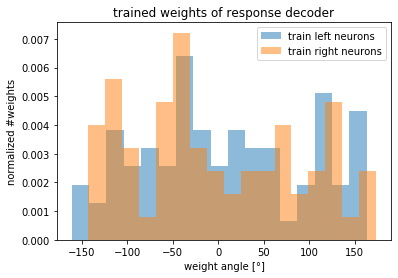

In [200]:
plt.figure()
plt.hist(np.mean(np.angle(weight_r)*180/np.pi,axis=0), bins=17, alpha=0.5, density=True, label='train left neurons')
plt.hist(np.mean(np.angle(weight_r_right)*180/np.pi,axis=0), bins=17, alpha=0.5, density=True, label='train right neurons')
plt.xlabel('weight angle [°]')
plt.ylabel('normalized #weights')
plt.title('trained weights of response decoder')
plt.legend()
plt.show()

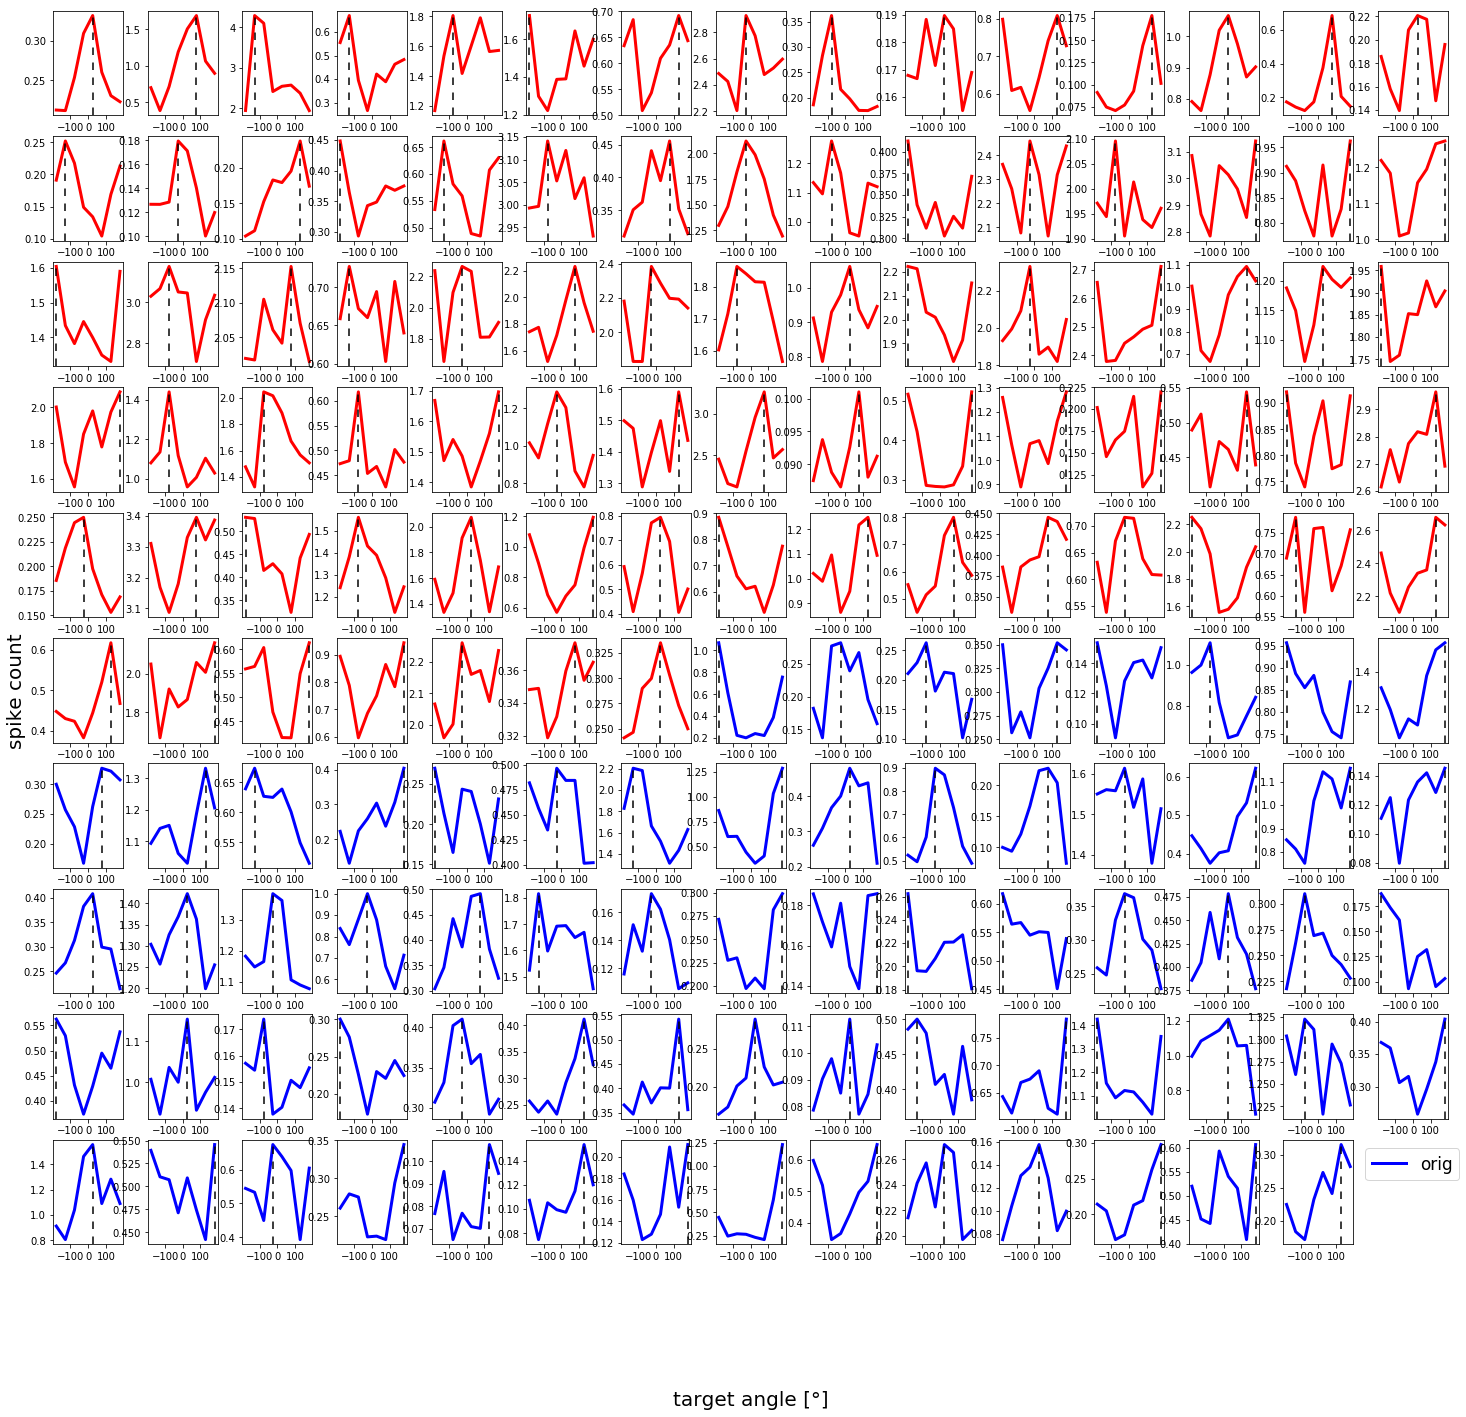

In [32]:
X_delay=pd.DataFrame([np.mean(df_serial['bin_sp_prev'][n][borders_full[2]:borders_full[3]], axis=0) for n in range(len(df_serial['bin_sp_prev']))])
#X_delay=pd.DataFrame([df_serial['bin_sp_prev'][n][110] for n in df_serial.index])
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_delay)
X_delay_norm = pd.DataFrame(d, columns=X_delay.columns)
X_delay_mean = pd.DataFrame(np.array([X_delay.loc[:,n]/np.mean(X_delay.loc[:,n]) for n in X_delay.columns]).T)
X_delay_min = pd.DataFrame(np.array([X_delay.loc[:,n]-np.min(X_delay.loc[:,n]) for n in X_delay.columns]).T)
    
X_response=pd.DataFrame([np.mean(df_serial['bin_sp_prev'][n][borders_full[7]:borders_full[8]], axis=0) for n in range(len(df_serial['bin_sp_prev']))])
y = np.array([complex(df_serial['target_prev_xy'][i][0],df_serial['target_prev_xy'][i][1]) for i in df_serial.index])
RF_all=[]
RF_means=[]
pref_dir=[]
RFs_full=[]
#plt.subplots(11,15,figsize=(15,15), sharey=True)

fig=plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.2,wspace=0.35)
for n in X_delay.columns:
    RF=[]
    RF_mean=[]
    RF_norm=[]
    RF_min=[]
    for k in np.unique(np.angle(y)):
        RF.append(np.mean(X_delay.loc[np.where(np.angle(y)==k)][n]))
        #RF_mean.append(np.mean(X_delay_mean.loc[np.where(np.angle(y)==k)][n]))
        #RF_norm.append(np.mean(X_delay_norm.loc[np.where(np.angle(y)==k)][n]))
        #RF_min.append(np.mean(X_delay_min.loc[np.where(np.angle(y)==k)][n]))
    #pref_dir.append(np.angle(y[np.where(X_delay.loc[n] == max(X_delay.loc[n]))[0]])[0]*180/np.pi)
    RFs_full.append(RF)
    RF_means.append(np.mean(RF))
    xRF=np.linspace(-180,180,len(np.unique(np.angle(y))))
    pref_dir.append(xRF[np.where(RF==max(RF))[0][0]])
    if left_idx[df_Sa0_monkey][df_Sa0_sess][0][n] == 1:
        color='red'
    else:
        color='blue'
        
    #RF = RF/(np.mean(X_delay.loc[:,n]))
    plt.subplot(11,15,n+1)
    plt.plot(xRF,RF, label='orig', color=color, linewidth=3)
    plt.axvline(xRF[np.where(RF==max(RF))[0][0]], color='k', dashes=[5,5])
    #plt.plot(xRF,RF_mean, label='mean', color='darkorange', linewidth=4)#, color='deeppink'
    #plt.plot(xRF,RF_norm, label='norm',color='#006d77', linewidth=4)#, color='forestgreen'
    #plt.plot(xRF,RF_min, label='min', color='red', linewidth=3)
    #plt.ylim([0,5])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=17)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('target angle [°]', fontsize=20)
plt.ylabel('spike count', fontsize=20)
#plt.savefig('../Figures/Neural/ReceptiveFields/RF_ShareY_CompareMeanNormReal_DelayDecoder_Sa0.png', dpi=100, bbox_inches='tight')
plt.show()

array([0.25411181, 1.01705023, 2.77722132, 0.45532255, 1.55763258,
       1.46574176, 0.61882599, 2.55305502, 0.22203525, 0.17412485,
       0.68781608, 0.10361199, 0.90792467, 0.25177908, 0.18418806,
       0.17872507, 0.136703  , 0.16692864, 0.36449347, 0.5684315 ,
       3.03853066, 0.37265947, 1.6325058 , 1.10480451, 0.33937937,
       2.28744891, 1.96915814, 2.96913903, 0.85923663, 1.16530793,
       1.44185972, 3.00433289, 2.06033288, 0.67048129, 2.00178055,
       1.83277943, 2.13094382, 1.73856895, 0.92944923, 2.03792905,
       1.99653911, 2.50384479, 0.91251096, 1.16797547, 1.85796185,
       1.8652674 , 1.10884381, 1.68606127, 0.48696682, 1.53412721,
       1.01970056, 1.43987964, 2.56606938, 0.09117762, 0.36679716,
       1.09965006, 0.16991454, 0.46974168, 0.83195685, 2.75676177,
       0.19873515, 3.27254538, 0.44608242, 1.33300015, 1.64511128,
       0.8549028 , 0.5919281 , 0.68325777, 1.06002279, 0.60187991,
       0.39997815, 0.64115659, 1.88969088, 0.69954006, 2.38120

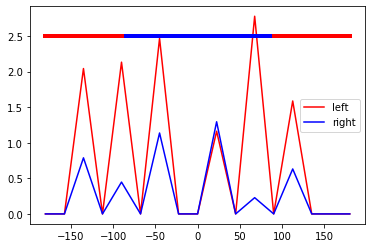

In [66]:
bins=17
x_histo = np.linspace(-180,180,bins) 

dist_d = np.max(np.array(RFs_full)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==1], axis=1)-np.array(RF_means)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==1] # relative impact of tuning curve
histo_d = np.zeros(bins)

# left neurons
for idx, m in enumerate(np.array(pref_dir)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==1]):
    for i in range(len(x_histo)-1):
        if x_histo[i]<m<x_histo[i+1]:
            histo_d[i]+=dist_d[idx]

#right neurons
dist_d_right = np.max(np.array(RFs_full)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==1], axis=1)-np.array(RF_means)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==1]
histo_d_right = np.zeros(bins)
for idx, m in enumerate(np.array(pref_dir)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==1]):
    for i in range(len(x_histo)-1):
        if x_histo[i]<m<x_histo[i+1]:
            histo_d_right[i]+=dist_d_right[idx]
            
plt.figure()
plt.plot(x_histo,histo_d, color='red', label='left')
plt.plot(x_histo,histo_d_right, color='b', label='right')
plt.plot([-90,90],[2.5,2.5], color='b', linewidth=4)
plt.plot([-180,-90],[2.5,2.5], color='red', linewidth=4)
plt.plot([90,180],[2.5,2.5], color='red', linewidth=4)
plt.legend()
plt.show()

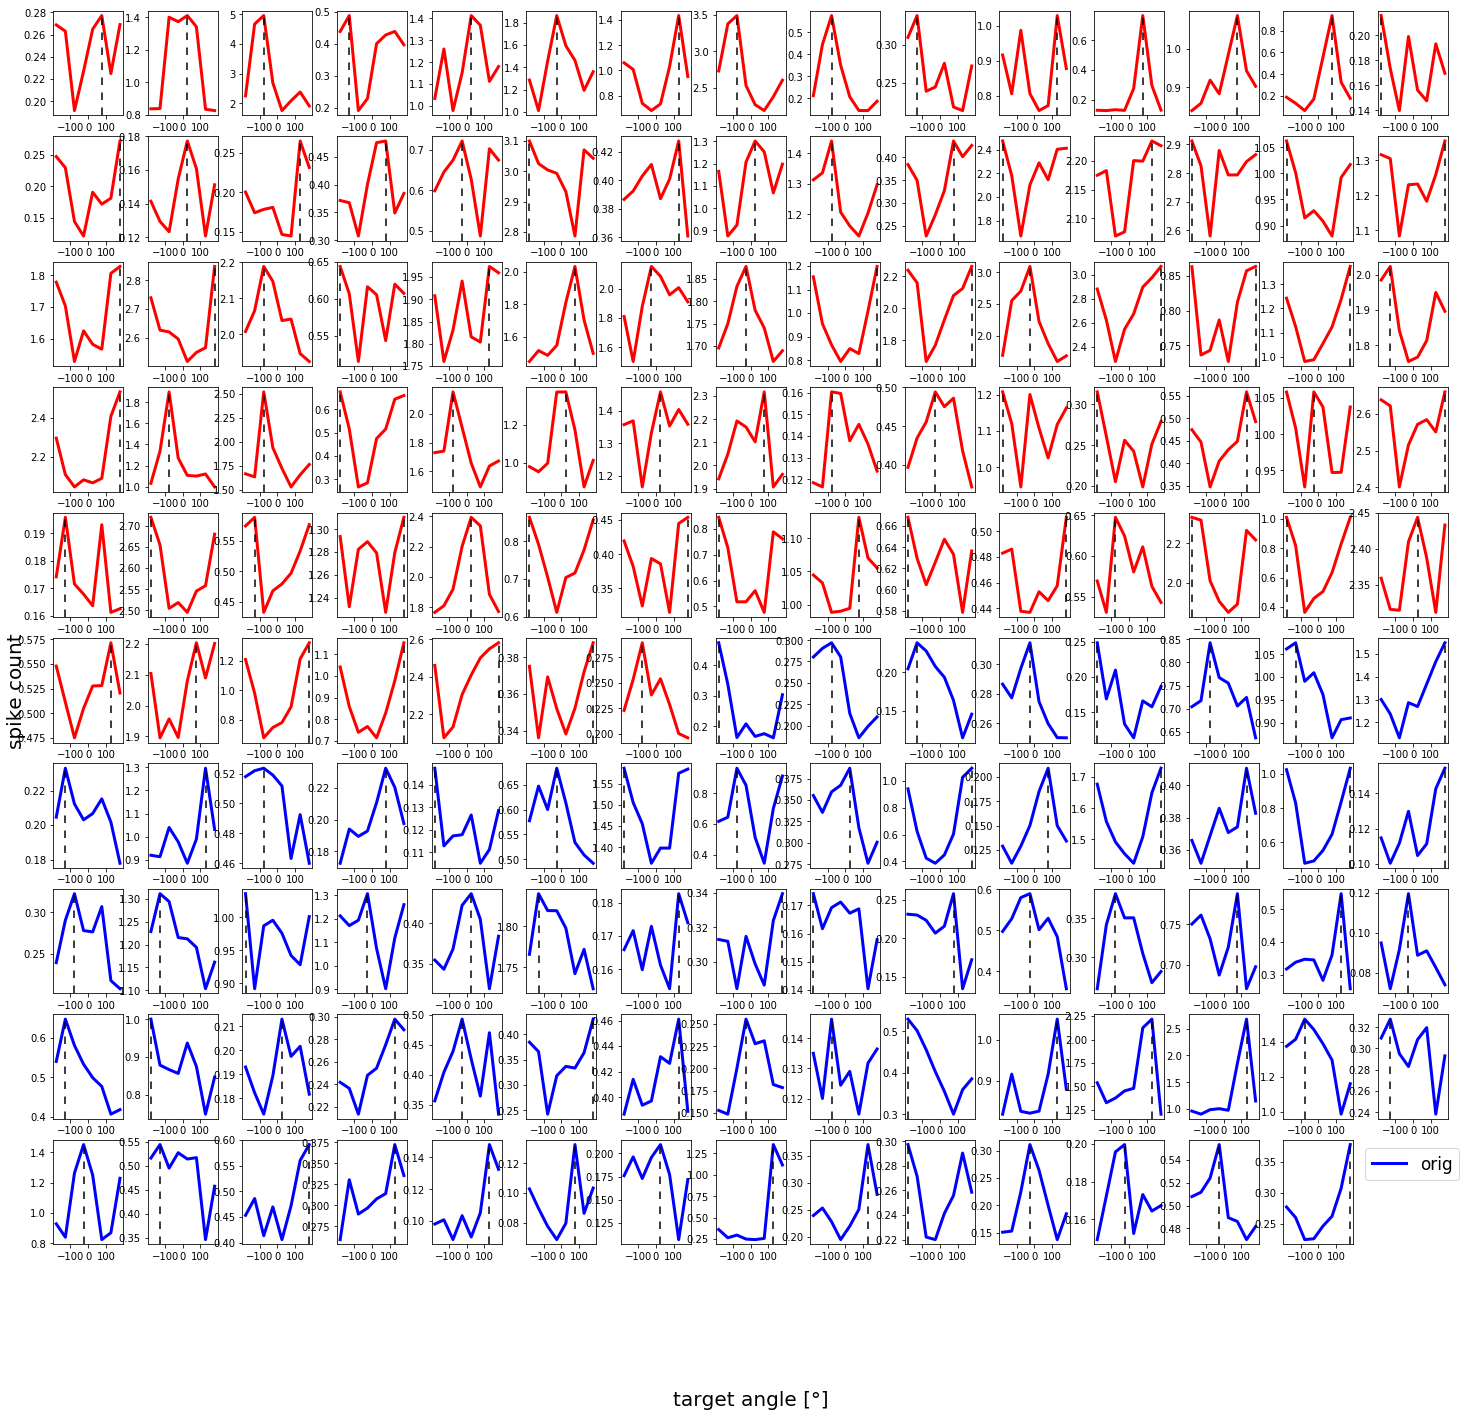

In [67]:
X_delay=pd.DataFrame([np.mean(df_serial['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(df_serial['bin_sp_prev']))])
#X_delay=pd.DataFrame([df_serial['bin_sp_prev'][n][110] for n in df_serial.index])
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_delay)
X_delay_norm = pd.DataFrame(d, columns=X_delay.columns)
X_delay_mean = pd.DataFrame(np.array([X_delay.loc[:,n]/np.mean(X_delay.loc[:,n]) for n in X_delay.columns]).T)
X_delay_min = pd.DataFrame(np.array([X_delay.loc[:,n]-np.min(X_delay.loc[:,n]) for n in X_delay.columns]).T)
    
X_response=pd.DataFrame([np.mean(df_serial['bin_sp_prev'][n][borders_full[7]:borders_full[8]], axis=0) for n in range(len(df_serial['bin_sp_prev']))])
y = np.array([complex(df_serial['target_prev_xy'][i][0],df_serial['target_prev_xy'][i][1]) for i in df_serial.index])
RF_all=[]
RF_means=[]
pref_dir=[]
#plt.subplots(11,15,figsize=(15,15), sharey=True)

fig=plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.2,wspace=0.35)
for n in X_delay.columns:
    RF=[]
    RF_mean=[]
    RF_norm=[]
    RF_min=[]
    for k in np.unique(np.angle(y)):
        RF.append(np.mean(X_delay.loc[np.where(np.angle(y)==k)][n]))
        #RF_mean.append(np.mean(X_delay_mean.loc[np.where(np.angle(y)==k)][n]))
        #RF_norm.append(np.mean(X_delay_norm.loc[np.where(np.angle(y)==k)][n]))
        #RF_min.append(np.mean(X_delay_min.loc[np.where(np.angle(y)==k)][n]))
    #pref_dir.append(np.angle(y[np.where(X_delay.loc[n] == max(X_delay.loc[n]))[0]])[0]*180/np.pi)
    RF_means.append(np.mean(RF))
    xRF=np.linspace(-180,180,len(np.unique(np.angle(y))))
    pref_dir.append(xRF[np.where(RF==max(RF))[0][0]])
    if left_idx[df_Sa0_monkey][df_Sa0_sess][0][n] == 1:
        color='red'
    else:
        color='blue'
        
    #RF = RF/(np.mean(X_delay.loc[:,n]))
    plt.subplot(11,15,n+1)
    plt.plot(xRF,RF, label='orig', color=color, linewidth=3)
    plt.axvline(xRF[np.where(RF==max(RF))[0][0]], color='k', dashes=[5,5])
    #plt.plot(xRF,RF_mean, label='mean', color='darkorange', linewidth=4)#, color='deeppink'
    #plt.plot(xRF,RF_norm, label='norm',color='#006d77', linewidth=4)#, color='forestgreen'
    #plt.plot(xRF,RF_min, label='min', color='red', linewidth=3)
    #plt.ylim([0,5])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=17)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('target angle [°]', fontsize=20)
plt.ylabel('spike count', fontsize=20)
#plt.savefig('../Figures/Neural/ReceptiveFields/RF_ShareY_CompareMeanNormReal_DelayDecoder_Sa0.png', dpi=100, bbox_inches='tight')
plt.show()

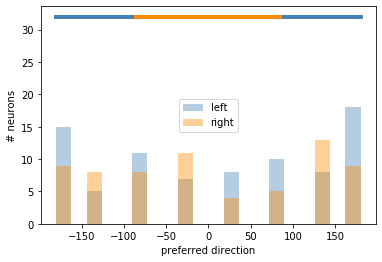

In [68]:
plt.figure()
#plt.hist(pref_dir, alpha=0.4, bins=20, label='all')
plt.hist(np.array(pref_dir)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==True], alpha=0.4, bins=20, color='steelblue', label='left')
plt.hist(np.array(pref_dir)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==True], alpha=0.4, bins=20, color='darkorange', label='right')
plt.plot([-90,90],[32,32], color='darkorange', linewidth=4)
plt.plot([-180,-90],[32,32], color='steelblue', linewidth=4)
plt.plot([90,180],[32,32], color='steelblue', linewidth=4)
plt.xlabel('preferred direction')
plt.ylabel('# neurons')
plt.legend()
#plt.savefig('../Figures/Neural/ReceptiveFields/RF_MeanFiringNeurons.png', dpi=100, bbox_inches='tight')
plt.show()

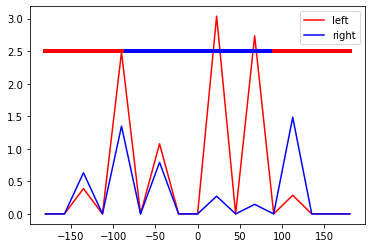

In [69]:
bins=17
x_histo = np.linspace(-180,180,bins) 

dist_d = np.max(np.array(RFs_full)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==1], axis=1)-np.array(RF_means)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==1] # relative impact of tuning curve
histo_d = np.zeros(bins)

# left neurons
for idx, m in enumerate(np.array(pref_dir)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==1]):
    for i in range(len(x_histo)-1):
        if x_histo[i]<m<x_histo[i+1]:
            histo_d[i]+=dist_d[idx]

#right neurons
dist_d_right = np.max(np.array(RFs_full)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==1], axis=1)-np.array(RF_means)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==1]
histo_d_right = np.zeros(bins)
for idx, m in enumerate(np.array(pref_dir)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==1]):
    for i in range(len(x_histo)-1):
        if x_histo[i]<m<x_histo[i+1]:
            histo_d_right[i]+=dist_d_right[idx]
            
plt.figure()
plt.plot(x_histo,histo_d, color='red', label='left')
plt.plot(x_histo,histo_d_right, color='b', label='right')
plt.plot([-90,90],[2.5,2.5], color='b', linewidth=4)
plt.plot([-180,-90],[2.5,2.5], color='red', linewidth=4)
plt.plot([90,180],[2.5,2.5], color='red', linewidth=4)
plt.legend()
plt.show()

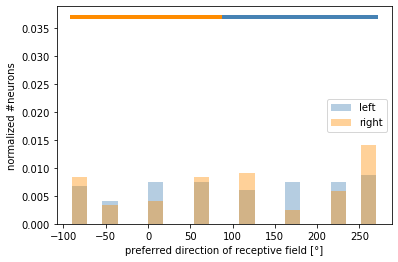

In [29]:
plt.hist(np.array(pref_dir)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==True]+90, alpha=0.4, bins=20, density=True, color='steelblue', label='left')
plt.hist(np.array(pref_dir)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==True]+90, alpha=0.4, bins=20, density=True, color='darkorange', label='right')
plt.plot([-90,90],[0.037,0.037], color='darkorange', linewidth=4)
plt.plot([90,270],[0.037,0.037], color='steelblue', linewidth=4)
plt.xlabel('preferred direction of receptive field [°]')
plt.ylabel('normalized #neurons')
plt.legend()
#plt.savefig('../Figures/Neural/ReceptiveFields/RF_PrefDirectionNeurons.png', dpi=100, bbox_inches='tight')
plt.show()

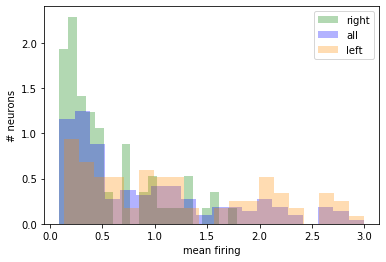

In [196]:
plt.figure()
plt.hist(np.array(RF_means)[right_idx[df_Sa0_monkey][df_Sa0_sess][0]==True], alpha=0.3, bins=20, density=True, color='green', label='right')
plt.hist(RF_means, alpha=0.3, bins=20, density=True, color='blue', label='all')
plt.hist(np.array(RF_means)[left_idx[df_Sa0_monkey][df_Sa0_sess][0]==True], alpha=0.3, bins=20, density=True, color='darkorange', label='left')
plt.xlabel('mean firing')
plt.ylabel('# neurons')
plt.legend()
#plt.savefig('../Figures/Neural/ReceptiveFields/RF_MeanFiringNeurons.png', dpi=100, bbox_inches='tight')
plt.show()

### -> watch out not all timepoints have same number of trials (since we are not including trials on y-axis)

# Separate Complex Decoders

In [35]:
label_delay = 'delay'
label_response = 'ITI'
mode = 'MSE hemispheres'#'r2'#'MSE'#
#baseline_file = "../Results/baseline_shuffleAlphaTest1000_SeparateDecoders_Sa0.h5"#baseline_IpsiContra_allMonkeys.h5"
baseline_file = "../Results/baselineComplexSeparateIpsiContraDecoder_shuffleAlphaTest1000_Sa1.h5"#baseline_IpsiContra_allMonkeys.h5"


hemisphere_baseline,hemisphere_baseline_dist = read_baseline(baseline_file, df_Sa0_monkey, df_Sa0_sess, mode)

In [36]:
df_serial_left_ipsi = df_serial_left.loc[targ_left].reset_index()#
df_serial_left_contra = df_serial_left.loc[targ_right].reset_index()


In [44]:
#ipsilateral:
label_ipsi = 'ipsi'

acc_bias_prev_delay_leftIpsi,std_bias_prev_delay_leftIpsi,\
acc_bias_curr_delay_leftIpsi,std_bias_curr_delay_leftIpsi,\
acc_bias_prev_response_leftIpsi,std_bias_prev_response_leftIpsi,\
acc_bias_curr_response_leftIpsi,std_bias_curr_response_leftIpsi,\
acc_bias_prev_delay_leftIpsi_dist,std_bias_prev_delay_leftIpsi_dist,\
acc_bias_curr_delay_leftIpsi_dist,std_bias_curr_delay_leftIpsi_dist,\
acc_bias_prev_response_leftIpsi_dist,std_bias_prev_response_leftIpsi_dist,\
acc_bias_curr_response_leftIpsi_dist,std_bias_curr_response_leftIpsi_dist,\
weights_delay_leftIpsi, weights_response_leftIpsi= decoder_complex_delayVSresponse(df_serial_left_ipsi, borders_full)


#contralateral:

acc_bias_prev_delay_leftContra,std_bias_prev_delay_leftContra,\
acc_bias_curr_delay_leftContra,std_bias_curr_delay_leftContra,\
acc_bias_prev_response_leftContra,std_bias_prev_response_leftContra,\
acc_bias_curr_response_leftContra,std_bias_curr_response_leftContra,\
acc_bias_prev_delay_leftContra_dist,std_bias_prev_delay_leftContra_dist,\
acc_bias_curr_delay_leftContra_dist,std_bias_curr_delay_leftContra_dist,\
acc_bias_prev_response_leftContra_dist,std_bias_prev_response_leftContra_dist,\
acc_bias_curr_response_leftContra_dist,std_bias_curr_response_leftContra_dist,\
weights_delay_leftContra, weights_response_leftContra= decoder_complex_delayVSresponse(df_serial_left_contra, borders_full)
label_contra='contra'


(array([ 6.,  9., 12.,  7.,  9.,  9.,  8.,  7.,  8.,  7.]),
 array([-2.17920477, -1.70200401, -1.22480325, -0.7476025 , -0.27040174,
         0.20679902,  0.68399978,  1.16120054,  1.6384013 ,  2.11560206,
         2.59280282]),
 <a list of 10 Patch objects>)

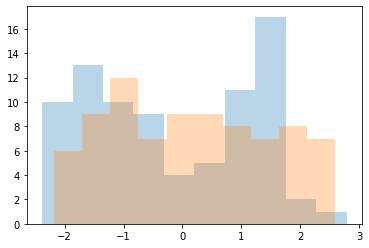

In [67]:
plt.hist(np.mean(np.angle(weights_delay_leftIpsi), axis=0), alpha=0.3)
plt.hist(np.mean(np.angle(weights_delay_leftContra), axis=0), alpha=0.3)

In [46]:
# subtract baseline
acc_bias_prev_delay_leftIpsi = acc_bias_prev_delay_leftIpsi-hemisphere_baseline['acc_prev_c'] 
acc_bias_prev_response_leftIpsi = acc_bias_prev_response_leftIpsi-hemisphere_baseline['acc_prev_cr']
acc_bias_prev_delay_leftContra = acc_bias_prev_delay_leftContra-hemisphere_baseline['acc_prev'] 
acc_bias_prev_response_leftContra = acc_bias_prev_response_leftContra-hemisphere_baseline['acc_prev_r']
acc_bias_curr_delay_leftIpsi = acc_bias_curr_delay_leftIpsi-hemisphere_baseline['acc_curr_c'] 
acc_bias_curr_response_leftIpsi = acc_bias_curr_response_leftIpsi-hemisphere_baseline['acc_curr_cr']
acc_bias_curr_delay_leftContra = acc_bias_curr_delay_leftContra-hemisphere_baseline['acc_curr'] 
acc_bias_curr_response_leftContra = acc_bias_curr_response_leftContra-hemisphere_baseline['acc_curr_r']

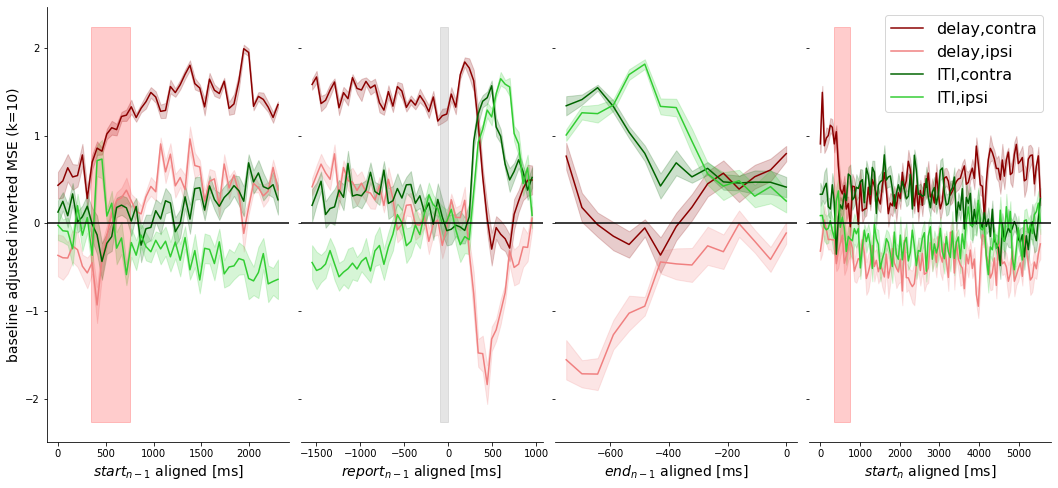

In [47]:
label_delay_ipsi='delay,ipsi'
label_response_ipsi='ITI,ipsi'
label_delay_contra='delay,contra'
label_response_contra='ITI,contra'
mode='MSE'

plot_hemispheres_delayVSresponse(acc_bias_prev_delay_leftIpsi, std_bias_prev_delay_leftIpsi,\
                               acc_bias_curr_delay_leftIpsi, std_bias_curr_delay_leftIpsi, label_delay_ipsi,\
                                 acc_bias_prev_response_leftIpsi, std_bias_prev_response_leftIpsi,\
                               acc_bias_curr_response_leftIpsi, std_bias_curr_response_leftIpsi,label_response_ipsi,\
                                 acc_bias_prev_delay_leftContra, std_bias_prev_delay_leftContra,\
                               acc_bias_curr_delay_leftContra, std_bias_curr_delay_leftContra, label_delay_contra,\
                                 acc_bias_prev_response_leftContra, std_bias_prev_response_leftContra,\
                               acc_bias_curr_response_leftContra, std_bias_curr_response_leftContra,label_response_contra,\
                                 borders, borders_pastdelay, mode, hemisphere_baseline)

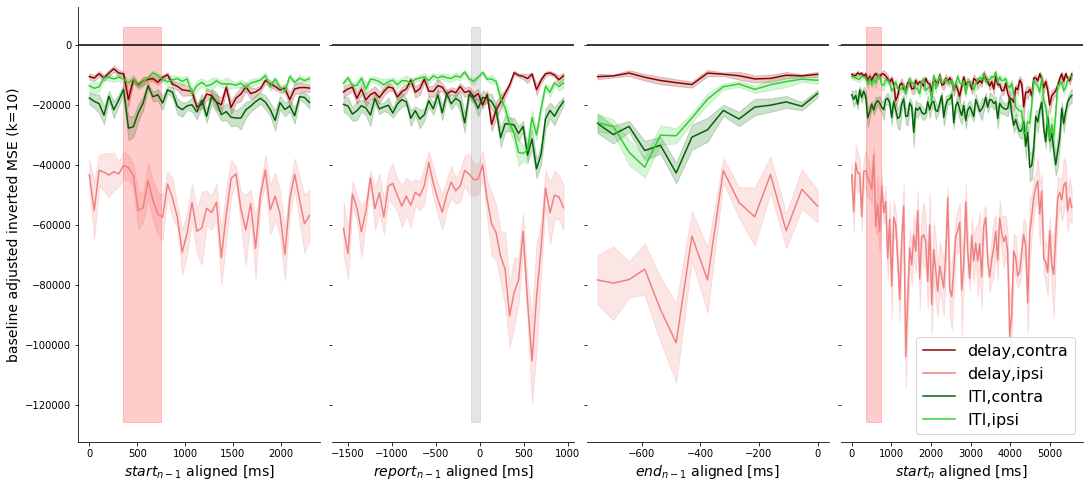

In [40]:
label_delay_ipsi='delay,ipsi'
label_response_ipsi='ITI,ipsi'
label_delay_contra='delay,contra'
label_response_contra='ITI,contra'
mode='MSE'

plot_hemispheres_delayVSresponse(acc_bias_prev_delay_leftIpsi_dist, std_bias_prev_delay_leftIpsi_dist,\
                               acc_bias_curr_delay_leftIpsi_dist, std_bias_curr_delay_leftIpsi_dist, label_delay_ipsi,\
                                 acc_bias_prev_response_leftIpsi_dist, std_bias_prev_response_leftIpsi_dist,\
                               acc_bias_curr_response_leftIpsi_dist, std_bias_curr_response_leftIpsi_dist,label_response_ipsi,\
                                 acc_bias_prev_delay_leftContra_dist, std_bias_prev_delay_leftContra_dist,\
                               acc_bias_curr_delay_leftContra_dist, std_bias_curr_delay_leftContra_dist, label_delay_contra,\
                                 acc_bias_prev_response_leftContra_dist, std_bias_prev_response_leftContra_dist,\
                               acc_bias_curr_response_leftContra_dist, std_bias_curr_response_leftContra_dist,label_response_contra,\
                                 borders, borders_pastdelay, mode, hemisphere_baseline)

# Determine high/low decoding reactivations to predict serial dependence

In [138]:
mode='MSE'
acc_reactivations_singletrial,\
acc_reactivations_singletrial_dist = decode_complex_reactivations(df_serial,borders_full,mode)

acc_reactivations_singletrial = np.array(acc_reactivations_singletrial)
acc_reactivations_singletrial = np.concatenate(acc_reactivations_singletrial, axis=1)

acc_reactivations_singletrial_dist = np.array(acc_reactivations_singletrial_dist)
acc_reactivations_singletrial_dist = np.concatenate(acc_reactivations_singletrial_dist, axis=1)


In [139]:
# use target-prediction difference average across trial start until stimulus start, convert to °
trial2_start = borders_full[3]-borders_full[2]
# start at fixation start
react_start = -(trial2_start+int(200/bins))# go back 100ms in time before stimulus start
# end 100ms after stimulus start
react_end = -(trial2_start-int(200/bins))# go until 100ms in time after stimulus start

acc_react_single_avg = np.min(abs(acc_reactivations_singletrial[:, react_start:react_end]), axis=1)
acc_react_single_avg_dist = np.min(abs(acc_reactivations_singletrial_dist[:, react_start:react_end]), axis=1)

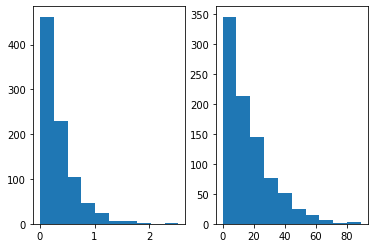

In [84]:
plt.figure()
plt.subplot(121)
plt.hist(acc_react_single_avg)
plt.subplot(122)
plt.hist(acc_react_single_avg_dist)
plt.show()

In [85]:
print(np.median(acc_react_single_avg))
print(np.median(acc_react_single_avg_dist))

0.2423003989586703
12.32409640608509


In [86]:
# split into high VS low decoding
cut = np.median(abs(acc_react_single_avg))

high_decoding_idx = np.where(acc_react_single_avg<cut)[0]
low_decoding_idx = np.where(acc_react_single_avg>cut)[0]

cut_dist = np.median(abs(acc_react_single_avg_dist))

high_decoding_idx_dist = np.where(acc_react_single_avg_dist<cut_dist)[0]
low_decoding_idx_dist = np.where(acc_react_single_avg_dist>cut_dist)[0]

In [87]:
label_delay = 'delay'
label_response = 'ITI'
mode = 'MSE'#'r2'#'MSE'#
baseline_file = "../Results/baselineAcc_ResponseDelay_AllMonkeys.h5"
baseline = read_baseline(baseline_file, df_Sa0_monkey, df_Sa0_sess, mode)

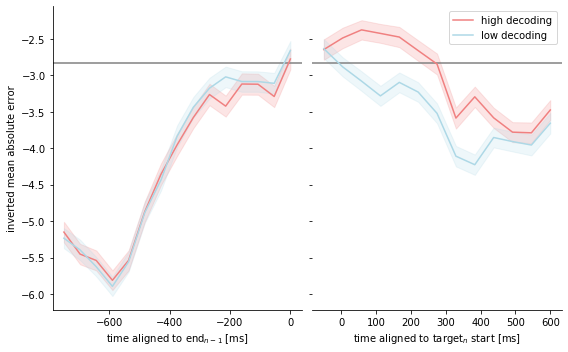

In [90]:
plot_reactivations(acc_reactivations_singletrial, high_decoding_idx, low_decoding_idx, borders_full, baseline)

-1.5196737600920769


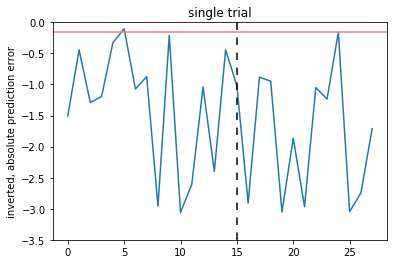

In [111]:
trial=7
plt.plot(abs(acc_reactivations_singletrial[trial,:])*(-1))
plt.axhline(max(abs(acc_reactivations_singletrial[trial, (borders_full[9]-borders_full[8]-5):])*(-1)), color='lightcoral')
plt.axvline(borders_full[9]-borders_full[8], dashes=[5,5], color='k')# end of prev trial
plt.ylim([-3.5,-0])
plt.ylabel('inverted, absolute prediction error')
plt.title('single trial')
print(max(abs(acc_reactivations_singletrial[trial, (borders_full[8]-borders_full[7]-5):]))*(-1)-np.mean(abs(acc_reactivations_singletrial)*(-1), axis=1)[trial]) 

## calculate serial dependence based on high/low decoding

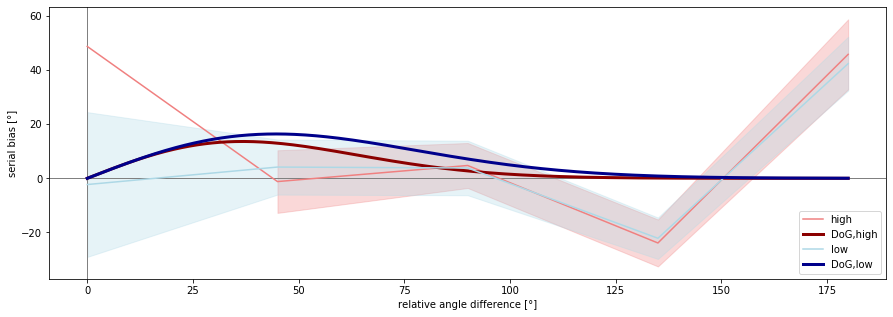

Ttest_indResult(statistic=-0.4231597592433776, pvalue=0.6724594406498425)


In [34]:
ttest_single, ttest = serialbias_highVSlow(df_serial.loc[high_decoding_idx], df_serial.loc[low_decoding_idx], 'high', 'low')

## Serial dependence on high/low reactivations for ALL monkeys 

In [30]:
# accuracy (MSE) sorted by monkey from borders[7] prev trial to borders[2] curr trial
#acc_react_all, borders_all = read_reactivations_AllMonkeys('../Results/reactivationStrength2cue_AllMonkeys.h5', df_dat, 'single')
acc_react_all, acc_react_all_dist, borders_all = read_reactivations_AllMonkeys('../Results/reactivations/ComplexReactivationStrength_AllMonkeys.h5', df_dat, 'single')



<KeysViewHDF5 ['Sa0', 'Sa0_borders', 'Sa0_dist', 'Sa1', 'Sa10', 'Sa10_borders', 'Sa10_dist', 'Sa11', 'Sa11_borders', 'Sa11_dist', 'Sa12', 'Sa12_borders', 'Sa12_dist', 'Sa13', 'Sa13_borders', 'Sa13_dist', 'Sa14', 'Sa14_borders', 'Sa14_dist', 'Sa15', 'Sa15_borders', 'Sa15_dist', 'Sa1_borders', 'Sa1_dist', 'Sa2', 'Sa2_borders', 'Sa2_dist', 'Sa3', 'Sa3_borders', 'Sa3_dist', 'Sa4', 'Sa4_borders', 'Sa4_dist', 'Sa5', 'Sa5_borders', 'Sa5_dist', 'Sa6', 'Sa6_borders', 'Sa6_dist', 'Sa7', 'Sa7_borders', 'Sa7_dist', 'Sa8', 'Sa8_borders', 'Sa8_dist', 'Sa9', 'Sa9_borders', 'Sa9_dist']>
<HDF5 dataset "Sa0": shape (327, 28), type "<f8">
<HDF5 dataset "Sa0_dist": shape (327, 28), type "<f8">
<HDF5 dataset "Sa0_borders": shape (10,), type "<i8">
<HDF5 dataset "Sa1": shape (588, 30), type "<f8">
<HDF5 dataset "Sa1_dist": shape (588, 30), type "<f8">
<HDF5 dataset "Sa1_borders": shape (10,), type "<i8">
<HDF5 dataset "Sa2": shape (524, 29), type "<f8">
<HDF5 dataset "Sa2_dist": shape (524, 29), type "<f8">

In [35]:
min_len = min([[(borders_all[mono][sess][2]-borders_all[mono][sess][1])+(borders_all[mono][sess][9]-borders_all[mono][sess][8]) for sess in range(len(borders_all[mono]))] for mono in list(borders_all.keys())])[0]
trial2_start = min([[borders_all[mono][sess][3]-borders_all[mono][sess][2] for sess in range(len(borders_all[mono]))] for mono in list(borders_all.keys())])[0]

# start at fixation start
react_start = -(trial2_start+int(100/bins))# go back 100ms in time before stimulus start
# end 100ms after stimulus start
react_end = -(trial2_start-int(50/bins))# go until 100ms in time after stimulus start

high_decoding_idx_single, low_decoding_idx_single, \
high_decoding_idx_full, low_decoding_idx_full, \
high_trials,low_trials = determine_HighLowTrials(df_dat, acc_react_all, react_start, react_end)

#radius
high_decoding_idx_single_dist, low_decoding_idx_single_dist, \
high_decoding_idx_full_dist, low_decoding_idx_full_dist_dist, \
high_trials_dist,low_trials_dist = determine_HighLowTrials(df_dat, acc_react_all_dist, react_start, react_end)

IndexError: too many indices for array

In [30]:
# create list with values needed for serial bias calculation (ONLY if two trials are in a row)
# no need to extra specify sessions, trial_id changes from large # to small #
serial_all = {'trial_id':[], 'target_prev': [], 'response_prev': [], 'delay_prev': [], 'target_curr': [], 'response_curr': [], 'delay_curr': [], 'monkey': [], 'session':[]}
for idx in df_dat.index[:-1]:
    if ((df_dat['trial_id'][idx]+1) == (df_dat['trial_id'][idx+1])):
        serial_all['trial_id'].append(idx)
        serial_all['target_prev'].append(df_dat['targ_angle'][idx]*np.pi/180)
        serial_all['response_prev'].append(df_dat['saccade_angle'][idx]*np.pi/180)
        serial_all['delay_prev'].append(df_dat['go_cue'][idx]-df_dat['targ_off'][idx])
        serial_all['target_curr'].append(df_dat['targ_angle'][idx+1]*np.pi/180)
        serial_all['response_curr'].append(df_dat['saccade_angle'][idx+1]*np.pi/180)
        serial_all['delay_curr'].append(df_dat['go_cue'][idx+1]-df_dat['targ_off'][idx+1]) 
        serial_all['monkey'].append(df_dat['monkey'][idx])
        serial_all['session'].append(df_dat['session'][idx])

df_serial_all = pd.DataFrame(serial_all)

# Compute serial dependence
rel_loc_all, err_all = calc_errorcurve(df_serial_all)
        
sb_all = {'rel_loc': rel_loc_all*180/np.pi, 'err': err_all*180/np.pi, 'delay_prev': serial_all['delay_prev'],\
      'delay_curr': serial_all['delay_curr'], 'monkey': serial_all['monkey']}
df_sb_all = pd.DataFrame(sb_all)

sb_onesided_all = {'rel_loc': rel_loc_all*180/np.pi*np.sign(rel_loc_all),\
               'err': np.array([err_all[i]*180/np.pi*np.sign(rel_loc_all[i]) if rel_loc_all[i] !=0 else err_all[i]*180/np.pi for i in range(len(rel_loc_all))]),\
               'delay_prev': serial_all['delay_prev'], 'delay_curr': serial_all['delay_curr'], 'monkey': serial_all['monkey']}
df_sb_onesided_all = pd.DataFrame(sb_onesided_all)



single session reactivation time course

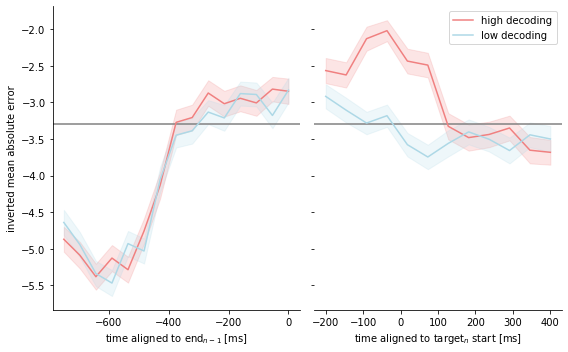

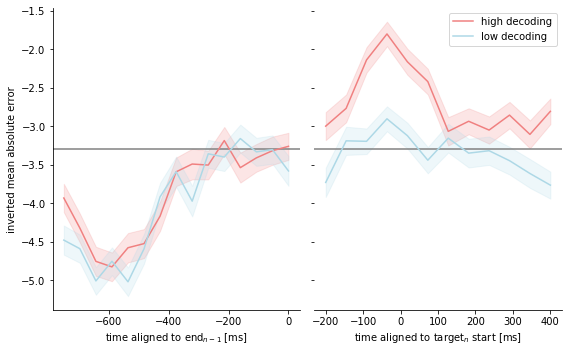

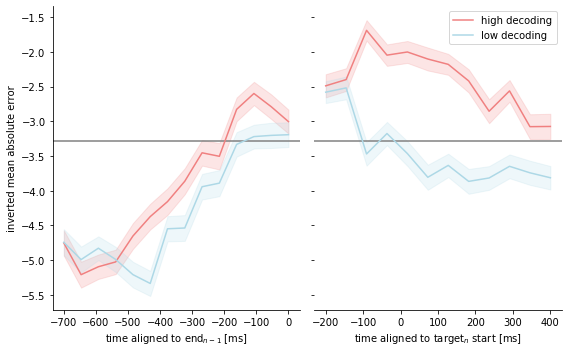

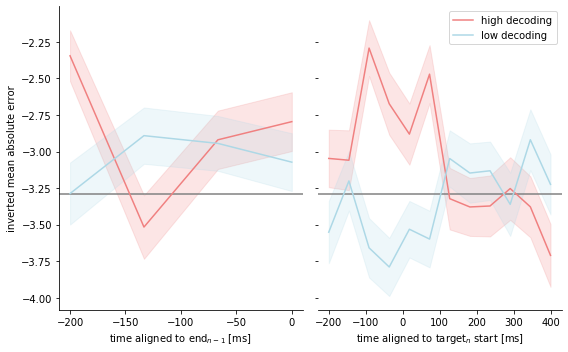

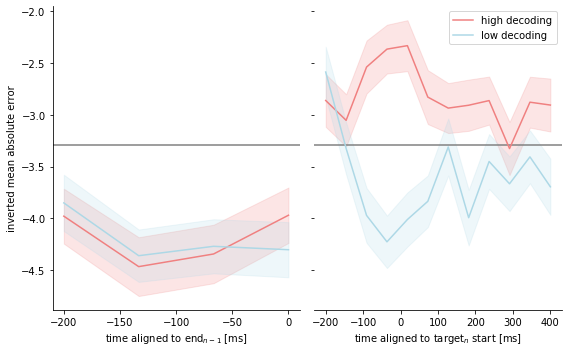

In [84]:
hep=0
#plt.figure()
for mono in ['Sa', 'Pe', 'Wa']:
    for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
        # borders differ across sessions
        plot_reactivations(acc_react_all[mono][sess], high_decoding_idx_single[hep].astype(int),\
                           low_decoding_idx_single[hep].astype(int), borders_all[mono][sess], baseline)
        hep+=1

In [ ]:
hep=0
#plt.figure()
for mono in ['Sa', 'Pe', 'Wa']:
    for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
        # borders differ across sessions
        plot_reactivations(acc_react_all_dist[mono][sess], high_decoding_idx_single_dist[hep].astype(int),\
                           low_decoding_idx_single_dist[hep].astype(int), borders_all[mono][sess], baseline)
        hep+=1

In [85]:
# combine borders for all sessions, trials
borders_append = np.concatenate([[borders_all[mono][sess] for sess in range(len(borders_all[mono]))] for mono in borders_all.keys()]) 
min_trial_end = min(borders_append[:,8]-borders_append[:,7])
min_fix = min(borders_append[:,1]-borders_append[:,0])

In [86]:
high_trials_concat = [high_trials[mono][sess] for sess in range(len(high_trials[mono])) for mono in high_trials.keys()]

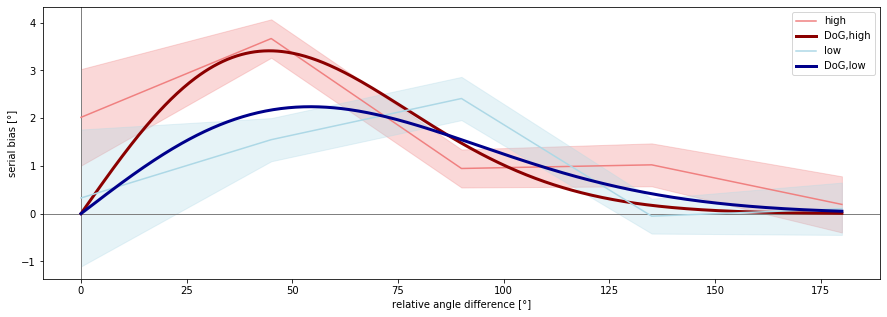

Ttest_indResult(statistic=1.8727196671777036, pvalue=0.06128317803297232)


In [87]:
high = np.concatenate(high_decoding_idx_full[0:16])# 0:3 = Sa
low = np.concatenate(low_decoding_idx_full[0:16])# 0:3 = Sa

ttest_single, ttest = serialbias_highVSlow(df_serial_all.loc[high], df_serial_all.loc[low], 'high', 'low')

In [ ]:
high = np.concatenate(high_decoding_idx_full_dist[0:16])# 0:3 = Sa
low = np.concatenate(low_decoding_idx_full_dist[0:16])# 0:3 = Sa

ttest_single, ttest = serialbias_highVSlow(df_serial_all.loc[high], df_serial_all.loc[low], 'high', 'low')

# Serial depedence on high/low, ipsi vs contra

In [31]:
# accuracy (MSE) sorted by monkey
acc_react_all_IC, _ = read_reactivations_AllMonkeys('../Results/reactivationStrength_AllMonkeys_IpsiContra_0top.h5', df_dat, 'hemispheres')
#reactivationStrength2cue_AllMonkeys_IpsiContra_noBorderTrials.h5

<HDF5 dataset "Sa0_leftIpsi": shape (288, 27), type "<f8">
<HDF5 dataset "Sa0_leftContra": shape (300, 27), type "<f8">
<HDF5 dataset "Sa0_rightIpsi": shape (300, 27), type "<f8">
<HDF5 dataset "Sa0_rightContra": shape (288, 27), type "<f8">
<HDF5 dataset "Sa1_leftIpsi": shape (257, 27), type "<f8">
<HDF5 dataset "Sa1_leftContra": shape (267, 27), type "<f8">
<HDF5 dataset "Sa1_rightIpsi": shape (267, 27), type "<f8">
<HDF5 dataset "Sa1_rightContra": shape (257, 27), type "<f8">
<HDF5 dataset "Sa2_leftIpsi": shape (200, 26), type "<f8">
<HDF5 dataset "Sa2_leftContra": shape (200, 26), type "<f8">
<HDF5 dataset "Sa2_rightIpsi": shape (200, 26), type "<f8">
<HDF5 dataset "Sa2_rightContra": shape (200, 26), type "<f8">
<HDF5 dataset "Pe0_leftIpsi": shape (180, 16), type "<f8">
<HDF5 dataset "Pe0_leftContra": shape (179, 16), type "<f8">
<HDF5 dataset "Pe0_rightIpsi": shape (179, 16), type "<f8">
<HDF5 dataset "Pe0_rightContra": shape (180, 16), type "<f8">
<HDF5 dataset "Wa0_leftIpsi": sh

In [32]:
# need to match what happens in calc_reactivationStrength_IpsiContra_AllMonkeys.py to produce results!!!!!
#targ_left = np.where((df_serial_all['target_prev']>0) & (df_serial_all['target_prev']<np.pi))[0]
#targ_right = np.where((df_serial_all['target_prev']>np.pi) & (df_serial_all['target_prev']<2*np.pi))[0]
compl_targ = np.array([complex(df_serial_all['target_prev_xy'][i][0],df_serial_all['target_prev_xy'][i][1]) for i in df_serial_all.index])
targ_left = np.where((np.angle(compl_targ)>np.pi/2) | (np.angle(compl_targ)<-np.pi/2-0.1))[0]
targ_right = np.where((np.angle(compl_targ)>-np.pi/2) & (np.angle(compl_targ)<np.pi/2))[0]

min_len = min([[(borders_all[mono][sess][2]-borders_all[mono][sess][0])+(borders_all[mono][sess][8]-borders_all[mono][sess][7]) for sess in range(len(borders_all[mono]))] for mono in list(borders_all.keys())])[0]
trial2_start = min([[borders_all[mono][sess][2]-borders_all[mono][sess][1] for sess in range(len(borders_all[mono]))] for mono in list(borders_all.keys())])[0]

# start at fixation start
react_start = -(trial2_start+int(50/bins))# go back 100ms in time before stimulus start
# end 100ms after stimulus start
react_end = -(trial2_start-int(100/bins))# go until 100ms in time after stimulus start

Decode high vs low decoding trials

In [33]:
acc_leftIpsi = {'Sa':acc_react_all_IC['Sa_leftIpsi'], 'Pe':acc_react_all_IC['Pe_leftIpsi'], 'Wa':acc_react_all_IC['Wa_leftIpsi']}
acc_leftContra = {'Sa':acc_react_all_IC['Sa_leftContra'], 'Pe':acc_react_all_IC['Pe_leftContra'], 'Wa':acc_react_all_IC['Wa_leftContra']}
acc_rightIpsi = {'Sa':acc_react_all_IC['Sa_rightIpsi'], 'Pe':acc_react_all_IC['Pe_rightIpsi'], 'Wa':acc_react_all_IC['Wa_rightIpsi']}
acc_rightContra = {'Sa':acc_react_all_IC['Sa_rightContra'], 'Pe':acc_react_all_IC['Pe_rightContra'], 'Wa':acc_react_all_IC['Wa_rightContra']}

high_decoding_idx_single_leftIpsi, low_decoding_idx_single_leftIpsi, \
high_decoding_idx_full_leftIpsi, low_decoding_idx_full_leftIpsi, \
high_trials,low_trials_leftIpsi = determine_HighLowTrials(df_dat, acc_leftIpsi, react_start, react_end)

high_decoding_idx_single_leftContra, low_decoding_idx_single_leftContra, \
high_decoding_idx_full_leftContra, low_decoding_idx_full_leftContra, \
high_trials,low_trials_leftContra = determine_HighLowTrials(df_dat, acc_leftContra, react_start, react_end)

high_decoding_idx_single_rightIpsi, low_decoding_idx_single_rightIpsi, \
high_decoding_idx_full_rightIpsi, low_decoding_idx_full_rightIpsi, \
high_trials,low_trials_rightIpsi = determine_HighLowTrials(df_dat, acc_rightIpsi, react_start, react_end)

high_decoding_idx_single_rightContra, low_decoding_idx_single_rightContra, \
high_decoding_idx_full_rightContra, low_decoding_idx_full_rightContra, \
high_trials,low_trials_rightContra = determine_HighLowTrials(df_dat, acc_rightContra, react_start, react_end)

### Ipsi

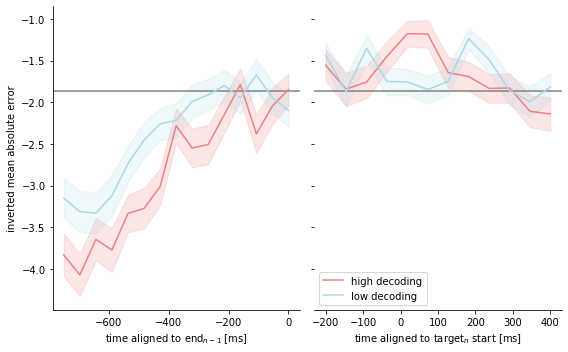

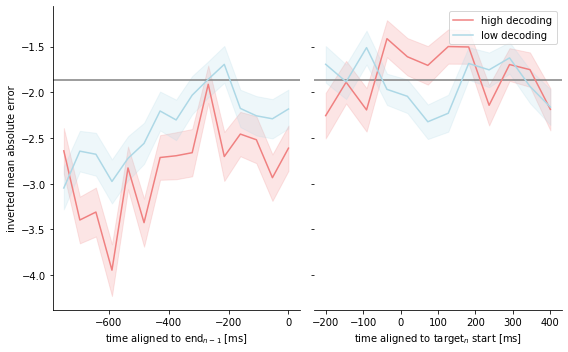

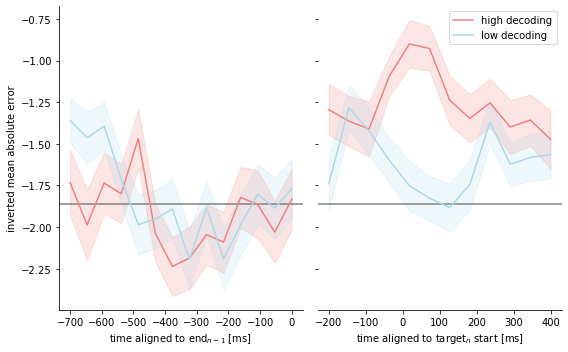

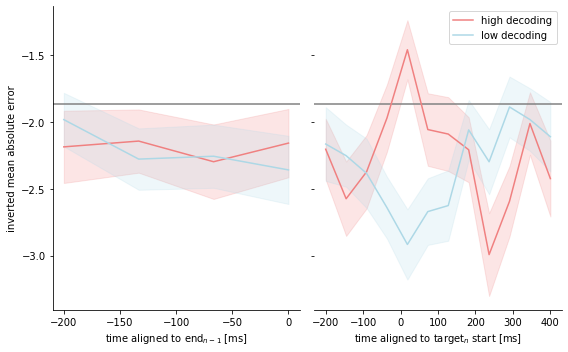

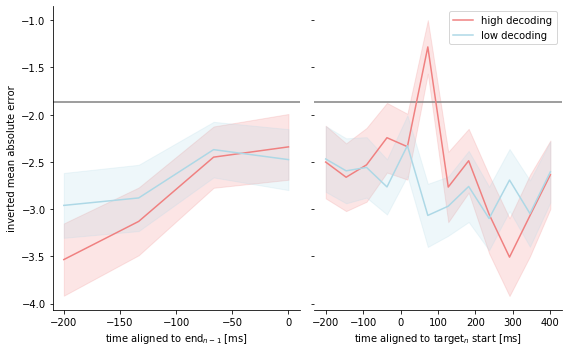

In [91]:
hep=0
#plt.figure()
for mono in ['Sa', 'Pe', 'Wa']:
    for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
        # borders differ across sessions
        plot_reactivations(acc_leftIpsi[mono][sess], high_decoding_idx_single_leftIpsi[hep].astype(int),\
                           low_decoding_idx_single_leftIpsi[hep].astype(int), borders_all[mono][sess], hemisphere_baseline)
        hep+=1

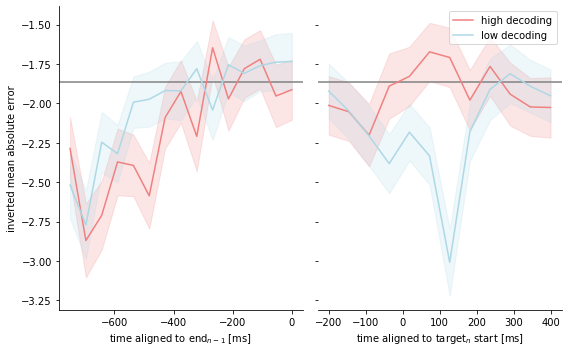

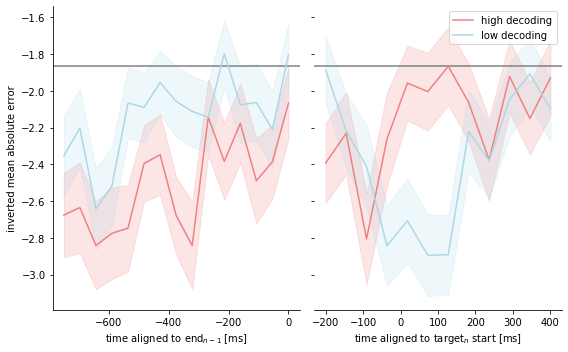

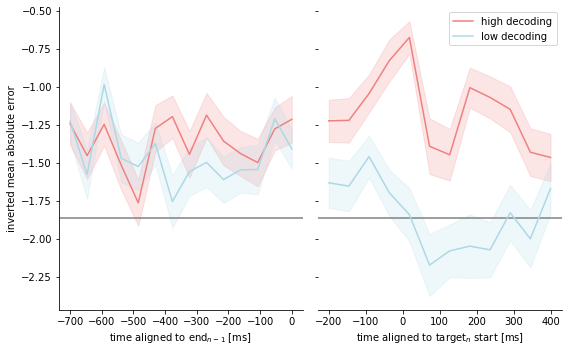

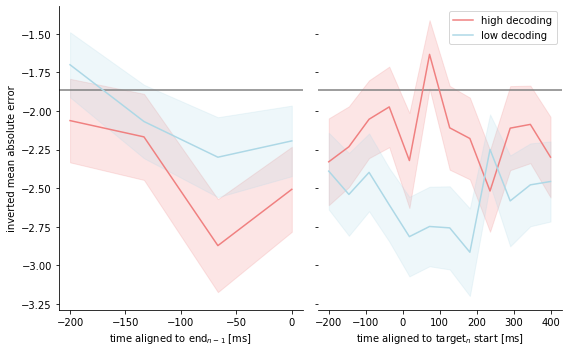

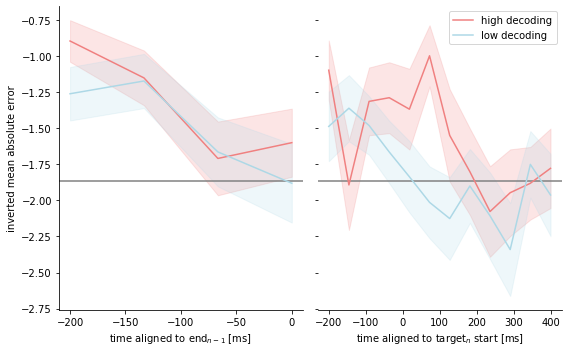

In [92]:
hep=0
#plt.figure()
for mono in ['Sa', 'Pe', 'Wa']:
    for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
        # borders differ across sessions
        plot_reactivations(acc_rightIpsi[mono][sess], high_decoding_idx_single_rightIpsi[hep].astype(int),\
                           low_decoding_idx_single_rightIpsi[hep].astype(int), borders_all[mono][sess], hemisphere_baseline)
        hep+=1

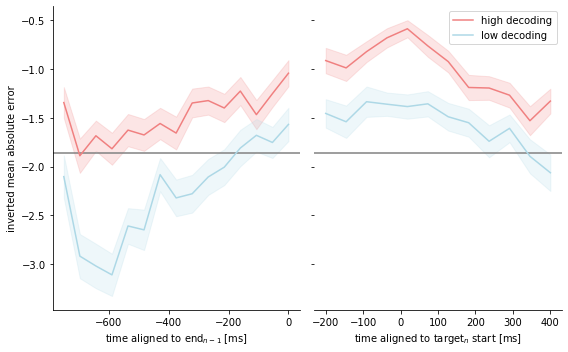

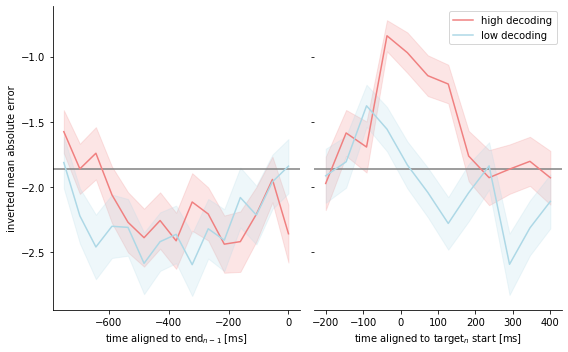

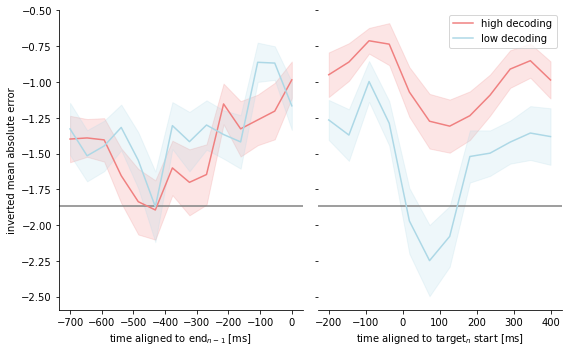

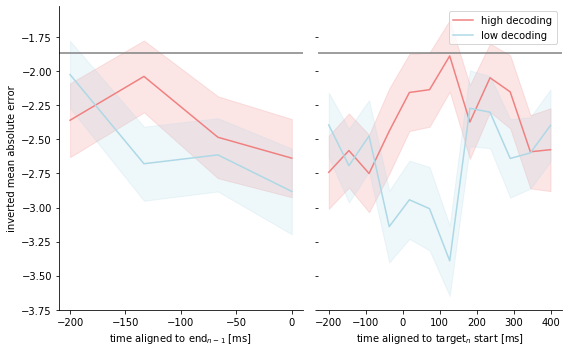

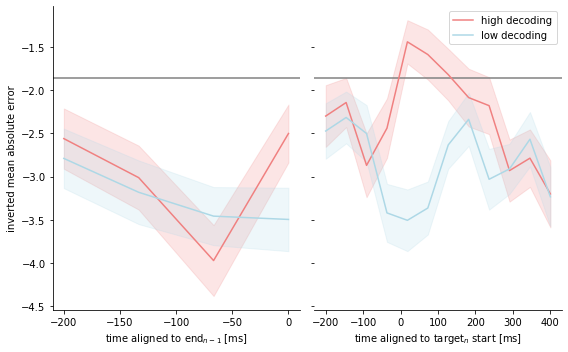

In [93]:
hep=0
#plt.figure()
for mono in ['Sa', 'Pe', 'Wa']:
    for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
        # borders differ across sessions
        plot_reactivations(acc_leftContra[mono][sess], high_decoding_idx_single_leftContra[hep].astype(int),\
                           low_decoding_idx_single_leftContra[hep].astype(int), borders_all[mono][sess], hemisphere_baseline)
        hep+=1

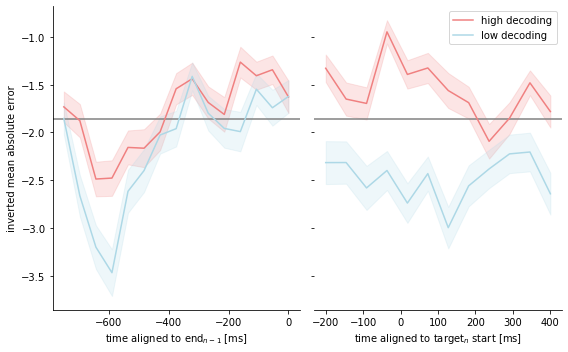

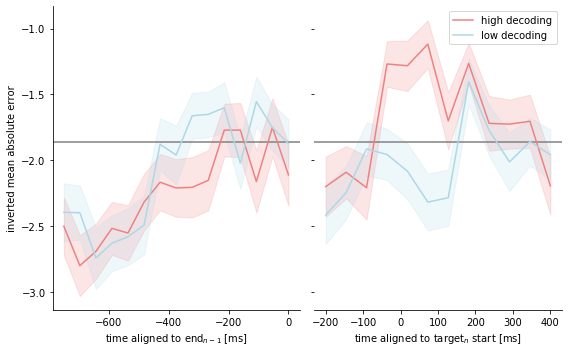

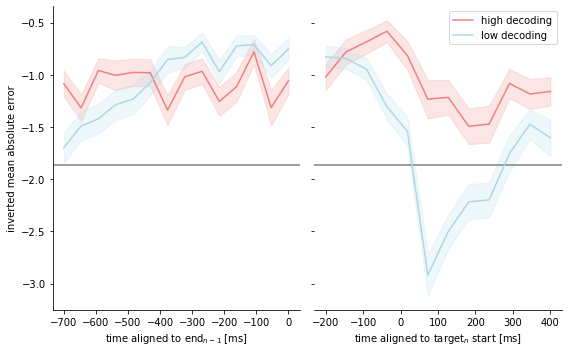

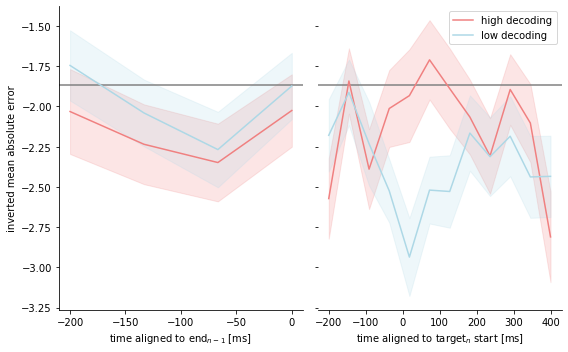

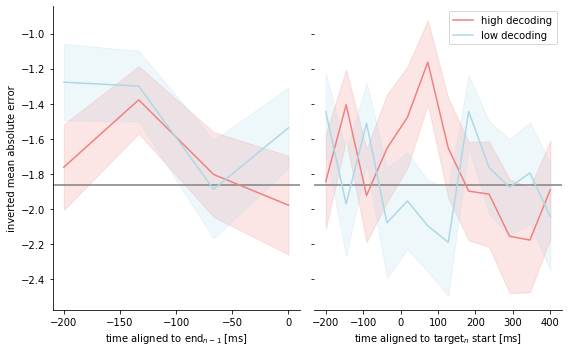

In [94]:
hep=0
#plt.figure()
for mono in ['Sa', 'Pe', 'Wa']:
    for sess in range(max(df_dat.loc[df_dat.monkey==mono].session)+1):
        # borders differ across sessions
        plot_reactivations(acc_rightContra[mono][sess], high_decoding_idx_single_rightContra[hep].astype(int),\
                           low_decoding_idx_single_rightContra[hep].astype(int), borders_all[mono][sess], hemisphere_baseline)
        hep+=1

Correlate decoder error for left vs right neurons (reactivations at same time points)

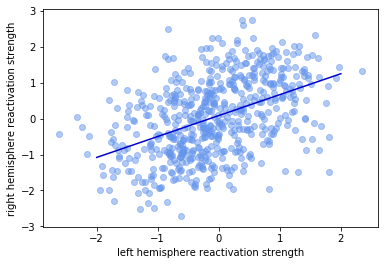

R² value = 0.20510946852156897


/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


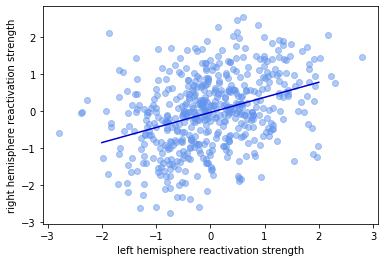

R² value = 0.1324841525769147


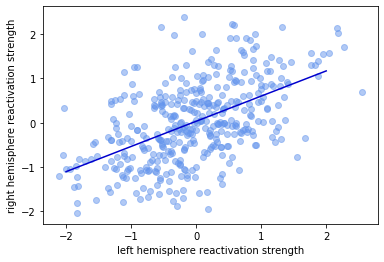

R² value = 0.2779791274886576


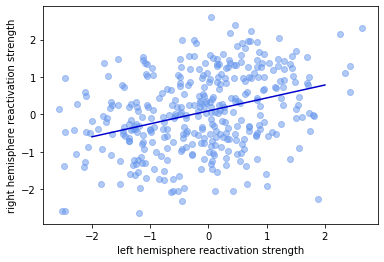

R² value = 0.11506676453358577


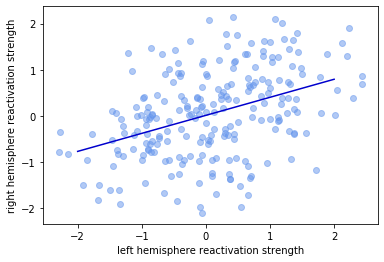

R² value = 0.16255274554970256


In [34]:
r2_LR=[]
r2_high=[]
r2_low=[]
hep=0
for mono in acc_leftIpsi.keys():
    for sess in range(len(acc_leftIpsi[mono])):
        r2_leftVSright=[]
        r2_h=[]
        r2_l=[]
        for timing in range(min_len-1):
            # determine r² score
    
            if timing==0:
                dat ={'x': np.append(acc_leftIpsi[mono][sess][:,-(timing+1):], acc_leftContra[mono][sess][:,-(timing+1):]),\
                      'y':np.append(acc_rightContra[mono][sess][:,-(timing+1):], acc_rightIpsi[mono][sess][:,-(timing+1):])}                
            else:
                dat ={'x': np.append(acc_leftIpsi[mono][sess][:,-(timing+1):-timing], acc_leftContra[mono][sess][:,-(timing+1):-timing]),\
                      'y':np.append(acc_rightContra[mono][sess][:,-(timing+1):-timing], acc_rightIpsi[mono][sess][:,-(timing+1):-timing])}
            mod=sf.ols('y~x',data=dat)
            res=mod.fit()
            r2_leftVSright.append(res.rsquared)
            
            # high decoding index
            left_h = high_decoding_idx_single_leftIpsi[hep][high_decoding_idx_single_leftIpsi[hep] == high_decoding_idx_single_rightContra[hep]]
            right_h = high_decoding_idx_single_leftContra[hep][high_decoding_idx_single_leftContra[hep] == high_decoding_idx_single_rightIpsi[hep]]
            if timing==0:
                dat ={'x': np.append(acc_leftIpsi[mono][sess][left_h,-(timing+1):],\
                                     acc_leftContra[mono][sess][right_h,-(timing+1):]),\
                      'y':np.append(acc_rightContra[mono][sess][left_h,-(timing+1):],\
                                    acc_rightIpsi[mono][sess][right_h,-(timing+1):])}                
            else:
                dat ={'x': np.append(acc_leftIpsi[mono][sess][left_h,-(timing+1):-timing],\
                                     acc_leftContra[mono][sess][right_h,-(timing+1):-timing]),\
                      'y':np.append(acc_leftIpsi[mono][sess][left_h,-(timing+1):-timing],\
                                    acc_rightIpsi[mono][sess][right_h,-(timing+1):-timing])}
            mod=sf.ols('y~x',data=dat)
            res=mod.fit()
            r2_h.append(res.rsquared)
            
            # low decoding index
            left_l = low_decoding_idx_single_leftIpsi[hep][low_decoding_idx_single_leftIpsi[hep] == low_decoding_idx_single_rightContra[hep]]
            right_l = low_decoding_idx_single_leftContra[hep][low_decoding_idx_single_leftContra[hep] == low_decoding_idx_single_rightIpsi[hep]]
            if timing==0:
                dat ={'x': np.append(acc_leftIpsi[mono][sess][left_l,-(timing+1):],\
                                     acc_leftContra[mono][sess][right_l,-(timing+1):]),\
                      'y':np.append(acc_rightContra[mono][sess][left_l,-(timing+1):],\
                                    acc_rightIpsi[mono][sess][right_l,-(timing+1):])}                
            else:
                dat ={'x': np.append(acc_leftIpsi[mono][sess][left_l,-(timing+1):-timing],\
                                     acc_leftContra[mono][sess][right_l,-(timing+1):-timing]),\
                      'y':np.append(acc_rightContra[mono][sess][left_l,-(timing+1):-timing],\
                                    acc_rightIpsi[mono][sess][right_l,-(timing+1):-timing])}
            mod=sf.ols('y~x',data=dat)
            res=mod.fit()
            r2_l.append(res.rsquared)

        r2_LR.append(r2_leftVSright)
        r2_high.append(r2_h)
        r2_low.append(r2_l)
        
        r2_LR = r2_LR[::-1]
        r2_high = r2_high[::-1]
        r2_low = r2_low[::-1]
        
        # determine linear fit
        params_left = LinearRegression().fit(np.append(np.mean(acc_leftIpsi[mono][sess][:,react_start:react_end], axis=1),\
                                                       np.mean(acc_leftContra[mono][sess][:,react_start:react_end], axis=1)).reshape(-1,1),\
                                             np.append(np.mean(acc_rightContra[mono][sess][:,react_start:react_end], axis=1),\
                                                      np.mean(acc_rightIpsi[mono][sess][:,react_start:react_end], axis=1)).reshape(-1,1))
        
        x_ang=np.linspace(-2,2,50)
        plt.figure()
        plt.scatter(np.append(np.mean(acc_leftIpsi[mono][sess][:,react_start:react_end], axis=1),\
                              np.mean(acc_leftContra[mono][sess][:,react_start:react_end], axis=1)),\
                    np.append(np.mean(acc_rightContra[mono][sess][:,react_start:react_end], axis=1),\
                              np.mean(acc_rightIpsi[mono][sess][:,react_start:react_end], axis=1)), color='cornflowerblue', alpha=0.5, label='left targets')
        plt.plot(x_ang, params_left.coef_[0]*x_ang+params_left.intercept_[0], color='mediumblue',)
        plt.xlabel('left hemisphere reactivation strength')
        plt.ylabel('right hemisphere reactivation strength')
        plt.show()
        
        
        dat={'x':np.append(np.mean(acc_leftIpsi[mono][sess][:,react_start:react_end], axis=1),np.mean(acc_leftContra[mono][sess][:,react_start:react_end], axis=1)),\
             'y':np.append(np.mean(acc_rightContra[mono][sess][:,react_start:react_end], axis=1),np.mean(acc_rightIpsi[mono][sess][:,react_start:react_end], axis=1))}
        mod_mean=sf.ols('y~x',data=dat)
        res_mean=mod_mean.fit()
        print('R² value = '+str(res_mean.rsquared))
        hep+=1

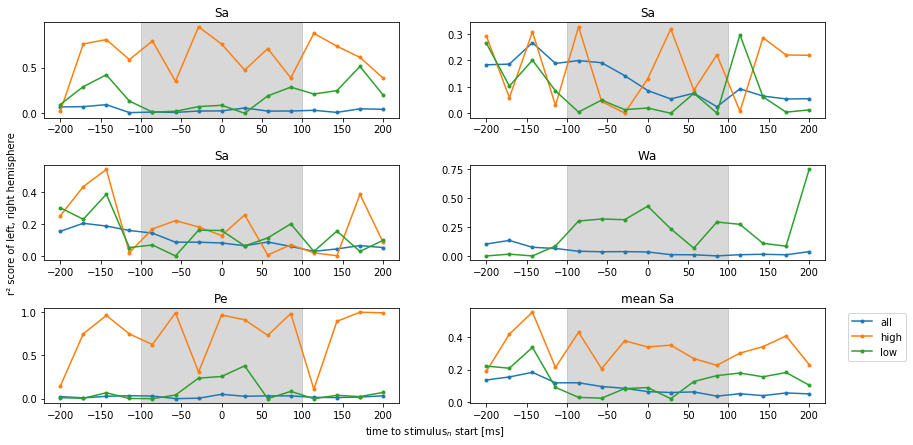

In [96]:
x = np.linspace(-min_trial_end*bins, min_fix*bins, len(r2_LR[0]))
fig = plt.figure(figsize=(14,7))
plt.subplots_adjust(hspace=0.5)
for i in range(len(r2_LR)):
    plt.subplot(3,2,i+1)
    plt.plot(x, r2_LR[i],'.-', label='all')
    plt.plot(x, r2_high[i],'.-', label='high')
    plt.plot(x, r2_low[i],'.-', label='low')
    plt.axvspan(-100,100, color='grey', alpha=0.3)
    #plt.xlabel('time to stimulus$_n$ start [ms]')
    #plt.ylabel('r² score of left, right hemisphere')
    if i<3:
        plt.title('Sa')
    elif i==4:
        plt.title('Pe')
    else:
        plt.title('Wa')
    #plt.legend()
    
plt.subplot(3,2,6)
plt.plot(x, np.mean(r2_LR[0:3], axis=0),'.-', label='all')
plt.plot(x, np.mean(r2_high[0:3], axis=0),'.-', label='high')
plt.plot(x, np.mean(r2_low[0:3], axis=0),'.-', label='low')
#plt.plot(x, np.mean(r2_right[0:3], axis=0),'.-', label='right targets')
plt.axvspan(-100,100, color='grey', alpha=0.3)
plt.title('mean Sa')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('time to stimulus$_n$ start [ms]')
plt.ylabel('r² score of left, right hemisphere')
#plt.savefig('../Figures/Neural/SerialBias/hemispheres/correlation/CorrelationLeftRightHemisphere_splitLeftRightTargets_allMonkeys.png', dpi=100)
plt.show()

### -> watch out: high, low are only very few trials

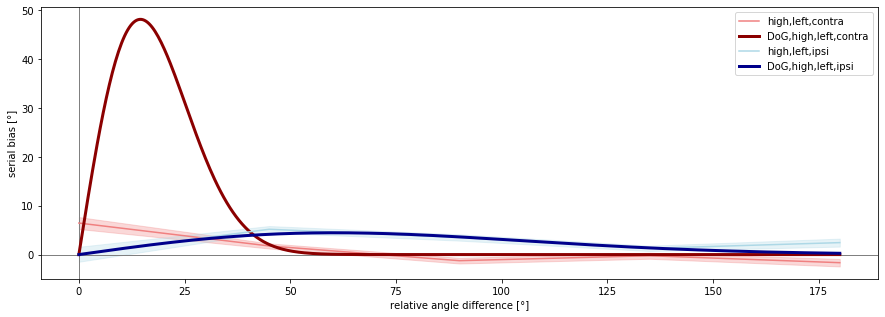

Ttest_indResult(statistic=-5.493178878600521, pvalue=5.403021350619294e-08)


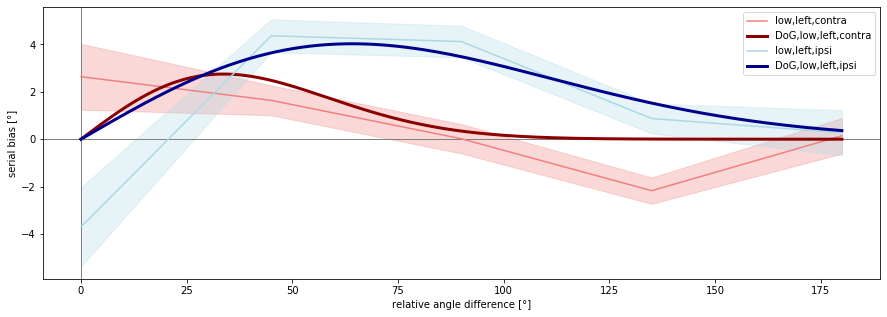

Ttest_indResult(statistic=-4.184636244542951, pvalue=3.192281060560402e-05)


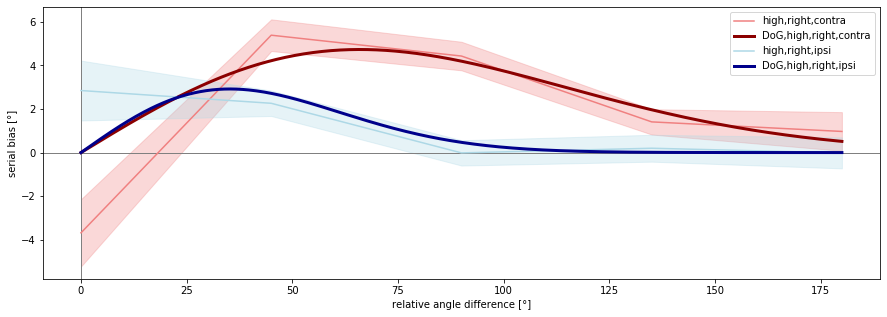

Ttest_indResult(statistic=3.5714482026644587, pvalue=0.00037757375461205543)


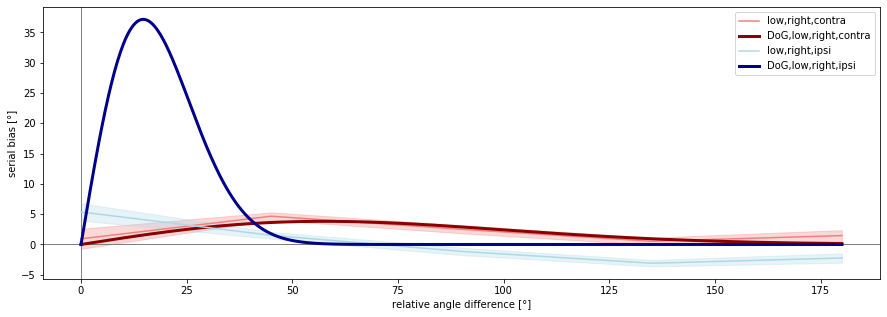

Ttest_indResult(statistic=6.1243185116692205, pvalue=1.4643438192337836e-09)


In [107]:
m_idx1 = 0
m_idx2 = 3
df_leftTar = df_serial_all.loc[targ_left].reset_index()
df_rightTar = df_serial_all.loc[targ_right].reset_index()

## high, left, ipsi contra
hli = np.concatenate(high_decoding_idx_full_leftIpsi[m_idx1:m_idx2]).astype(int)# 0:3 = Sa
hlc = np.concatenate(high_decoding_idx_full_leftContra[m_idx1:m_idx2]).astype(int)# 0:3 = Sa

ttest_single, ttest = serialbias_highVSlow(df_rightTar.loc[hlc], df_leftTar.loc[hli], 'high,left,contra', 'high,left,ipsi')

## low, left, ipsi contra
lli = np.concatenate(low_decoding_idx_full_leftIpsi[m_idx1:m_idx2]).astype(int)# 0:3 = Sa
llc = np.concatenate(low_decoding_idx_full_leftContra[m_idx1:m_idx2]).astype(int)# 0:3 = Sa

ttest_single, ttest = serialbias_highVSlow(df_rightTar.loc[llc], df_leftTar.loc[lli],  'low,left,contra', 'low,left,ipsi')

## high, right, ipsi contra
hri = np.concatenate(high_decoding_idx_full_rightIpsi[m_idx1:m_idx2]).astype(int)# 0:3 = Sa
hrc = np.concatenate(high_decoding_idx_full_rightContra[m_idx1:m_idx2]).astype(int)# 0:3 = Sa

ttest_single, ttest = serialbias_highVSlow(df_leftTar.loc[hrc], df_rightTar.loc[hri], 'high,right,contra', 'high,right,ipsi')

## low, right, ipsi contra
lri = np.concatenate(low_decoding_idx_full_rightIpsi[m_idx1:m_idx2]).astype(int)# 0:3 = Sa
lrc = np.concatenate(low_decoding_idx_full_rightContra[m_idx1:m_idx2]).astype(int)# 0:3 = Sa

ttest_single, ttest = serialbias_highVSlow(df_leftTar.loc[lrc], df_rightTar.loc[lri], 'low,right,contra', 'low,right,ipsi')





high contralateral vs high ipsilateral, across hemispheres

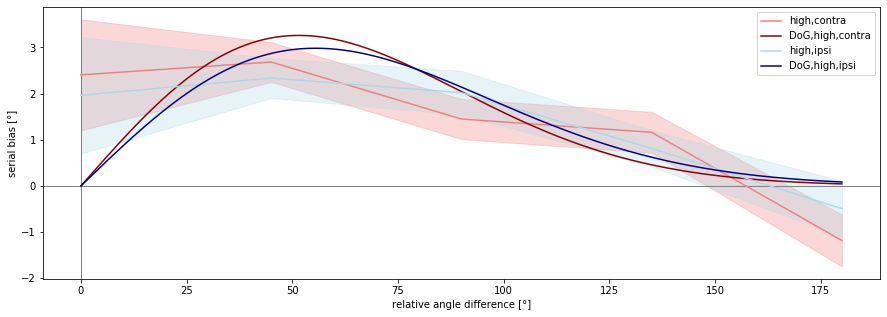

Ttest_indResult(statistic=-0.14110241111180277, pvalue=0.8878078847397676)


In [95]:
hi = np.append(hli,hri)
hc = np.append(hlc,hrc)
ttest_single, ttest = serialbias_highVSlow(df_leftTar.loc[hrc].append(df_rightTar.loc[hlc]), df_rightTar.loc[hri].append(df_leftTar.loc[hli]), 'high,contra', 'high,ipsi')


## Previous and current trial on same/opposite hemispheres

In [53]:
targ_ll = np.where(((df_serial_all['target_prev']>0) & (df_serial_all['target_prev']<np.pi)) & ((df_serial_all['target_curr']>0) & (df_serial_all['target_curr']<np.pi)))[0]
targ_rr = np.where(((df_serial_all['target_prev']>np.pi) & (df_serial_all['target_prev']<2*np.pi)) & ((df_serial_all['target_curr']>np.pi) & (df_serial_all['target_curr']<2*np.pi))[0]

In [54]:
df_right.loc[hlc].loc[(df_serial_all['target_curr']<np.pi/2) | (df_serial_all['target_curr']>np.pi+np.pi/2)]

index  trial_id  target_prev  response_prev  delay_prev  target_curr  \
5        9        11     0.392699       0.498078        1930     3.534292   
6       13        16     5.890486       5.706430        2030     1.963495   
12      24        29     0.392699       0.400830        1529     5.105088   
14      27        33     0.392699       0.504919        3030     2.748894   
17      34        42     0.392699       0.522710        1540     5.105088   
..     ...       ...          ...            ...         ...          ...   
892   1943      2997     5.497787       5.622911        2529     1.963495   
905   1979      3057     5.890486       5.900388        2228     2.748894   
907   1982      3060     5.497787       5.519549        2328     1.178097   
908   1983      3061     1.178097       1.177876        2228     0.000000   
909   1988      3069     0.000000       0.068309        2428     2.356194   

     response_curr  delay_curr monkey  session  
5         3.575747        2830     Sa        0  
6         2.024880        2630     Sa        0  
12        4.974092        2630     Sa        0  
14        2.890878        1740     Sa        0  
17        4.927748        2030     Sa        0  
..             ...         ...    ...      ...  
892       1.927637        2130     Pe        0  
905       2.737008        2128     Pe        0  
907       1.177876        2228     Pe        0  
908       0.093599        2538     Pe        0  
909       2.346191        2328     Pe        0  

[237 rows x 10 columns]

In [55]:
np.where(hli == targ_ll)

/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

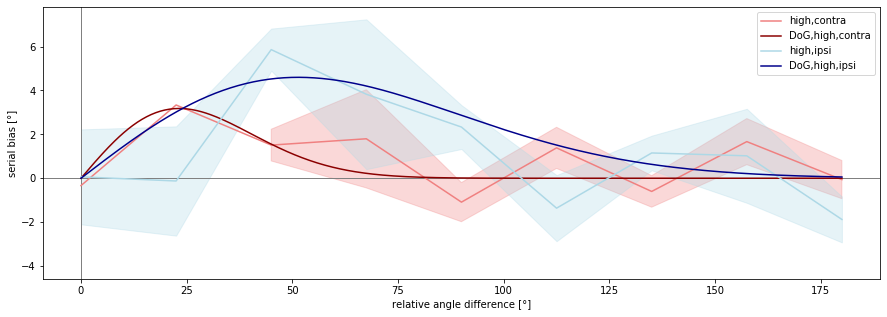

Ttest_indResult(statistic=-3.682931479722006, pvalue=0.00025839897484871034)


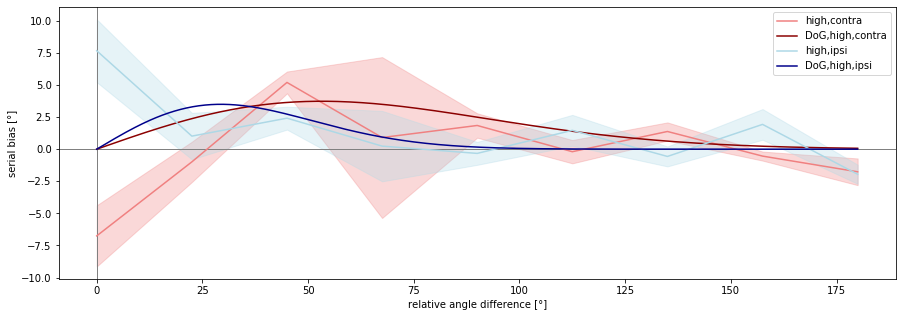

Ttest_indResult(statistic=2.278922378246038, pvalue=0.02312711105529766)


In [56]:
#df_ll = df_left.loc[np.where((df_serial_all['target_curr']>np.pi/2) & (df_serial_all['target_curr']<np.pi+np.pi/2))[0]]
#df_rr = df_serial_all.loc[targ_rr]

## high, left, ipsi contra
hli = np.concatenate(high_decoding_idx_full_leftIpsi[m_idx1:m_idx2]).astype(int)# 0:3 = Sa #
#bool_hli =[True if (hli==n).any() else False for n in range(len(targ_ll))]
hlc = np.concatenate(high_decoding_idx_full_leftContra[m_idx1:m_idx2]).astype(int)# 0:3 = Sa
#bool_hlc =[True if (hlc==n).any() else False for n in range(len(targ_ll))]
hri = np.concatenate(high_decoding_idx_full_rightIpsi[m_idx1:m_idx2]).astype(int)# 0:3 = Sa #
#bool_hli =[True if (hli==n).any() else False for n in range(len(targ_ll))]
hrc = np.concatenate(high_decoding_idx_full_rightContra[m_idx1:m_idx2]).astype(int)# 0:3 = Sa


ttest_single, ttest = serialbias_highVSlow(df_right.loc[hlc].loc[(df_serial_all['target_curr']<np.pi/2) | (df_serial_all['target_curr']>np.pi+np.pi/2)], df_left.loc[hli].loc[(df_serial_all['target_curr']>np.pi/2) & (df_serial_all['target_curr']<np.pi+np.pi/2)], 'high,contra', 'high,ipsi')

ttest_single, ttest = serialbias_highVSlow(df_left.loc[hrc].loc[(df_serial_all['target_curr']>np.pi/2) & (df_serial_all['target_curr']<np.pi+np.pi/2)], df_right.loc[hri].loc[(df_serial_all['target_curr']<np.pi/2) | (df_serial_all['target_curr']>np.pi+np.pi/2)], 'high,contra', 'high,ipsi')


In [85]:
df_ll = df_serial_all.loc[targ_ll]

len(df_left.loc[(df_left['monkey']=='Sa') & (df_left['session']==1)])

257

In [86]:
df_rr = df_serial_all.loc[targ_rr]
len(df_right.loc[(df_right['monkey']=='Sa') & (df_right['session']==1)])

267

# Multi-output regressor

In [26]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [44]:
acc_bias_prev_delay_left,std_bias_prev_delay_left,acc_bias_curr_delay_left,std_bias_curr_delay_left,\
acc_bias_prev_response_left,std_bias_prev_response_left,acc_bias_curr_response_left,std_bias_curr_response_left,\
acc_bias_prev_delay_right,std_bias_prev_delay_right,acc_bias_curr_delay_right,std_bias_curr_delay_right,\
acc_bias_prev_response_right,std_bias_prev_response_right,acc_bias_curr_response_right,\
std_bias_curr_response_right = multioutput_IpsiContra(df_serial_left, borders_full, 'left')

In [45]:
# subtract baseline
acc_bias_prev_delay_left = acc_bias_prev_delay_left-baseline['acc_prev'] 
acc_bias_prev_response_left = acc_bias_prev_response_left-baseline['acc_prev_r']
acc_bias_prev_delay_right = acc_bias_prev_delay_right-baseline['acc_prev_c'] 
acc_bias_prev_response_right = acc_bias_prev_response_right-baseline['acc_prev_cr']
acc_bias_curr_delay_left = acc_bias_curr_delay_left-baseline['acc_curr'] 
acc_bias_curr_response_left = acc_bias_curr_response_left-baseline['acc_curr_r']
acc_bias_curr_delay_right = acc_bias_curr_delay_right-baseline['acc_curr_c'] 
acc_bias_curr_response_right = acc_bias_curr_response_right-baseline['acc_curr_cr']

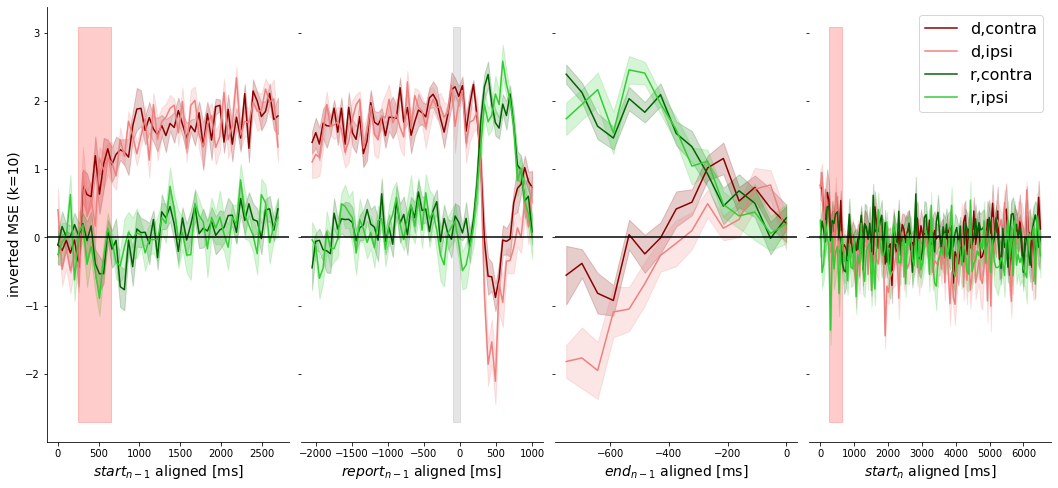

In [46]:
mode='MSE'
plot_hemispheres_delayVSresponse(acc_bias_prev_delay_left,std_bias_prev_delay_left,acc_bias_curr_delay_left,std_bias_curr_delay_left,'d,ipsi',\
acc_bias_prev_response_left,std_bias_prev_response_left,acc_bias_curr_response_left,std_bias_curr_response_left,'r,ipsi',\
acc_bias_prev_delay_right,std_bias_prev_delay_right,acc_bias_curr_delay_right,std_bias_curr_delay_right,'d,contra',\
acc_bias_prev_response_right,std_bias_prev_response_right,acc_bias_curr_response_right, std_bias_curr_response_right,'r,contra',\
                                 borders, borders_pastdelay, mode, baseline)

# Complex Optimization

## Matrix optimization

In [154]:
df_serial_left['target_prev_xy'][i][0]

0               [-204.0, 2.4982794702606005e-14]
1      [144.24978336205567, -144.24978336205572]
2                                       [204, 0]
3                                       [204, 0]
4      [144.24978336205567, -144.24978336205572]
                         ...                    
322       [144.2497833620557, 144.2497833620557]
323            [-3.7474192053909006e-14, -204.0]
324      [-144.2497833620557, 144.2497833620557]
325                                     [204, 0]
326      [-144.2497833620557, 144.2497833620557]
Name: target_prev_xy, Length: 327, dtype: object

In [70]:
X_delay = pd.DataFrame([np.mean(df_serial_left['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(df_serial_left['bin_sp_prev']))])
X_response = pd.DataFrame([np.mean(df_serial_left['bin_sp_prev'][n][borders_full[7]:borders_full[8]], axis=0) for n in range(len(df_serial_left['bin_sp_prev']))])
# scale neural responses for each neuron into [0,1]
scaler = preprocessing.MinMaxScaler()
names = X_delay.columns
d = scaler.fit_transform(X_delay)
scaledX = pd.DataFrame(d, columns=names)
scaledX.head()

#y = np.array([exp(complex(df_serial_left['target_prev_xy'][i][0],df_serial_left['target_prev_xy'][i][0])) for i in df_serial_left.index])

y = np.array([complex(df_serial_left['target_prev_xy'][i][0],df_serial_left['target_prev_xy'][i][1]) for i in df_serial_left.index])

    
weights = inv(scaledX.T.dot(scaledX)).dot(scaledX.T).dot(y)

np.mean((circdist(np.angle(weights.dot(scaledX.T)),np.angle(y)))**2)

0.072345302374395

In [71]:
complex(df_serial_left['target_prev'].values[i]-np.pi)

(0.7853981633974483+0j)

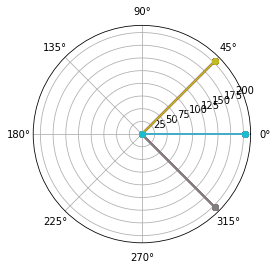

In [80]:
import cmath
cmath.polar(1+1j)
#xy = np.array([complex(df_serial_left['target_prev_xy'][i][0],df_serial_left['target_prev_xy'][i][1])/abs(complex(df_serial_left['target_prev_xy'][i][0],df_serial_left['target_prev_xy'][i][1])) for i in df_serial_left.index])
bool_targleft = ((np.angle(y)>np.pi/2) | (np.angle(y)<-np.pi/2-0.1))
bool_targright = ((np.angle(y)>-np.pi/2) & (np.angle(y)<np.pi/2))
y[bool_targleft]
for x in y[bool_targright]:
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')

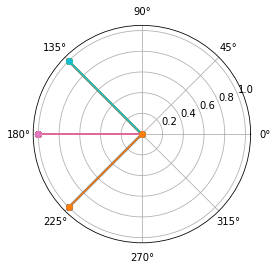

In [81]:
y2 = np.array([np.cos(df_serial['target_prev'].values[i]-np.pi)+sin(df_serial['target_prev'].values[i]-np.pi)*1j for i in df_serial_left.index])
bool_targleft2 = ((np.angle(y2)>np.pi/2) | (np.angle(y2)<-np.pi/2-0.1))
bool_targright2 = ((np.angle(y2)>-np.pi/2) & (np.angle(y2)<np.pi/2))
for x in y2[bool_targleft2]:
    plt.polar([0,angle(x)],[0,abs(x)],marker='o')

In [149]:
from scipy.optimize import fmin
def objective_fct(array_xy, X, y):
    """Cost function: sum((beta+gamma*i)*X-y)->0"""
    beta = array_xy[0]
    gamma= array_xy[1]
    
    print(beta)
    return sum([angle(complex(beta[i], gamma[i])*X.loc[i,:]) - y[i] for i in X.index])

X = pd.DataFrame([np.mean(df_serial_left['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(df_serial_left['bin_sp_prev']))])
# scale neural responses
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
scaledX = pd.DataFrame(d, columns=names)
scaledX.head()

y = df_serial_left['target_prev'].values-np.pi

alphabeta_start = np.zeros((X.shape[1],2))

res = fmin(objective_fct, alphabeta_start,args=(scaledX,y),maxfun=4000,maxiter=4000,ftol=1e-2,xtol=1e-4)

0.0
0     0.097561
1     0.560976
2     0.780488
3     0.121951
4     0.634146
        ...   
77    1.121951
78    2.024390
79    3.463415
80    1.487805
81    0.512195
Name: 0, Length: 82, dtype: float64


IndexError: invalid index to scalar variable.

In [195]:
np.median(alpha_start*X.loc[0,:].values)

2.5645987022452266

In [199]:
from scipy.optimize import fmin
def objective_fct(alpha, X, y):
    """Cost function: sum((beta+gamma*i)*X-y)->0"""
    
    print(sum(abs(np.array([circdist(angle(sum(exp(alpha*1j)*X.loc[i,:].values)),y[i]) for i in X.index]))))
    #print([angle(exp(alpha*1j)*X.loc[i,:].values) for i in X.index])
    return sum(abs(np.array([circdist(angle(sum(exp(alpha*1j)*X.loc[i,:].values)),y[i]) for i in X.index])))

X = pd.DataFrame([np.mean(df_serial_left['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(df_serial_left['bin_sp_prev']))])
# scale neural responses for each neuron into [0,1]
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
scaledX = pd.DataFrame(d, columns=names)
scaledX.head()

y = df_serial_left['target_prev'].values-np.pi

alpha_start = np.random.uniform(low = 0, high = 2*pi, size=(X.shape[1],))
#np.ones((X.shape[1]))

res = fmin(objective_fct, alpha_start, args=(scaledX,y), maxfun=1000, maxiter=1000, ftol=1e-2, xtol=1e-4)

442.0473545649428
441.62563478886665
442.0263127701366
442.0827735911779
442.0282093652468
441.9112528477955
441.64147844751113
440.16215509495294
441.6800336244809
441.84973940990864
441.6481485328304
446.3144793633685
447.9792239570219
439.8762848508493
441.0284861550461
441.2771872884999
445.43904554957567
441.45211678185126
441.63288335545496
441.70783000536596
442.0214916460362
441.1488128515766
445.33728109202036
443.74056325515687
446.4470060489488
441.0264638295983
445.4024534345124
446.1685100266267
444.84943328649064
442.077279283068
442.0815485193169
441.6588407412177
440.537325927945
440.61229072264155
440.21005457383256
439.4254299622578
441.98616783615455
447.15387097396587
444.6617395604191
444.6999856969622
442.37931933965785
444.6052707832413
443.9496551026758
448.0090799588152
441.92451829180646
444.192809633635
440.8697212843628
442.023730644123
441.3124060760387
441.58391936644693
441.5293507477363
443.20105701960074
444.0210291284711
440.47121433028497
441.94468779

402.63835944093876
400.7163402421422
401.5281363537214
402.3519283029377
403.80871058159505
406.45384219816174
402.3004761816037
402.0006314921693
401.5177279626072
401.7366252177636
401.45182610360916
404.2353214979151
400.8290461931848
403.61436479050656
401.30243277085435
401.6102254257024
402.5395483230728
402.76022237431056
402.66104101661665
402.9891000330672
400.5618099373436
400.3631979717826
400.7916183149541
401.87338998479845
401.32085643819937
401.6551704762353
400.36255612872105
401.11188974963994
401.13614669099184
402.1153686039345
399.2665442714163
396.8771227877597
399.42092355117865
399.408055565843
400.3230798180396
400.30924173473346
400.7817852901891
399.4936226597505
399.5362212240638
399.95566674109557
399.8857510571947
399.47899840412373
398.84293633661395
399.2807152437034
401.1523419131605
397.6864191691665
398.8051970874353
397.1959055324153
398.46405844589776
398.2405569236387
401.1006659869707
397.70591588685454
401.7013861369039
397.8041354073486
399.72265

376.6649072673679
377.0251357917469
383.37210286908544
379.3140350477229
381.13644286542865
378.99817562650446
376.4039873318816
376.45793292749966
376.7556114631594
376.9262120148356
378.59598576978385
378.93474617755476
376.4837895624486
380.216106990608
376.1685206860634
382.15687813193426
377.4708020830363
376.0050778185358
375.6804319924047
379.74403203848436
377.3623647178518
375.8515953860432
375.0702547528723
379.20609008156913
374.93061499069336
380.39765932127546
381.5259488956519
380.13613082429583
380.371566745867
376.6578543995982
377.13237096605326
380.8314618255825
380.70130722179715
376.4313363098985
375.8292512727952
378.23344111164494
380.23993198494475
378.4538925710577
381.0098225278173
376.0260477264689
376.5838036209939
374.8728576858507
375.1800307524382
375.46319214690766
377.85298848321264
378.32362631338265
374.89464337344896
378.1204246544189
375.9758710532532
380.15496801904067
380.1713816122814
378.144942958699
374.2487462524675
371.5396026881777
380.432796

In [163]:
X.columns

RangeIndex(start=0, stop=82, step=1)

In [165]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame([np.mean(df_serial_left['bin_sp_prev'][n][borders_full[3]:borders_full[4]], axis=0) for n in range(len(df_serial_left['bin_sp_prev']))])
names = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
scaledX.head()

0         1         2         3         4         5         6   \
0  0.285714  0.478261  0.272727  0.416667  0.454545  0.304348  0.042735   
1  0.428571  1.000000  0.575758  0.666667  0.068182  0.260870  0.102564   
2  0.285714  0.804348  0.393939  0.333333  0.250000  0.043478  0.076923   
3  0.285714  0.673913  0.287879  0.333333  0.545455  0.130435  0.059829   
4  0.214286  0.934783  0.378788  0.500000  0.181818  0.086957  0.017094   

         7         8         9   ...        72        73        74        75  \
0  0.050000  0.584906  0.121212  ...  0.531646  0.693182  0.839286  0.483516   
1  0.233333  0.858491  0.292929  ...  0.569620  0.500000  1.000000  0.527473   
2  0.233333  0.254717  0.020202  ...  0.455696  0.477273  0.464286  0.439560   
3  0.233333  0.424528  0.050505  ...  0.594937  0.420455  0.714286  0.516484   
4  0.150000  0.773585  0.060606  ...  0.417722  0.397727  0.589286  0.395604   

         76        77        78        79        80        81  
0  0.293103  0.812500  0.555556  0.855932  0.447761  0.414634  
1  0.293103  0.687500  0.464646  0.550847  0.343284  0.365854  
2  0.310345  0.145833  0.424242  0.440678  0.820896  0.268293  
3  0.431034  0.020833  0.595960  0.525424  0.686567  0.536585  
4  0.603448  0.270833  0.656566  0.322034  0.447761  0.609756  

[5 rows x 82 columns]